In [81]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["font.size"] = 16

In [82]:
def save_csv_to_compare_method(
    df_all: pl.DataFrame,
    run_id_baseline: str,
    run_id_compare: str,
    save_path: Path,
    sort_by: list[str],
    display_cols: list[str],
) -> None:
    save_path.parent.mkdir(parents=True, exist_ok=True)
    (
        df_all.filter(
            (pl.col("run_id").is_in([run_id_baseline, run_id_compare]))
            & (pl.col("kind") == "pred_mel_speech_ssl")
        )
        .select(
            [
                "run_id",
                "method_id_and_loss_weight",
                "speaker",
                "filename",
                "wer_kanjikana",
                "utt_gt_kanjikana",
                "utt_recog_kanjikana",
                "cer_kana",
                "utt_gt_kana",
                "utt_recog_kana",
                "per_phoneme",
                "utt_gt_phoneme",
                "utt_recog_phoneme",
                "spk_sim",
            ]
        )
        .join(
            df_all.filter(
                (pl.col("run_id") == run_id_baseline)
                & (pl.col("kind") == "pred_mel_speech_ssl")
            )
            .select(
                [
                    "speaker",
                    "filename",
                    "wer_kanjikana",
                    "utt_gt_kanjikana",
                    "utt_recog_kanjikana",
                    "cer_kana",
                    "utt_gt_kana",
                    "utt_recog_kana",
                    "per_phoneme",
                    "utt_gt_phoneme",
                    "utt_recog_phoneme",
                    "spk_sim",
                ]
            )
            .rename(
                {
                    "wer_kanjikana": "wer_kanjikana_baseline",
                    "utt_gt_kanjikana": "utt_gt_kanjikana_baseline",
                    "utt_recog_kanjikana": "utt_recog_kanjikana_baseline",
                    "cer_kana": "cer_kana_baseline",
                    "utt_gt_kana": "utt_gt_kana_baseline",
                    "utt_recog_kana": "utt_recog_kana_baseline",
                    "per_phoneme": "per_phoneme_baseline",
                    "utt_gt_phoneme": "utt_gt_phoneme_baseline",
                    "utt_recog_phoneme": "utt_recog_phoneme_baseline",
                    "spk_sim": "spk_sim_baseline",
                }
            ),
            on=["speaker", "filename"],
            how="left",
        )
        .with_columns(
            (pl.col("wer_kanjikana") - pl.col("wer_kanjikana_baseline")).alias(
                "wer_kanjikana_diff"
            ),
            (pl.col("cer_kana") - pl.col("cer_kana_baseline")).alias("cer_kana_diff"),
            (pl.col("per_phoneme") - pl.col("per_phoneme_baseline")).alias(
                "per_phoneme_diff"
            ),
            (pl.col("spk_sim") - pl.col("spk_sim_baseline")).alias("spk_sim_diff"),
        )
        .select(display_cols)
        .sort(["speaker", "filename", "method_id_and_loss_weight"])
    ).filter(pl.col("run_id") == run_id_compare).sort(sort_by).write_csv(str(save_path))

In [ ]:
run_id_lst = [
    ["dca2gb3d", "5", "1.0", "20241031_233821"],
    ["cdyv6fps", "4", "1.0", "20241031_230230"],
    ["wlxrw27k", "3", "1.0", "20241031_222413"],
    ["5xn74zem", "2", "1.0", "20241031_214046"],
    ["zhoeivjb", "1", "1.0", "20241031_204425"],
    ["sosf0acz", "0", "1.0", "20241031_195052"],
    ["2f694nev", "5", "0.1", "20241028_223025"],
    ["h71pe66b", "4", "0.1", "20241028_214954"],
    ["4h4id4tz", "3", "0.1", "20241028_210910"],
    ["wy0h8bpu", "2", "0.1", "20241028_200713"],
    ["o6hptbk5", "1", "0.1", "20241028_184008"],
    ["285wqmad", "0", "0.1", "20241028_172128"],
    ["1o40lyod", "5", "0.01", "20241028_161118"],
    ["tg4r230f", "4", "0.01", "20241028_154643"],
    # ["2zoxvtrk", "4", "0.01", "20241028_150238"],  # f
    ["uw487j74", "3", "0.01", "20241028_141442"],
    ["2njl6ce3", "2", "0.01", "20241028_131108"],
    ["yz0nwsvz", "1", "0.01", "20241028_113232"],
    # ["pstdmqnu", "1", "0.01", "20241028_111049"],  # f
    ["ukfz2470", "0", "0.01", "20241028_091345"],
    ["lic1d8lj", "5", "0.001", "20241028_080415"],
    ["pvun1i3f", "4", "0.001", "20241028_070744"],
    ["ceq1xo4e", "3", "0.001", "20241028_061843"],
    ["3jyrz1so", "2", "0.001", "20241028_052606"],
    ["e1xl19lr", "1", "0.001", "20241028_032925"],
    ["kv601pjm", "0", "0.001", "20241028_013251"],
    ["drpgzb7p", "5", "0.0001", "20241028_003600"],
    ["2wwcs7kw", "4", "0.0001", "20241027_233750"],
    ["7091hf62", "3", "0.0001", "20241027_222745"],
    ["ehyszq9v", "2", "0.0001", "20241027_210956"],
    ["48nmuxoh", "1", "0.0001", "20241027_191342"],
    ["q7pgvrou", "0", "0.0001", "20241027_171757"],
]
run_id_to_method_id = {}
run_id_to_loss_weight = {}
for run_id, method_id, loss_weight, date in run_id_lst:
    run_id_to_method_id[run_id] = method_id
    run_id_to_loss_weight[run_id] = loss_weight

In [105]:
json_dir = Path("./wandb_data")
json_path_lst = list(json_dir.glob("**/test_data_*.json"))
df_lst = []
for json_path in json_path_lst:
    run_id = json_path.parents[2].name
    with open(str(json_path), "r", encoding="utf-8") as f:
        data = json.load(f)
    df = pl.DataFrame(data["data"], schema=data["columns"], orient="row")
    df = df.with_columns(pl.lit(run_id).alias("run_id"))
    df_lst.append(df)

In [85]:
json_dir = Path("./wandb_data")
json_path_lst = list(json_dir.glob("**/test_data_*.json"))
df_lst = []
for json_path in json_path_lst:
    run_id = json_path.parents[2].name
    with open(str(json_path), "r", encoding="utf-8") as f:
        data = json.load(f)
    df = pl.DataFrame(data["data"], schema=data["columns"], orient="row")
    df = df.with_columns(pl.lit(run_id).alias("run_id"))
    df_lst.append(df)

df_all = (
    pl.concat(df_lst, how="vertical")
    .with_columns(
        pl.col("wer_kanjikana") * 100,
        pl.col("cer_kana") * 100,
        pl.col("per_phoneme") * 100,
        pl.col("run_id").replace(run_id_to_method_id).alias("method_id"),
        pl.col("run_id").replace(run_id_to_loss_weight).alias("loss_weight"),
    )
    .with_columns(
        (pl.col("method_id") + "_" + pl.col("loss_weight")).alias(
            "method_id_and_loss_weight"
        )
    )
)
df_result = (
    df_all.group_by(["run_id", "kind"])
    .agg(
        pl.col("spk_sim").mean(),
        (
            (
                pl.col("delt_kanjikana").sum()
                + pl.col("inst_kanjikana").sum()
                + pl.col("subst_kanjikana").sum()
            )
            / pl.col("utt_gt_kanjikana").str.split(" ").list.len().sum()
            * 100
        ).alias("wer_kanjikana"),
        (
            (
                pl.col("delt_kana").sum()
                + pl.col("inst_kana").sum()
                + pl.col("subst_kana").sum()
            )
            / pl.col("utt_gt_kana").str.split(" ").list.len().sum()
            * 100
        ).alias("cer_kana"),
        (
            (
                pl.col("delt_phoneme").sum()
                + pl.col("inst_phoneme").sum()
                + pl.col("subst_phoneme").sum()
            )
            / pl.col("utt_gt_phoneme").str.split(" ").list.len().sum()
            * 100
        ).alias("per_phoneme"),
    )
    .with_columns(
        pl.col("run_id").replace(run_id_to_method_id).alias("method_id"),
        pl.col("run_id").replace(run_id_to_loss_weight).alias("loss_weight"),
    )
    .with_columns(
        (pl.col("method_id") + "_" + pl.col("loss_weight")).alias(
            "method_id_and_loss_weight"
        )
    )
)

df_result_spk = (
    df_all.group_by(["run_id", "speaker", "kind"])
    .agg(
        pl.col("spk_sim").mean(),
        (
            (
                pl.col("delt_kanjikana").sum()
                + pl.col("inst_kanjikana").sum()
                + pl.col("subst_kanjikana").sum()
            )
            / pl.col("utt_gt_kanjikana").str.split(" ").list.len().sum()
            * 100
        ).alias("wer_kanjikana"),
        (
            (
                pl.col("delt_kana").sum()
                + pl.col("inst_kana").sum()
                + pl.col("subst_kana").sum()
            )
            / pl.col("utt_gt_kana").str.split(" ").list.len().sum()
            * 100
        ).alias("cer_kana"),
        (
            (
                pl.col("delt_phoneme").sum()
                + pl.col("inst_phoneme").sum()
                + pl.col("subst_phoneme").sum()
            )
            / pl.col("utt_gt_phoneme").str.split(" ").list.len().sum()
            * 100
        ).alias("per_phoneme"),
    )
    .with_columns(
        pl.col("run_id").replace(run_id_to_method_id).alias("method_id"),
        pl.col("run_id").replace(run_id_to_loss_weight).alias("loss_weight"),
    )
    .with_columns(
        (pl.col("method_id") + "_" + pl.col("loss_weight")).alias(
            "method_id_and_loss_weight"
        )
    )
)

In [104]:
df_result.filter(pl.col("kind") == "pred_mel_speech_ssl").sort(
    ["method_id", "loss_weight"]
).select(
    ["method_id", "loss_weight", "wer_kanjikana", "cer_kana", "per_phoneme", "spk_sim"]
).write_csv("./results/objective_metrics.csv")

FileNotFoundError: No such file or directory (os error 2)

In [86]:
df_result.filter(
    (pl.col("method_id") == "0")
    & (pl.col("loss_weight") == "0.0001")
    & (pl.col("kind") != "pred_mel_speech_ssl")
).sort(["kind"])

shape: (2, 9)
┌──────────┬────────────┬──────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ run_id   ┆ kind       ┆ spk_sim  ┆ wer_kanji ┆ … ┆ per_phone ┆ method_id ┆ loss_weig ┆ method_id │
│ ---      ┆ ---        ┆ ---      ┆ kana      ┆   ┆ me        ┆ ---       ┆ ht        ┆ _and_loss │
│ str      ┆ str        ┆ f64      ┆ ---       ┆   ┆ ---       ┆ str       ┆ ---       ┆ _weight   │
│          ┆            ┆          ┆ f64       ┆   ┆ f64       ┆           ┆ str       ┆ ---       │
│          ┆            ┆          ┆           ┆   ┆           ┆           ┆           ┆ str       │
╞══════════╪════════════╪══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ q7pgvrou ┆ abs_mel_sp ┆ 0.955633 ┆ 3.716216  ┆ … ┆ 0.316901  ┆ 0         ┆ 0.0001    ┆ 0_0.0001  │
│          ┆ eech_ssl   ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ q7pgvrou ┆ gt         ┆ 1.0      ┆ 3.716216  ┆ … ┆ 0.269953  ┆ 0         ┆ 0.0001    ┆ 0_0.0001  │
└──────────┴────────────┴──────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [87]:
df_result.filter(
    (pl.col("method_id") == "0") & (pl.col("kind") == "pred_mel_speech_ssl")
).sort(["loss_weight"])

shape: (5, 9)
┌──────────┬────────────┬──────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ run_id   ┆ kind       ┆ spk_sim  ┆ wer_kanji ┆ … ┆ per_phone ┆ method_id ┆ loss_weig ┆ method_id │
│ ---      ┆ ---        ┆ ---      ┆ kana      ┆   ┆ me        ┆ ---       ┆ ht        ┆ _and_loss │
│ str      ┆ str        ┆ f64      ┆ ---       ┆   ┆ ---       ┆ str       ┆ ---       ┆ _weight   │
│          ┆            ┆          ┆ f64       ┆   ┆ f64       ┆           ┆ str       ┆ ---       │
│          ┆            ┆          ┆           ┆   ┆           ┆           ┆           ┆ str       │
╞══════════╪════════════╪══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ q7pgvrou ┆ pred_mel_s ┆ 0.833247 ┆ 57.263514 ┆ … ┆ 29.471831 ┆ 0         ┆ 0.0001    ┆ 0_0.0001  │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ kv601pjm ┆ pred_mel_s ┆ 0.836486 ┆ 54.560811 ┆ … ┆ 24.929577 ┆ 0         ┆ 0.001     ┆ 0_0.001   │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ ukfz2470 ┆ pred_mel_s ┆ 0.836548 ┆ 56.165541 ┆ … ┆ 25.551643 ┆ 0         ┆ 0.01      ┆ 0_0.01    │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ 285wqmad ┆ pred_mel_s ┆ 0.784489 ┆ 58.150338 ┆ … ┆ 26.830986 ┆ 0         ┆ 0.1       ┆ 0_0.1     │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ sosf0acz ┆ pred_mel_s ┆ 0.685157 ┆ 58.952703 ┆ … ┆ 30.575117 ┆ 0         ┆ 1.0       ┆ 0_1.0     │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
└──────────┴────────────┴──────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [88]:
df_result.filter(
    (pl.col("method_id") == "1") & (pl.col("kind") == "pred_mel_speech_ssl")
).sort(["loss_weight"])

shape: (5, 9)
┌──────────┬────────────┬──────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ run_id   ┆ kind       ┆ spk_sim  ┆ wer_kanji ┆ … ┆ per_phone ┆ method_id ┆ loss_weig ┆ method_id │
│ ---      ┆ ---        ┆ ---      ┆ kana      ┆   ┆ me        ┆ ---       ┆ ht        ┆ _and_loss │
│ str      ┆ str        ┆ f64      ┆ ---       ┆   ┆ ---       ┆ str       ┆ ---       ┆ _weight   │
│          ┆            ┆          ┆ f64       ┆   ┆ f64       ┆           ┆ str       ┆ ---       │
│          ┆            ┆          ┆           ┆   ┆           ┆           ┆           ┆ str       │
╞══════════╪════════════╪══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 48nmuxoh ┆ pred_mel_s ┆ 0.841433 ┆ 55.363176 ┆ … ┆ 25.504695 ┆ 1         ┆ 0.0001    ┆ 1_0.0001  │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ e1xl19lr ┆ pred_mel_s ┆ 0.842247 ┆ 55.109797 ┆ … ┆ 26.00939  ┆ 1         ┆ 0.001     ┆ 1_0.001   │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ yz0nwsvz ┆ pred_mel_s ┆ 0.84323  ┆ 53.420608 ┆ … ┆ 25.199531 ┆ 1         ┆ 0.01      ┆ 1_0.01    │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ o6hptbk5 ┆ pred_mel_s ┆ 0.809295 ┆ 54.560811 ┆ … ┆ 25.680751 ┆ 1         ┆ 0.1       ┆ 1_0.1     │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ zhoeivjb ┆ pred_mel_s ┆ 0.698125 ┆ 58.741554 ┆ … ┆ 29.07277  ┆ 1         ┆ 1.0       ┆ 1_1.0     │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
└──────────┴────────────┴──────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [89]:
df_result.filter(
    (pl.col("method_id") == "2") & (pl.col("kind") == "pred_mel_speech_ssl")
).sort(["loss_weight"])

shape: (5, 9)
┌──────────┬────────────┬──────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ run_id   ┆ kind       ┆ spk_sim  ┆ wer_kanji ┆ … ┆ per_phone ┆ method_id ┆ loss_weig ┆ method_id │
│ ---      ┆ ---        ┆ ---      ┆ kana      ┆   ┆ me        ┆ ---       ┆ ht        ┆ _and_loss │
│ str      ┆ str        ┆ f64      ┆ ---       ┆   ┆ ---       ┆ str       ┆ ---       ┆ _weight   │
│          ┆            ┆          ┆ f64       ┆   ┆ f64       ┆           ┆ str       ┆ ---       │
│          ┆            ┆          ┆           ┆   ┆           ┆           ┆           ┆ str       │
╞══════════╪════════════╪══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ ehyszq9v ┆ pred_mel_s ┆ 0.851503 ┆ 60.557432 ┆ … ┆ 27.805164 ┆ 2         ┆ 0.0001    ┆ 2_0.0001  │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ 3jyrz1so ┆ pred_mel_s ┆ 0.828515 ┆ 56.714527 ┆ … ┆ 26.830986 ┆ 2         ┆ 0.001     ┆ 2_0.001   │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ 2njl6ce3 ┆ pred_mel_s ┆ 0.847238 ┆ 54.434122 ┆ … ┆ 25.305164 ┆ 2         ┆ 0.01      ┆ 2_0.01    │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ wy0h8bpu ┆ pred_mel_s ┆ 0.840129 ┆ 45.27027  ┆ … ┆ 21.115023 ┆ 2         ┆ 0.1       ┆ 2_0.1     │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ 5xn74zem ┆ pred_mel_s ┆ 0.712396 ┆ 45.481419 ┆ … ┆ 23.462441 ┆ 2         ┆ 1.0       ┆ 2_1.0     │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
└──────────┴────────────┴──────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [90]:
df_result.filter(
    (pl.col("method_id") == "3") & (pl.col("kind") == "pred_mel_speech_ssl")
).sort(["loss_weight"])

shape: (5, 9)
┌──────────┬────────────┬──────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ run_id   ┆ kind       ┆ spk_sim  ┆ wer_kanji ┆ … ┆ per_phone ┆ method_id ┆ loss_weig ┆ method_id │
│ ---      ┆ ---        ┆ ---      ┆ kana      ┆   ┆ me        ┆ ---       ┆ ht        ┆ _and_loss │
│ str      ┆ str        ┆ f64      ┆ ---       ┆   ┆ ---       ┆ str       ┆ ---       ┆ _weight   │
│          ┆            ┆          ┆ f64       ┆   ┆ f64       ┆           ┆ str       ┆ ---       │
│          ┆            ┆          ┆           ┆   ┆           ┆           ┆           ┆ str       │
╞══════════╪════════════╪══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 7091hf62 ┆ pred_mel_s ┆ 0.860077 ┆ 58.488176 ┆ … ┆ 26.619718 ┆ 3         ┆ 0.0001    ┆ 3_0.0001  │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ ceq1xo4e ┆ pred_mel_s ┆ 0.850003 ┆ 54.983108 ┆ … ┆ 25.809859 ┆ 3         ┆ 0.001     ┆ 3_0.001   │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ uw487j74 ┆ pred_mel_s ┆ 0.847529 ┆ 55.954392 ┆ … ┆ 25.046948 ┆ 3         ┆ 0.01      ┆ 3_0.01    │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ 4h4id4tz ┆ pred_mel_s ┆ 0.847959 ┆ 45.819257 ┆ … ┆ 20.774648 ┆ 3         ┆ 0.1       ┆ 3_0.1     │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ wlxrw27k ┆ pred_mel_s ┆ 0.76298  ┆ 46.91723  ┆ … ┆ 23.06338  ┆ 3         ┆ 1.0       ┆ 3_1.0     │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
└──────────┴────────────┴──────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [91]:
df_result.filter(
    (pl.col("method_id") == "4") & (pl.col("kind") == "pred_mel_speech_ssl")
).sort(["loss_weight"])

shape: (5, 9)
┌──────────┬────────────┬──────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ run_id   ┆ kind       ┆ spk_sim  ┆ wer_kanji ┆ … ┆ per_phone ┆ method_id ┆ loss_weig ┆ method_id │
│ ---      ┆ ---        ┆ ---      ┆ kana      ┆   ┆ me        ┆ ---       ┆ ht        ┆ _and_loss │
│ str      ┆ str        ┆ f64      ┆ ---       ┆   ┆ ---       ┆ str       ┆ ---       ┆ _weight   │
│          ┆            ┆          ┆ f64       ┆   ┆ f64       ┆           ┆ str       ┆ ---       │
│          ┆            ┆          ┆           ┆   ┆           ┆           ┆           ┆ str       │
╞══════════╪════════════╪══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2wwcs7kw ┆ pred_mel_s ┆ 0.841062 ┆ 60.092905 ┆ … ┆ 27.323944 ┆ 4         ┆ 0.0001    ┆ 4_0.0001  │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ pvun1i3f ┆ pred_mel_s ┆ 0.838576 ┆ 57.052365 ┆ … ┆ 26.737089 ┆ 4         ┆ 0.001     ┆ 4_0.001   │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ tg4r230f ┆ pred_mel_s ┆ 0.859991 ┆ 56.798986 ┆ … ┆ 25.739437 ┆ 4         ┆ 0.01      ┆ 4_0.01    │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ h71pe66b ┆ pred_mel_s ┆ 0.778145 ┆ 44.172297 ┆ … ┆ 21.068075 ┆ 4         ┆ 0.1       ┆ 4_0.1     │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ cdyv6fps ┆ pred_mel_s ┆ 0.684926 ┆ 48.099662 ┆ … ┆ 24.119718 ┆ 4         ┆ 1.0       ┆ 4_1.0     │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
└──────────┴────────────┴──────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [92]:
df_result.filter(
    (pl.col("method_id") == "5") & (pl.col("kind") == "pred_mel_speech_ssl")
).sort(["loss_weight"])

shape: (5, 9)
┌──────────┬────────────┬──────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ run_id   ┆ kind       ┆ spk_sim  ┆ wer_kanji ┆ … ┆ per_phone ┆ method_id ┆ loss_weig ┆ method_id │
│ ---      ┆ ---        ┆ ---      ┆ kana      ┆   ┆ me        ┆ ---       ┆ ht        ┆ _and_loss │
│ str      ┆ str        ┆ f64      ┆ ---       ┆   ┆ ---       ┆ str       ┆ ---       ┆ _weight   │
│          ┆            ┆          ┆ f64       ┆   ┆ f64       ┆           ┆ str       ┆ ---       │
│          ┆            ┆          ┆           ┆   ┆           ┆           ┆           ┆ str       │
╞══════════╪════════════╪══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ drpgzb7p ┆ pred_mel_s ┆ 0.860701 ┆ 57.8125   ┆ … ┆ 26.502347 ┆ 5         ┆ 0.0001    ┆ 5_0.0001  │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ lic1d8lj ┆ pred_mel_s ┆ 0.86513  ┆ 57.179054 ┆ … ┆ 26.65493  ┆ 5         ┆ 0.001     ┆ 5_0.001   │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ 1o40lyod ┆ pred_mel_s ┆ 0.870295 ┆ 55.701014 ┆ … ┆ 24.953052 ┆ 5         ┆ 0.01      ┆ 5_0.01    │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ 2f694nev ┆ pred_mel_s ┆ 0.848564 ┆ 45.481419 ┆ … ┆ 21.185446 ┆ 5         ┆ 0.1       ┆ 5_0.1     │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ dca2gb3d ┆ pred_mel_s ┆ 0.75259  ┆ 46.241554 ┆ … ┆ 22.21831  ┆ 5         ┆ 1.0       ┆ 5_1.0     │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
└──────────┴────────────┴──────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [93]:
df_result_best = df_result.filter(
    (
        (pl.col("method_id") == "0")
        & (pl.col("loss_weight") == "1.0")
        & (pl.col("kind") != "pred_mel_speech_ssl")
    )
    | (
        (pl.col("method_id") == "0")
        & (pl.col("kind") == "pred_mel_speech_ssl")
        & (pl.col("loss_weight") == "0.001")
    )
    | (
        (pl.col("method_id") == "2")
        & (pl.col("kind") == "pred_mel_speech_ssl")
        & (pl.col("loss_weight") == "0.1")
    )
    | (
        (pl.col("method_id") == "3")
        & (pl.col("kind") == "pred_mel_speech_ssl")
        & (pl.col("loss_weight") == "0.1")
    )
    | (
        (pl.col("method_id") == "4")
        & (pl.col("kind") == "pred_mel_speech_ssl")
        & (pl.col("loss_weight") == "0.1")
    )
    | (
        (pl.col("method_id") == "5")
        & (pl.col("kind") == "pred_mel_speech_ssl")
        & (pl.col("loss_weight") == "0.1")
    )
).sort(["method_id", "kind"])

best_run_id_lst = list(
    df_result_best.filter(pl.col("kind") == "pred_mel_speech_ssl")
    .select(["run_id"])
    .to_numpy()
    .reshape(-1)
)

df_result_best

shape: (7, 9)
┌──────────┬────────────┬──────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ run_id   ┆ kind       ┆ spk_sim  ┆ wer_kanji ┆ … ┆ per_phone ┆ method_id ┆ loss_weig ┆ method_id │
│ ---      ┆ ---        ┆ ---      ┆ kana      ┆   ┆ me        ┆ ---       ┆ ht        ┆ _and_loss │
│ str      ┆ str        ┆ f64      ┆ ---       ┆   ┆ ---       ┆ str       ┆ ---       ┆ _weight   │
│          ┆            ┆          ┆ f64       ┆   ┆ f64       ┆           ┆ str       ┆ ---       │
│          ┆            ┆          ┆           ┆   ┆           ┆           ┆           ┆ str       │
╞══════════╪════════════╪══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ sosf0acz ┆ abs_mel_sp ┆ 0.955633 ┆ 3.716216  ┆ … ┆ 0.316901  ┆ 0         ┆ 1.0       ┆ 0_1.0     │
│          ┆ eech_ssl   ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ sosf0acz ┆ gt         ┆ 1.0      ┆ 3.716216  ┆ … ┆ 0.269953  ┆ 0         ┆ 1.0       ┆ 0_1.0     │
│ kv601pjm ┆ pred_mel_s ┆ 0.836486 ┆ 54.560811 ┆ … ┆ 24.929577 ┆ 0         ┆ 0.001     ┆ 0_0.001   │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ wy0h8bpu ┆ pred_mel_s ┆ 0.840129 ┆ 45.27027  ┆ … ┆ 21.115023 ┆ 2         ┆ 0.1       ┆ 2_0.1     │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ 4h4id4tz ┆ pred_mel_s ┆ 0.847959 ┆ 45.819257 ┆ … ┆ 20.774648 ┆ 3         ┆ 0.1       ┆ 3_0.1     │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ h71pe66b ┆ pred_mel_s ┆ 0.778145 ┆ 44.172297 ┆ … ┆ 21.068075 ┆ 4         ┆ 0.1       ┆ 4_0.1     │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ 2f694nev ┆ pred_mel_s ┆ 0.848564 ┆ 45.481419 ┆ … ┆ 21.185446 ┆ 5         ┆ 0.1       ┆ 5_0.1     │
│          ┆ peech_ssl  ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
└──────────┴────────────┴──────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [ ]:
# run_id_baseline = "5xn74zem"
# run_id_compare = "wy0h8bpu"
# save_csv_to_compare_method(
#     df_all,
#     run_id_baseline,
#     run_id_compare,
#     Path(f"./compare_baseline-{run_id_baseline}_compare-{run_id_compare}.csv"),
#     ["wer_kanjikana_diff"],
#     [
#         "run_id",
#         "method_id_and_loss_weight",
#         "speaker",
#         "filename",
#         "wer_kanjikana_diff",
#         "utt_gt_kanjikana",
#         "utt_recog_kanjikana_baseline",
#         "utt_recog_kanjikana",
#         # "cer_kana_diff",
#         # "utt_gt_kana",
#         # "utt_recog_kana_baseline",
#         # "utt_recog_kana",
#         # "per_phoneme_diff",
#         # "utt_gt_phoneme",
#         # "utt_recog_phoneme_baseline",
#         # "utt_recog_phoneme",
#         # "spk_sim_diff",
#     ],
# )

In [95]:
df_diff = (
    df_all.filter(
        (pl.col("run_id").is_in(best_run_id_lst))
        & (pl.col("kind") == "pred_mel_speech_ssl")
    )
    .select(
        [
            "run_id",
            "method_id_and_loss_weight",
            "speaker",
            "filename",
            "wer_kanjikana",
            "cer_kana",
            "per_phoneme",
            "spk_sim",
        ]
    )
    .join(
        df_all.filter(
            (pl.col("run_id").is_in(best_run_id_lst))
            & (pl.col("kind") == "pred_mel_speech_ssl")
            & (pl.col("method_id") == "0")
        )
        .select(
            [
                "speaker",
                "filename",
                "wer_kanjikana",
                "cer_kana",
                "per_phoneme",
                "spk_sim",
            ]
        )
        .rename(
            {
                "wer_kanjikana": "wer_kanjikana_baseline",
                "cer_kana": "cer_kana_baseline",
                "per_phoneme": "per_phoneme_baseline",
                "spk_sim": "spk_sim_baseline",
            }
        ),
        on=["speaker", "filename"],
        how="left",
    )
    .with_columns(
        (pl.col("wer_kanjikana") - pl.col("wer_kanjikana_baseline")).alias(
            "wer_kanjikana_diff"
        ),
        (pl.col("cer_kana") - pl.col("cer_kana_baseline")).alias("cer_kana_diff"),
        (pl.col("per_phoneme") - pl.col("per_phoneme_baseline")).alias(
            "per_phoneme_diff"
        ),
        (pl.col("spk_sim") - pl.col("spk_sim_baseline")).alias("spk_sim_diff"),
    )
    .select(
        [
            "run_id",
            "method_id_and_loss_weight",
            "speaker",
            "filename",
            "wer_kanjikana_diff",
            "cer_kana_diff",
            "per_phoneme_diff",
            "spk_sim_diff",
        ]
    )
    .sort(["speaker", "filename", "method_id_and_loss_weight"])
)
df_diff

shape: (1_060, 8)
┌──────────┬────────────┬────────────┬────────────┬────────────┬───────────┬───────────┬───────────┐
│ run_id   ┆ method_id_ ┆ speaker    ┆ filename   ┆ wer_kanjik ┆ cer_kana_ ┆ per_phone ┆ spk_sim_d │
│ ---      ┆ and_loss_w ┆ ---        ┆ ---        ┆ ana_diff   ┆ diff      ┆ me_diff   ┆ iff       │
│ str      ┆ eight      ┆ str        ┆ str        ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│          ┆ ---        ┆            ┆            ┆ f64        ┆ f64       ┆ f64       ┆ f64       │
│          ┆ str        ┆            ┆            ┆            ┆           ┆           ┆           │
╞══════════╪════════════╪════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╡
│ kv601pjm ┆ 0_0.001    ┆ F01_kablab ┆ ATR503_j01 ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ wy0h8bpu ┆ 2_0.1      ┆ F01_kablab ┆ ATR503_j01 ┆ -30.0      ┆ -13.04347 ┆ -9.52381  ┆ 0.013329  │
│          ┆            ┆            ┆            ┆            ┆ 8         ┆           ┆           │
│ 4h4id4tz ┆ 3_0.1      ┆ F01_kablab ┆ ATR503_j01 ┆ -30.0      ┆ -13.04347 ┆ -9.52381  ┆ 0.047984  │
│          ┆            ┆            ┆            ┆            ┆ 8         ┆           ┆           │
│ h71pe66b ┆ 4_0.1      ┆ F01_kablab ┆ ATR503_j01 ┆ -40.0      ┆ -17.39130 ┆ -9.52381  ┆ -0.063162 │
│          ┆            ┆            ┆            ┆            ┆ 4         ┆           ┆           │
│ 2f694nev ┆ 5_0.1      ┆ F01_kablab ┆ ATR503_j01 ┆ -20.0      ┆ -21.73913 ┆ -16.66666 ┆ 0.000777  │
│          ┆            ┆            ┆            ┆            ┆           ┆ 7         ┆           │
│ …        ┆ …          ┆ …          ┆ …          ┆ …          ┆ …         ┆ …         ┆ …         │
│ kv601pjm ┆ 0_0.001    ┆ M04_kablab ┆ ATR503_j53 ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ wy0h8bpu ┆ 2_0.1      ┆ M04_kablab ┆ ATR503_j53 ┆ 18.181818  ┆ 21.73913  ┆ 14.285714 ┆ -0.006214 │
│ 4h4id4tz ┆ 3_0.1      ┆ M04_kablab ┆ ATR503_j53 ┆ 9.090909   ┆ 17.391304 ┆ 9.52381   ┆ 0.006189  │
│ h71pe66b ┆ 4_0.1      ┆ M04_kablab ┆ ATR503_j53 ┆ -9.090909  ┆ 4.347826  ┆ 2.380952  ┆ -0.087045 │
│ 2f694nev ┆ 5_0.1      ┆ M04_kablab ┆ ATR503_j53 ┆ 18.181818  ┆ 21.73913  ┆ 11.904762 ┆ -0.03124  │
└──────────┴────────────┴────────────┴────────────┴────────────┴───────────┴───────────┴───────────┘

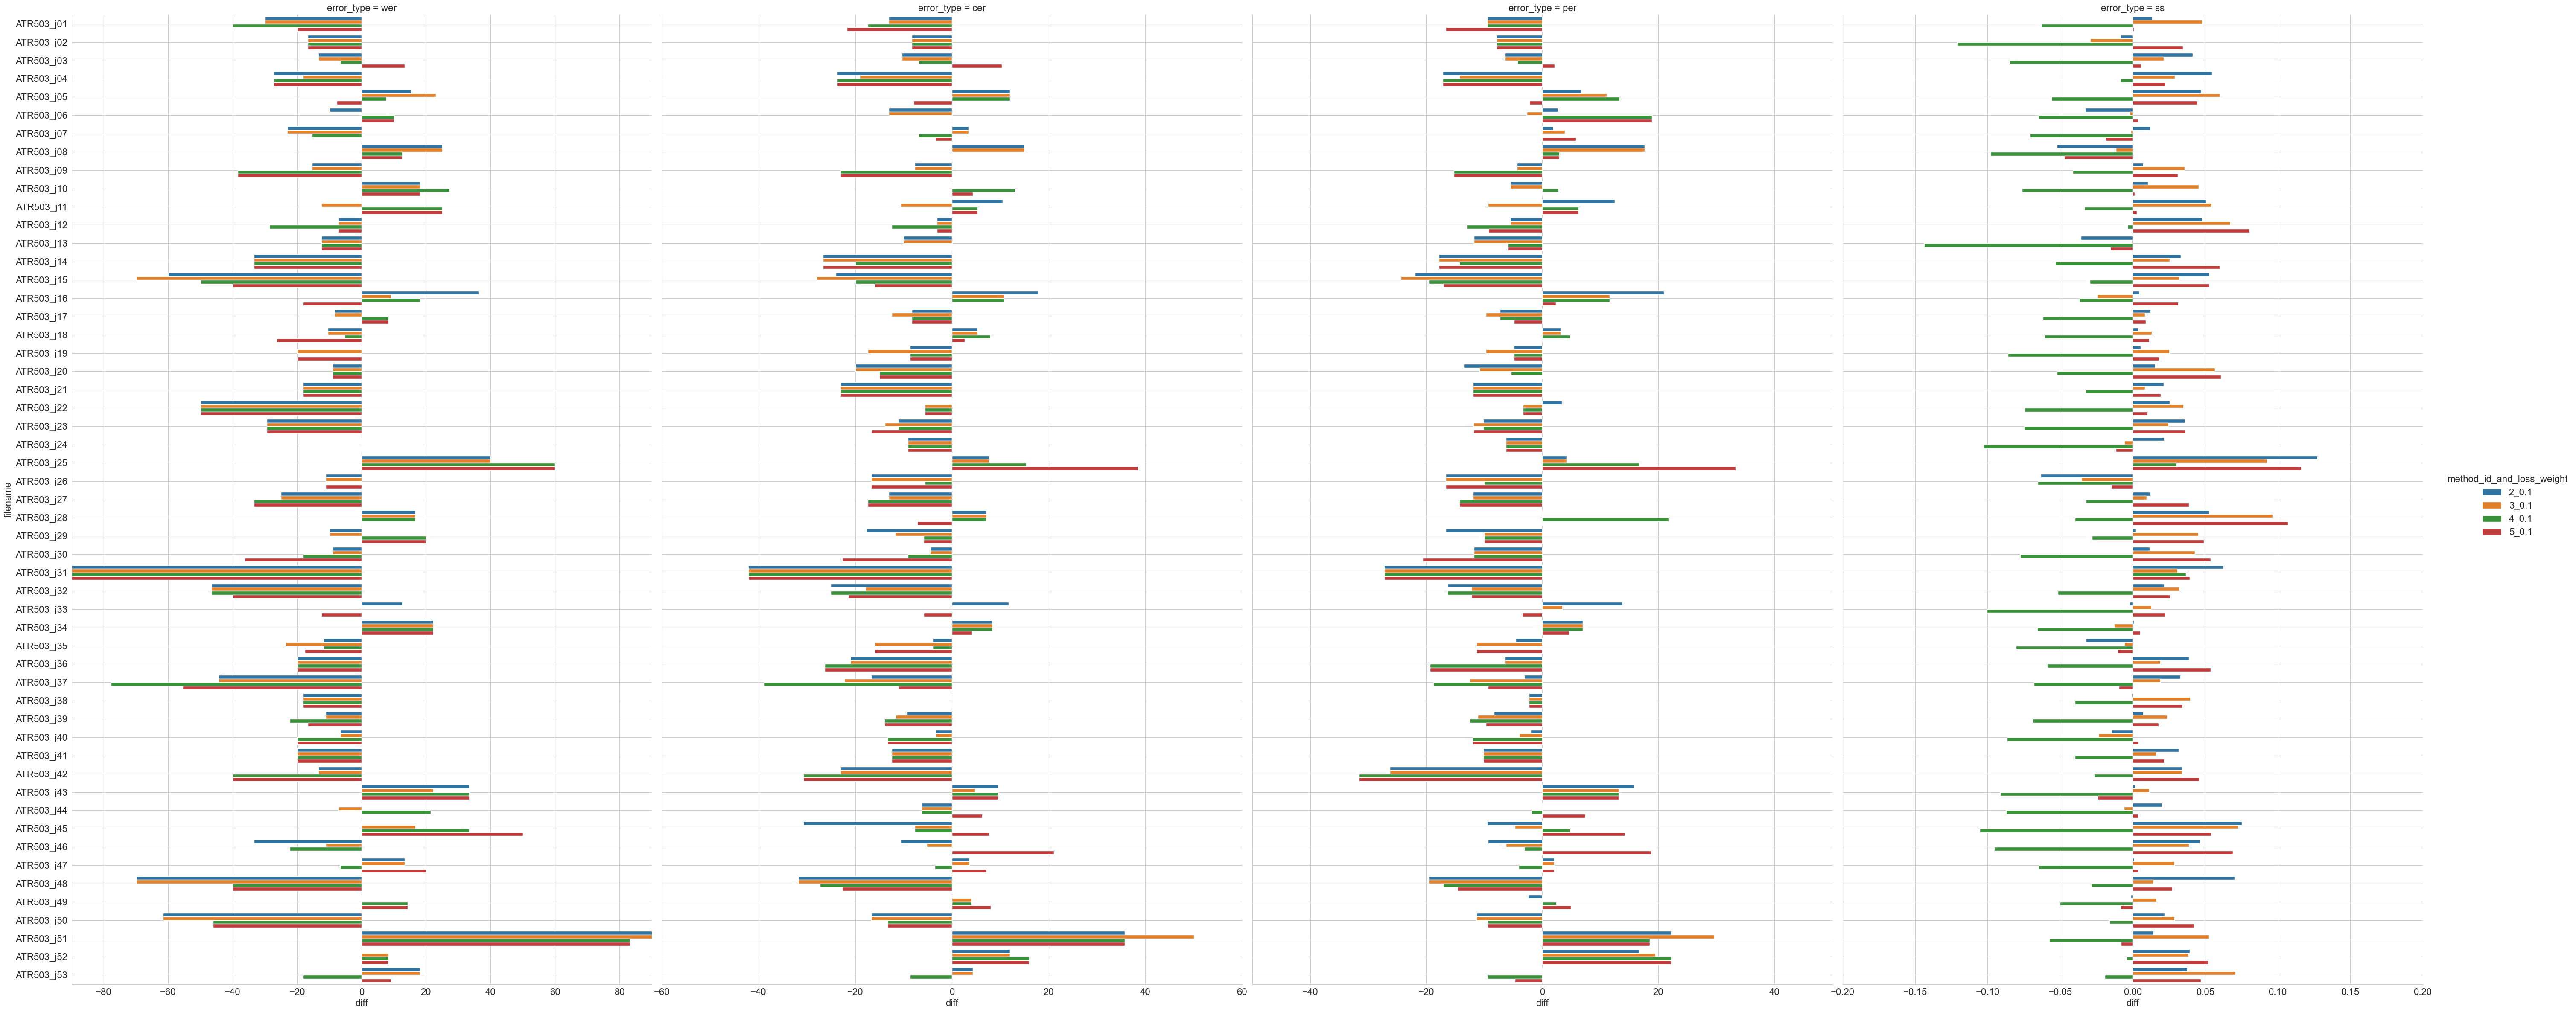

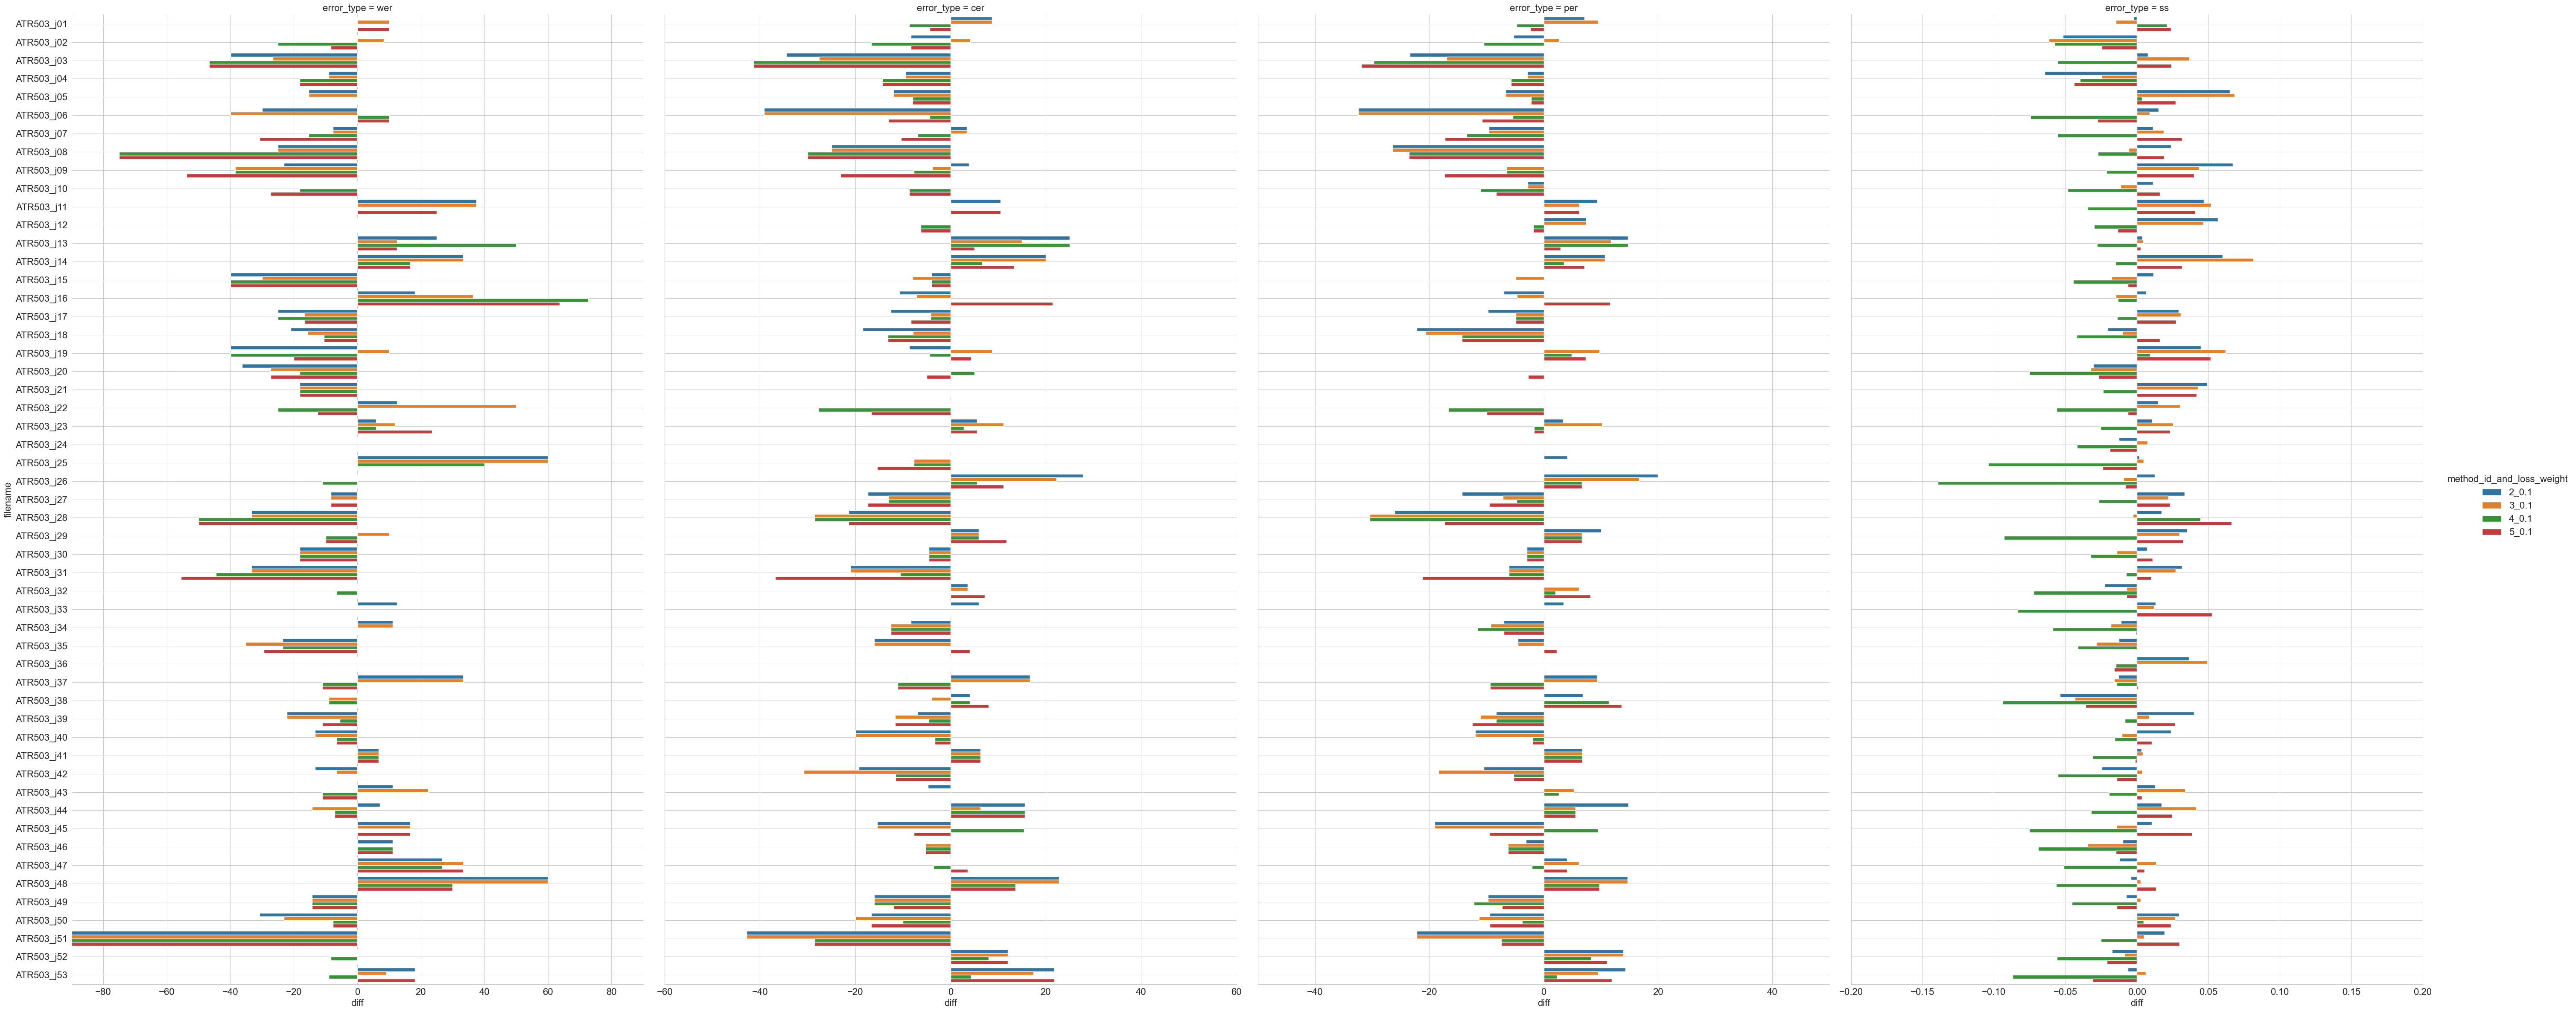

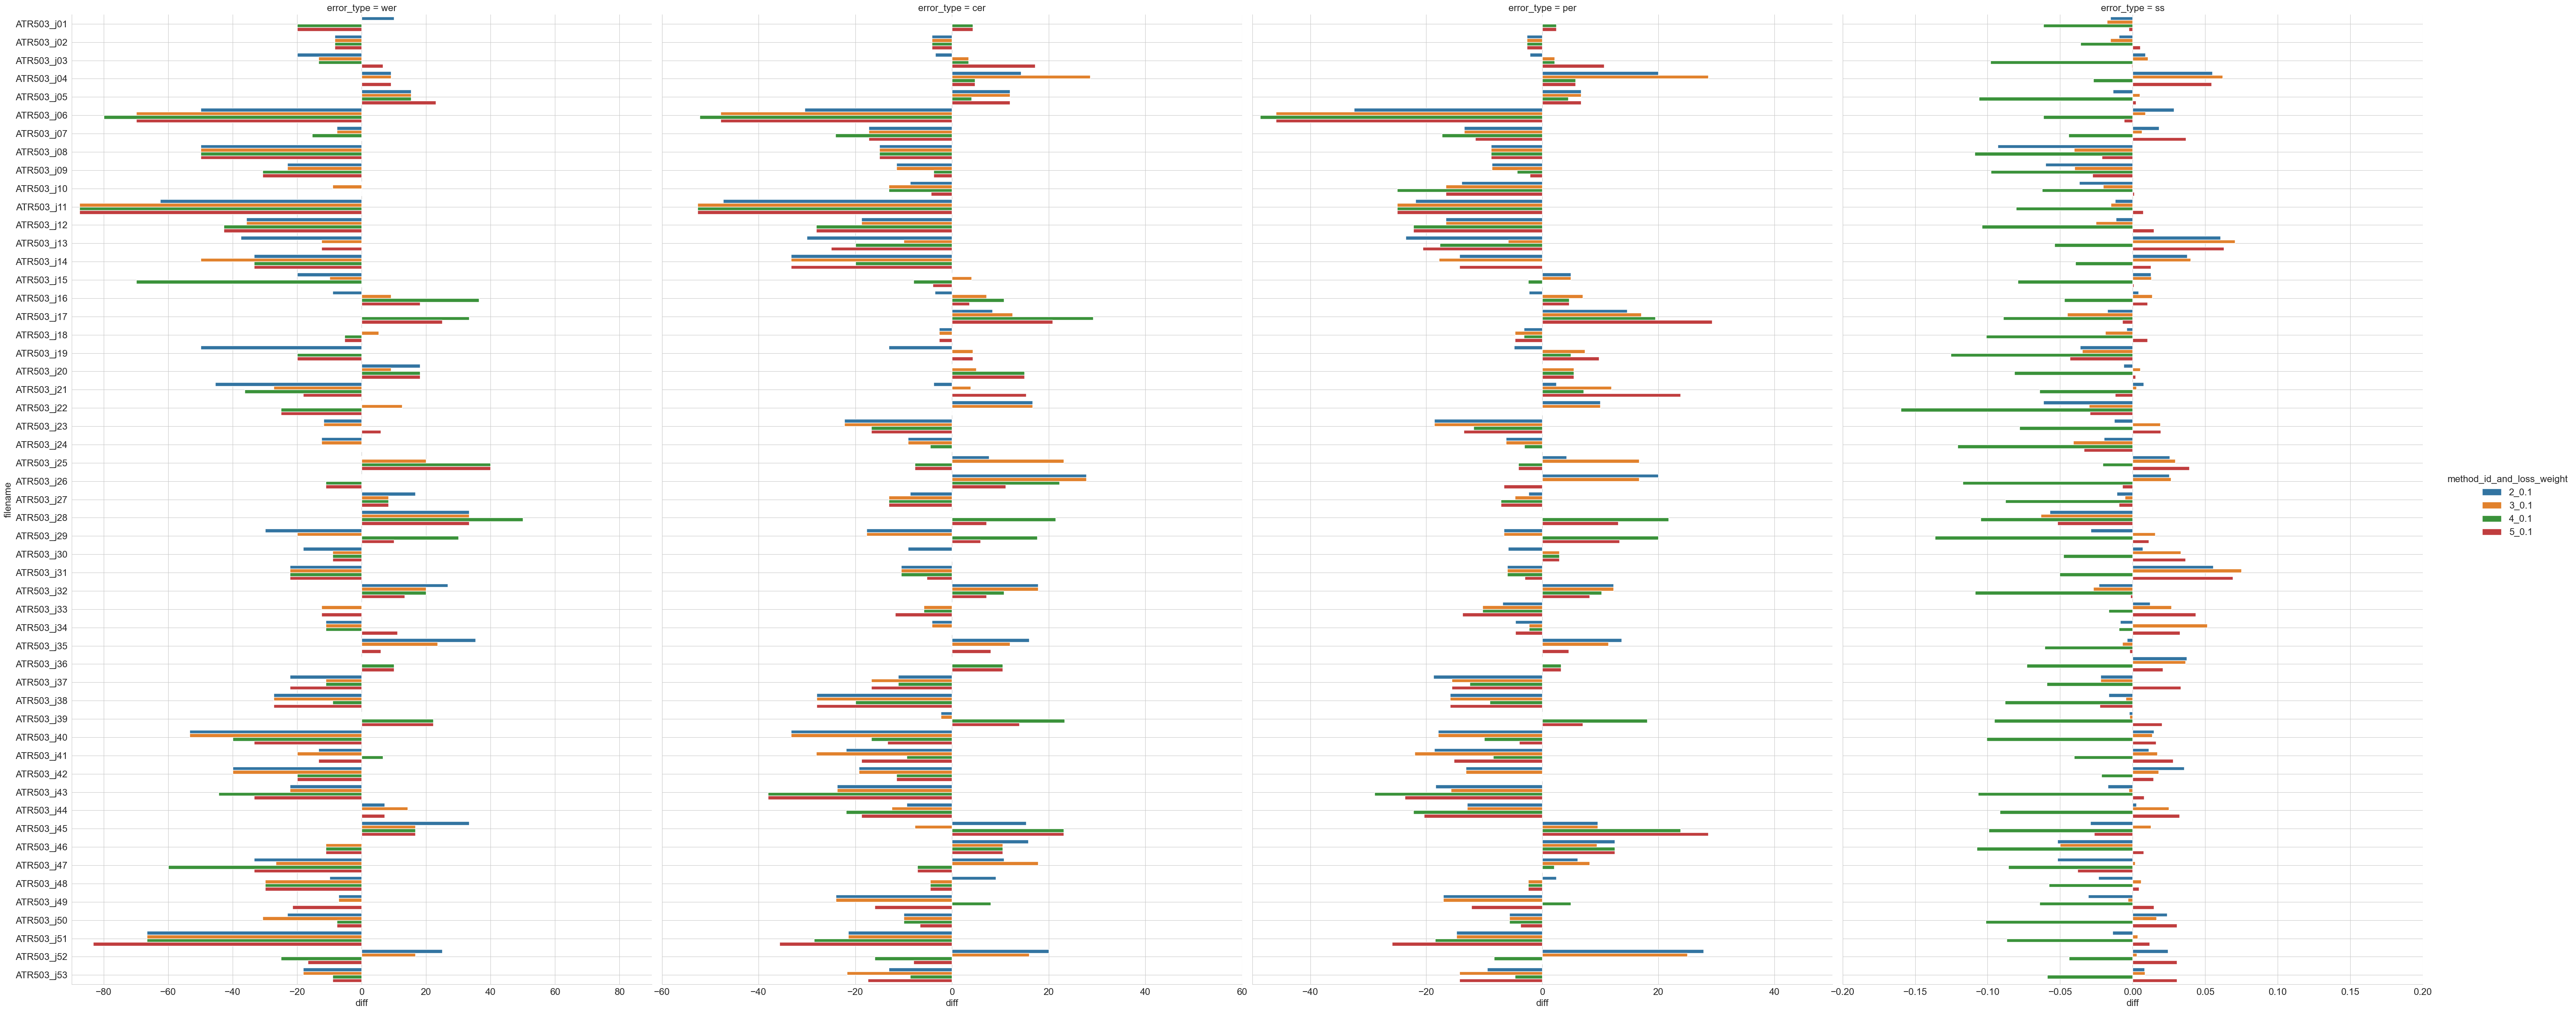

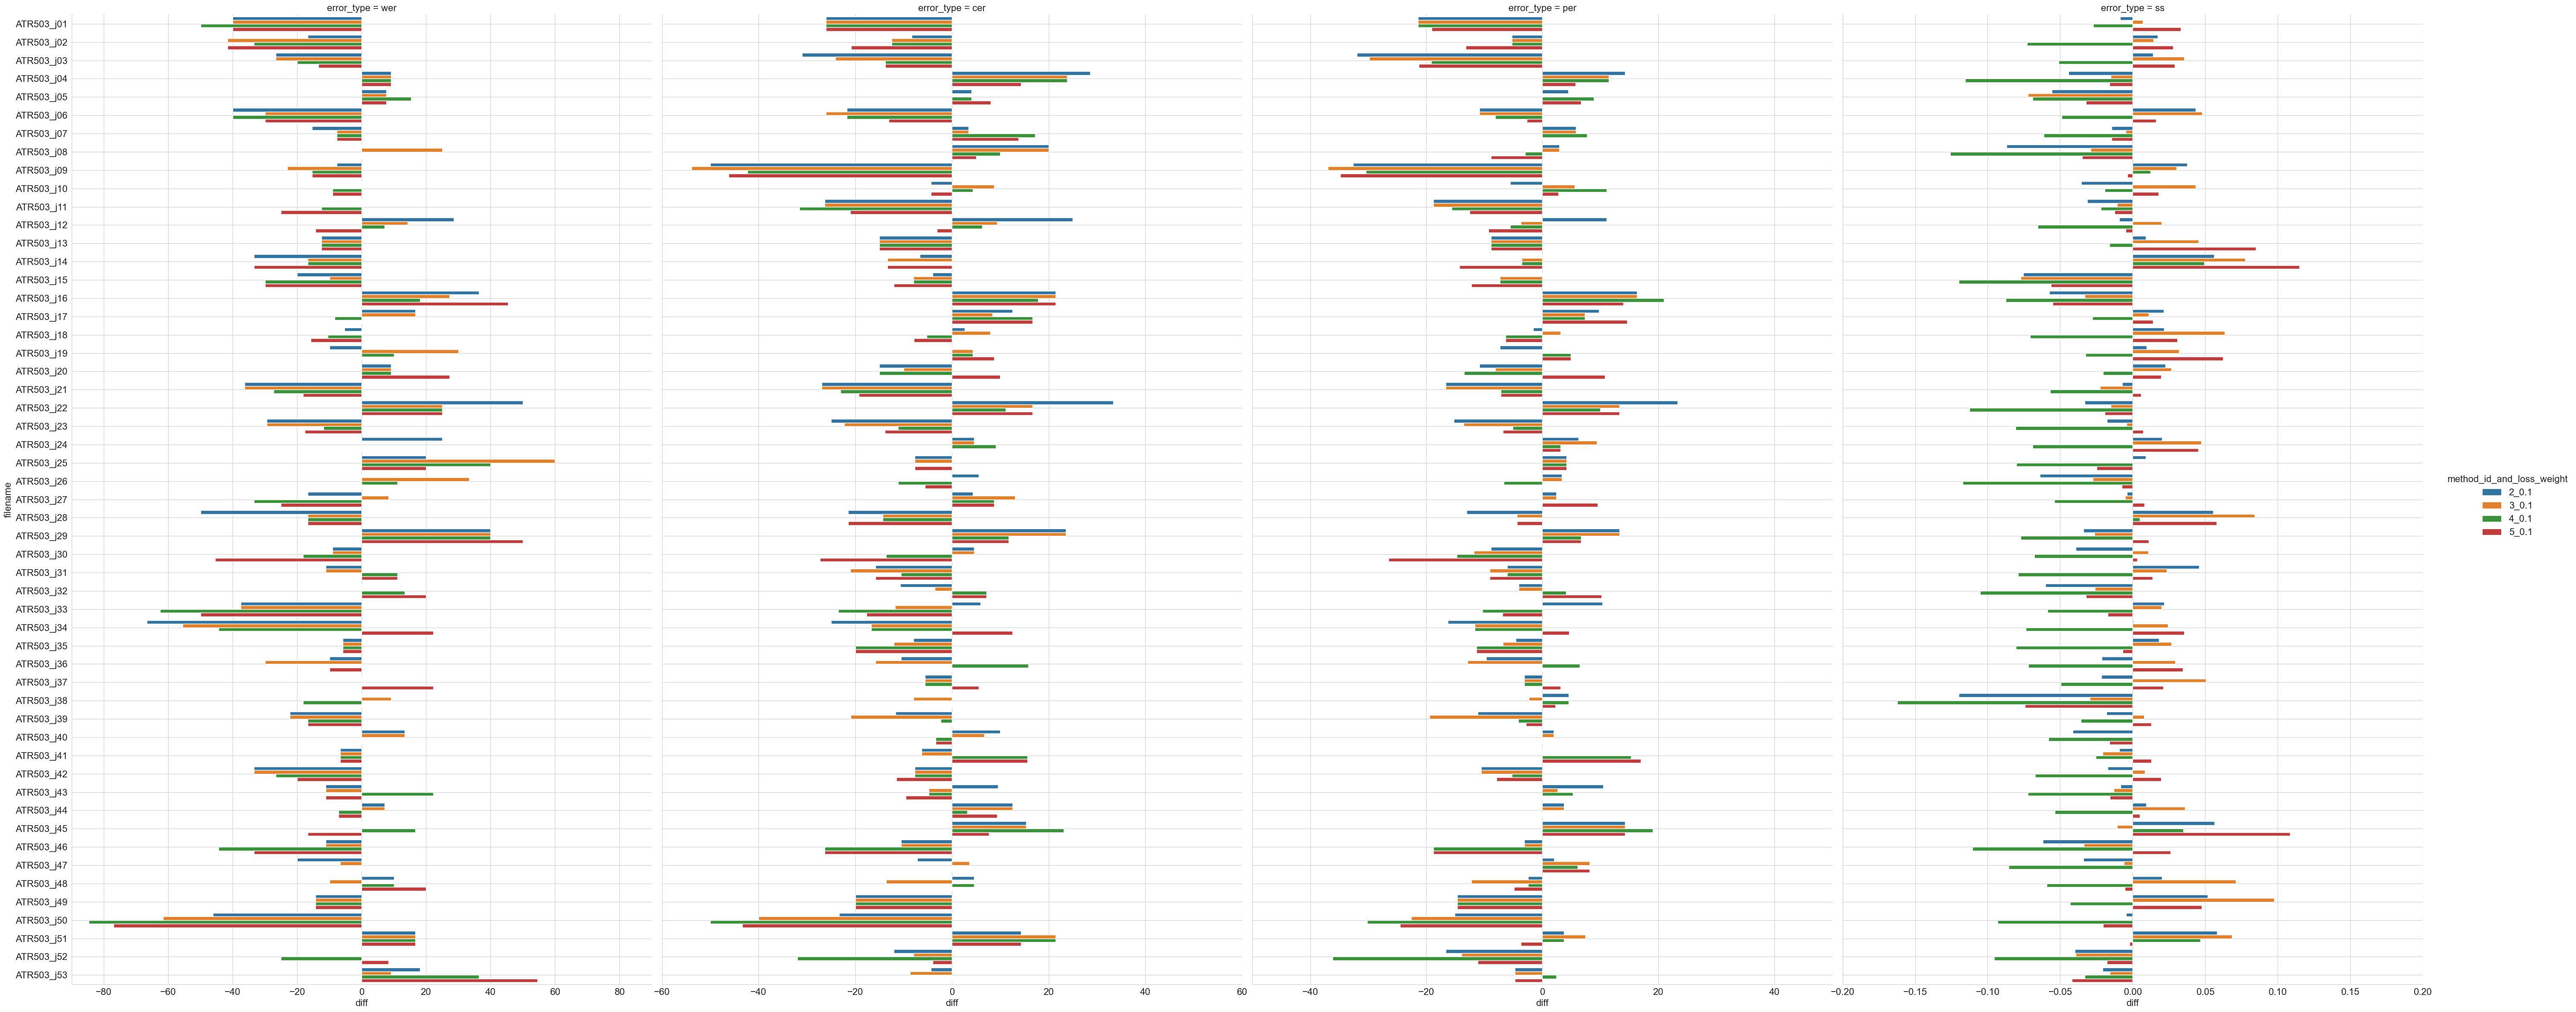

In [96]:
df_diff_tmp = (
    pl.concat(
        [
            df_diff.select(
                [
                    "run_id",
                    "method_id_and_loss_weight",
                    "speaker",
                    "filename",
                    "wer_kanjikana_diff",
                ]
            )
            .rename({"wer_kanjikana_diff": "diff"})
            .with_columns(pl.lit("wer").alias("error_type")),
            df_diff.select(
                [
                    "run_id",
                    "method_id_and_loss_weight",
                    "speaker",
                    "filename",
                    "cer_kana_diff",
                ]
            )
            .rename({"cer_kana_diff": "diff"})
            .with_columns(pl.lit("cer").alias("error_type")),
            df_diff.select(
                [
                    "run_id",
                    "method_id_and_loss_weight",
                    "speaker",
                    "filename",
                    "per_phoneme_diff",
                ]
            )
            .rename({"per_phoneme_diff": "diff"})
            .with_columns(pl.lit("per").alias("error_type")),
            df_diff.select(
                [
                    "run_id",
                    "method_id_and_loss_weight",
                    "speaker",
                    "filename",
                    "spk_sim_diff",
                ]
            )
            .rename({"spk_sim_diff": "diff"})
            .with_columns(pl.lit("ss").alias("error_type")),
        ]
    )
    .with_columns(
        (pl.col("method_id_and_loss_weight") + "_" + pl.col("error_type")).alias(
            "method_id_and_loss_weight_and_error_type"
        ),
        pl.col("error_type")
        .replace({"wer": 1, "cer": 2, "per": 3, "ss": 4})
        .alias("error_type_id"),
    )
    .sort(["speaker", "filename", "error_type_id", "method_id_and_loss_weight"])
)

for speaker in df_diff_tmp.select(["speaker"]).unique().to_numpy().reshape(-1):
    graph = sns.catplot(
        df_diff_tmp.filter(
            (pl.col("method_id_and_loss_weight") != "0_0.001")
            & (pl.col("speaker") == speaker)
        ),
        kind="bar",
        x="diff",
        y="filename",
        hue="method_id_and_loss_weight",
        col="error_type",
        height=24,
        aspect=0.6,
        legend=True,
        legend_out=True,
        sharey=True,
        sharex=False,
    )

    for ax, xlim_val in zip(graph.axes.flat, [90, 60, 50, 0.2]):
        ax.grid(True, axis="y")
        ax.set_xlim(-xlim_val, xlim_val)

    save_path = Path(f"./figs/obj_metrics_3/{speaker}/diff.png")
    save_path.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(str(save_path))

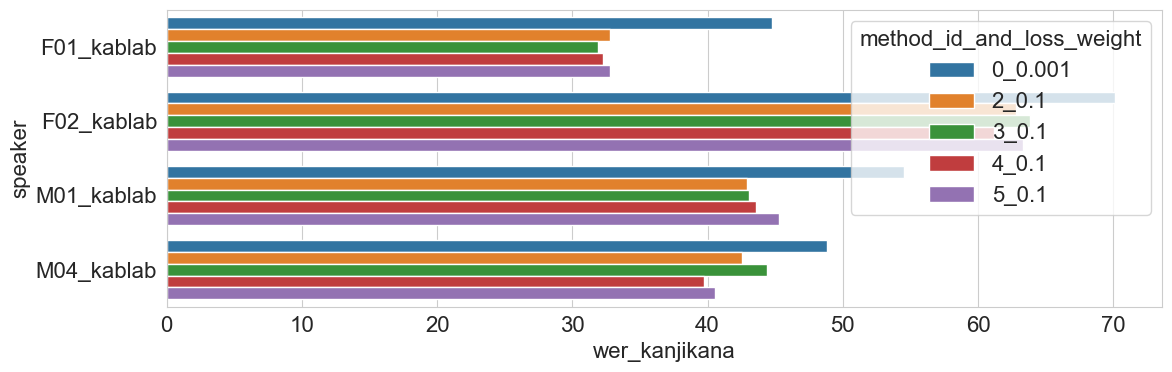

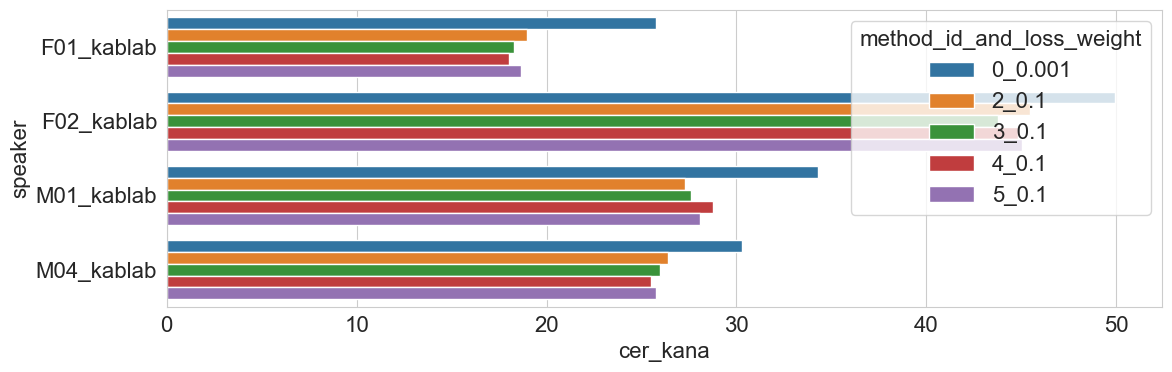

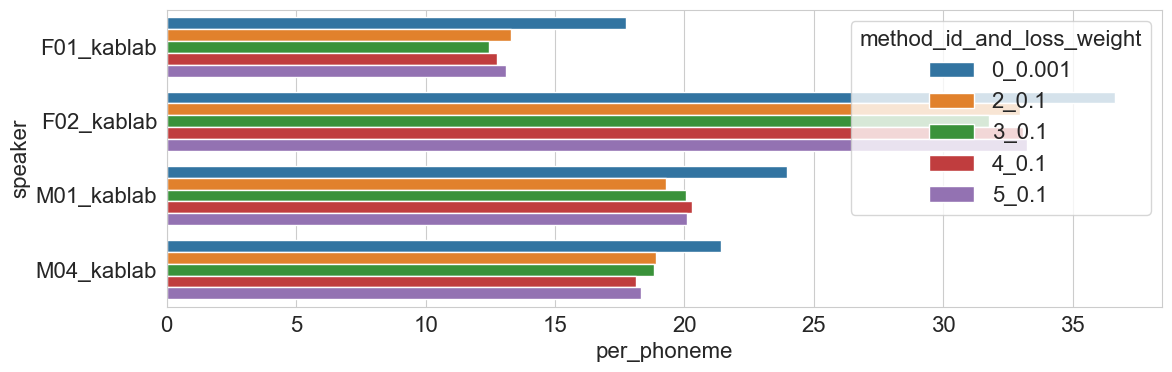

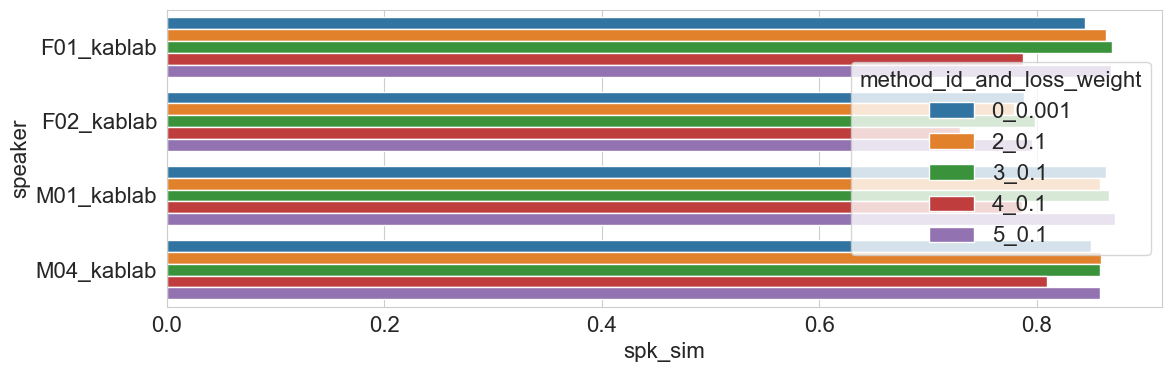

In [97]:
for metric in ["wer_kanjikana", "cer_kana", "per_phoneme", "spk_sim"]:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
    sns.barplot(
        df_result_spk.filter(
            (pl.col("run_id").is_in(best_run_id_lst))
            & (pl.col("kind") == "pred_mel_speech_ssl")
        ).sort(["method_id_and_loss_weight", "speaker"]),
        x=metric,
        y="speaker",
        hue="method_id_and_loss_weight",
        ax=ax,
    )
    fig.tight_layout()

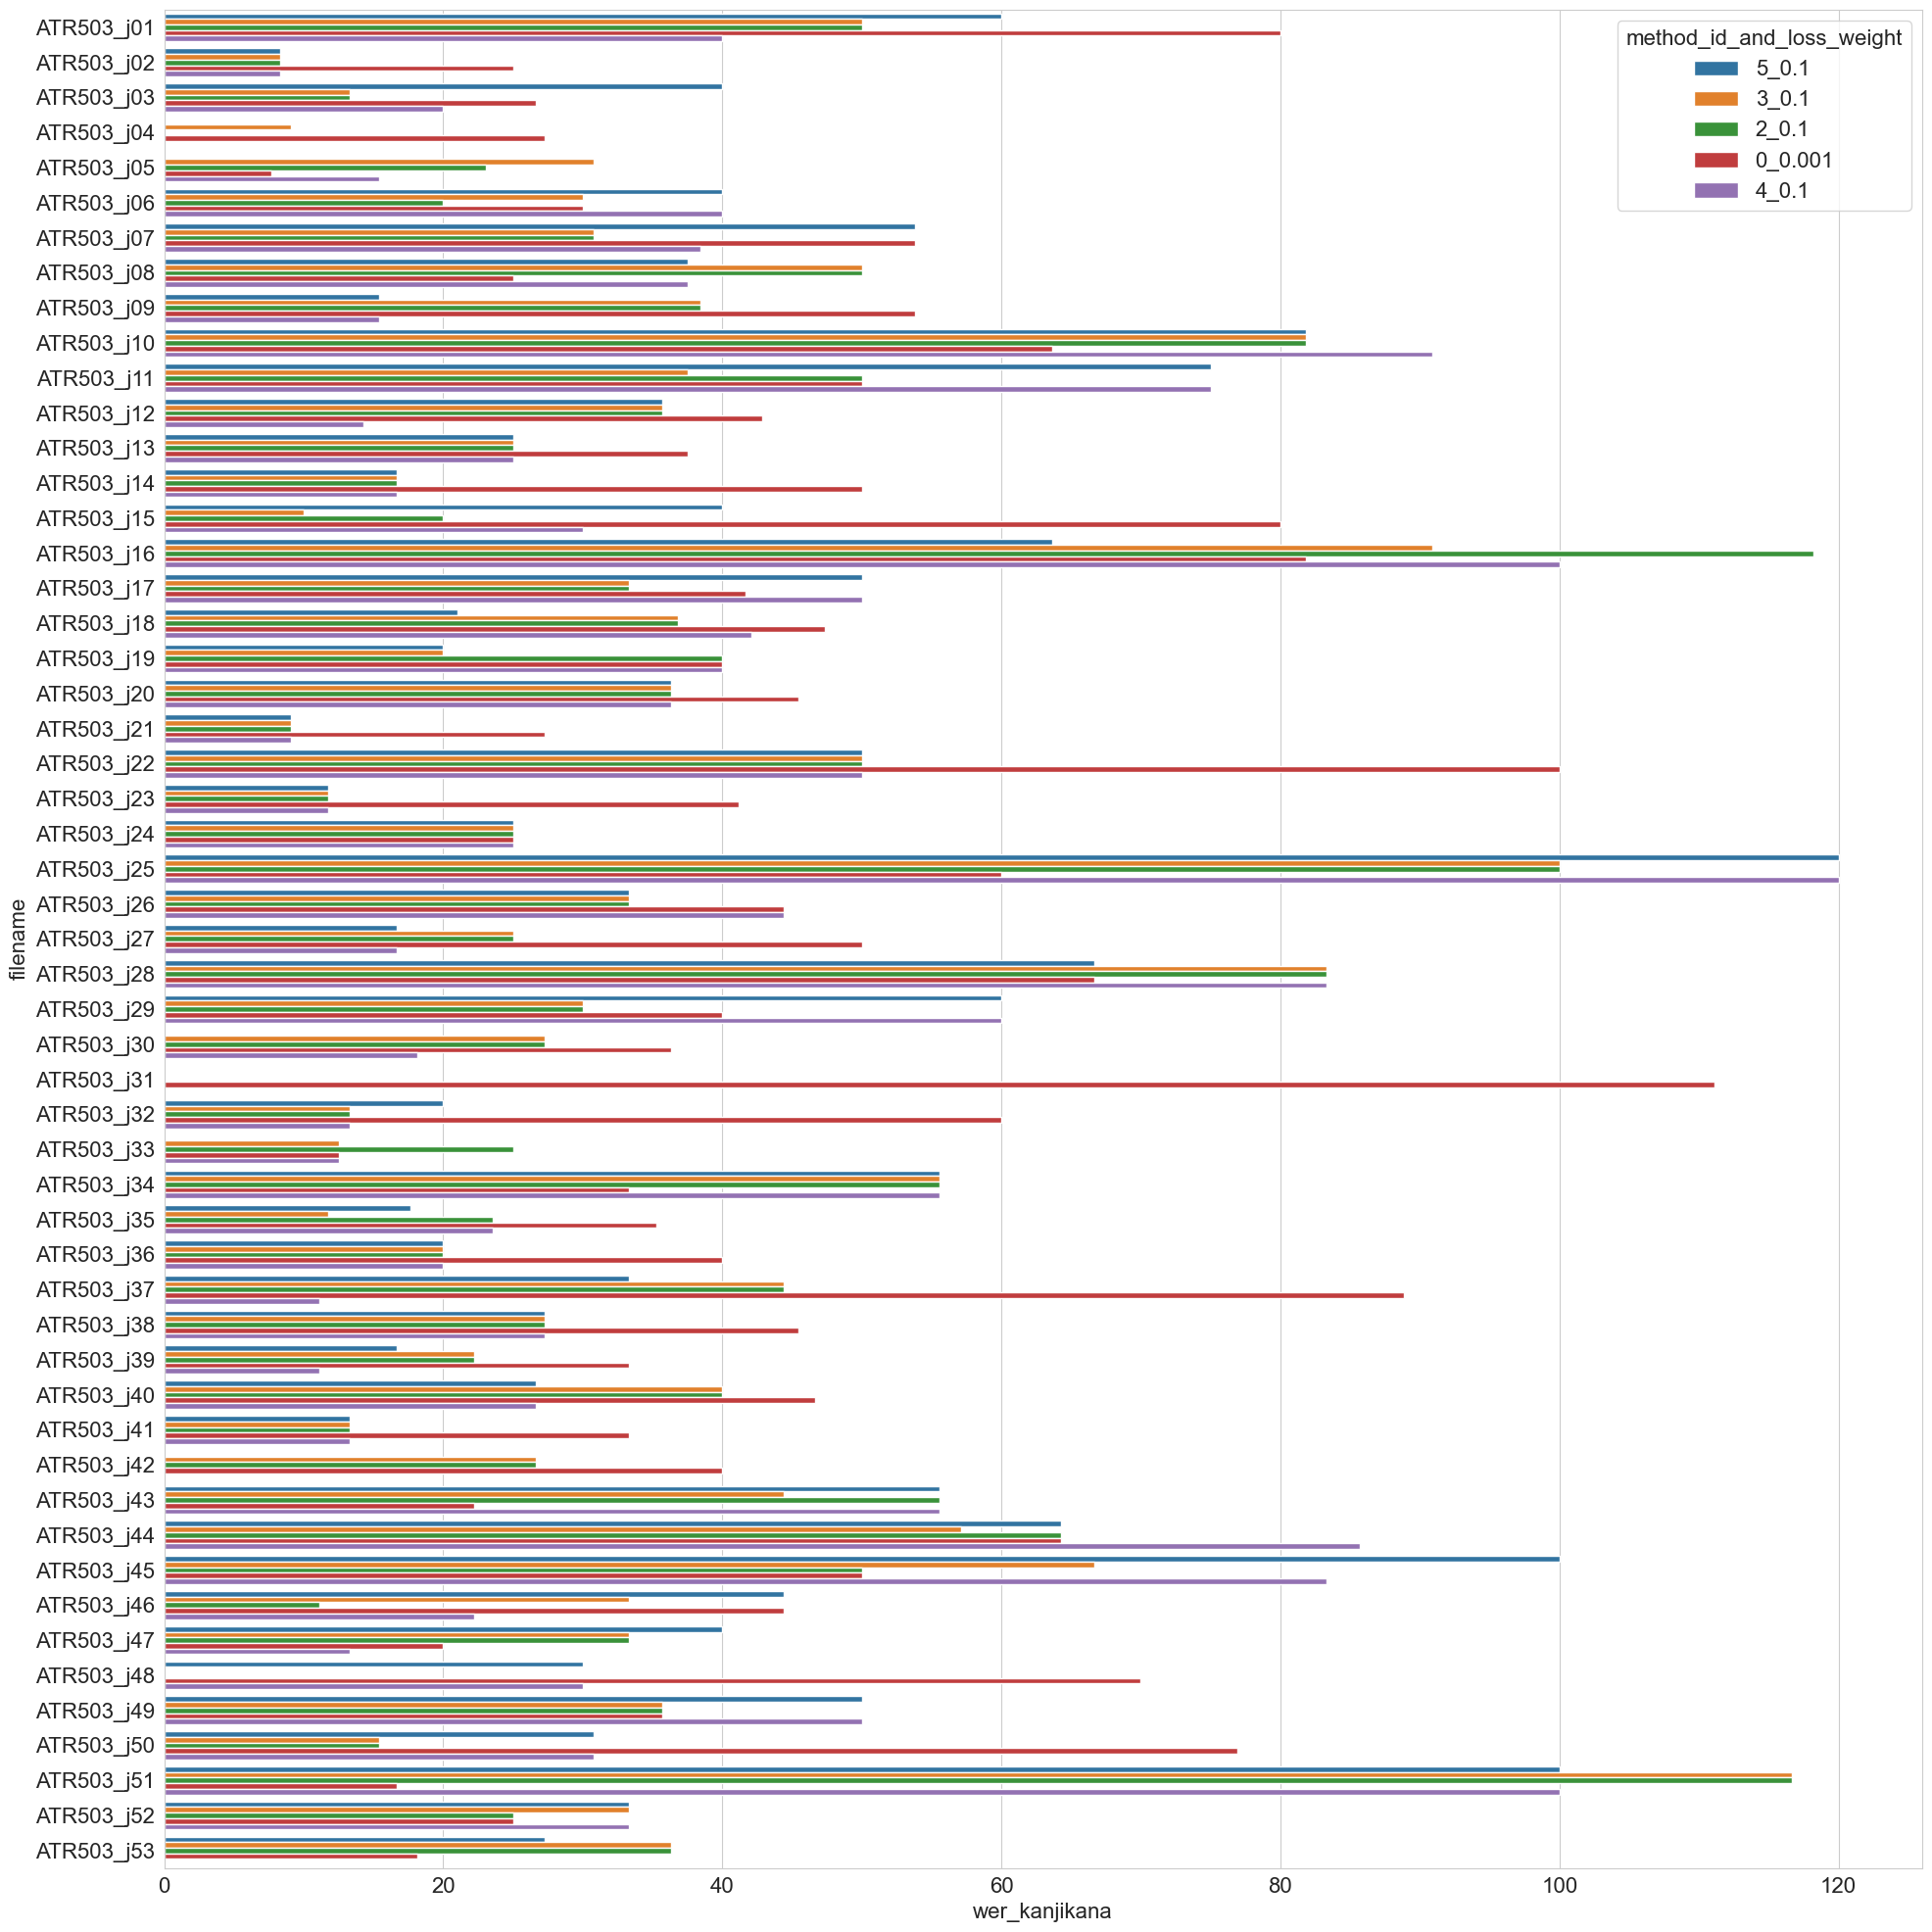

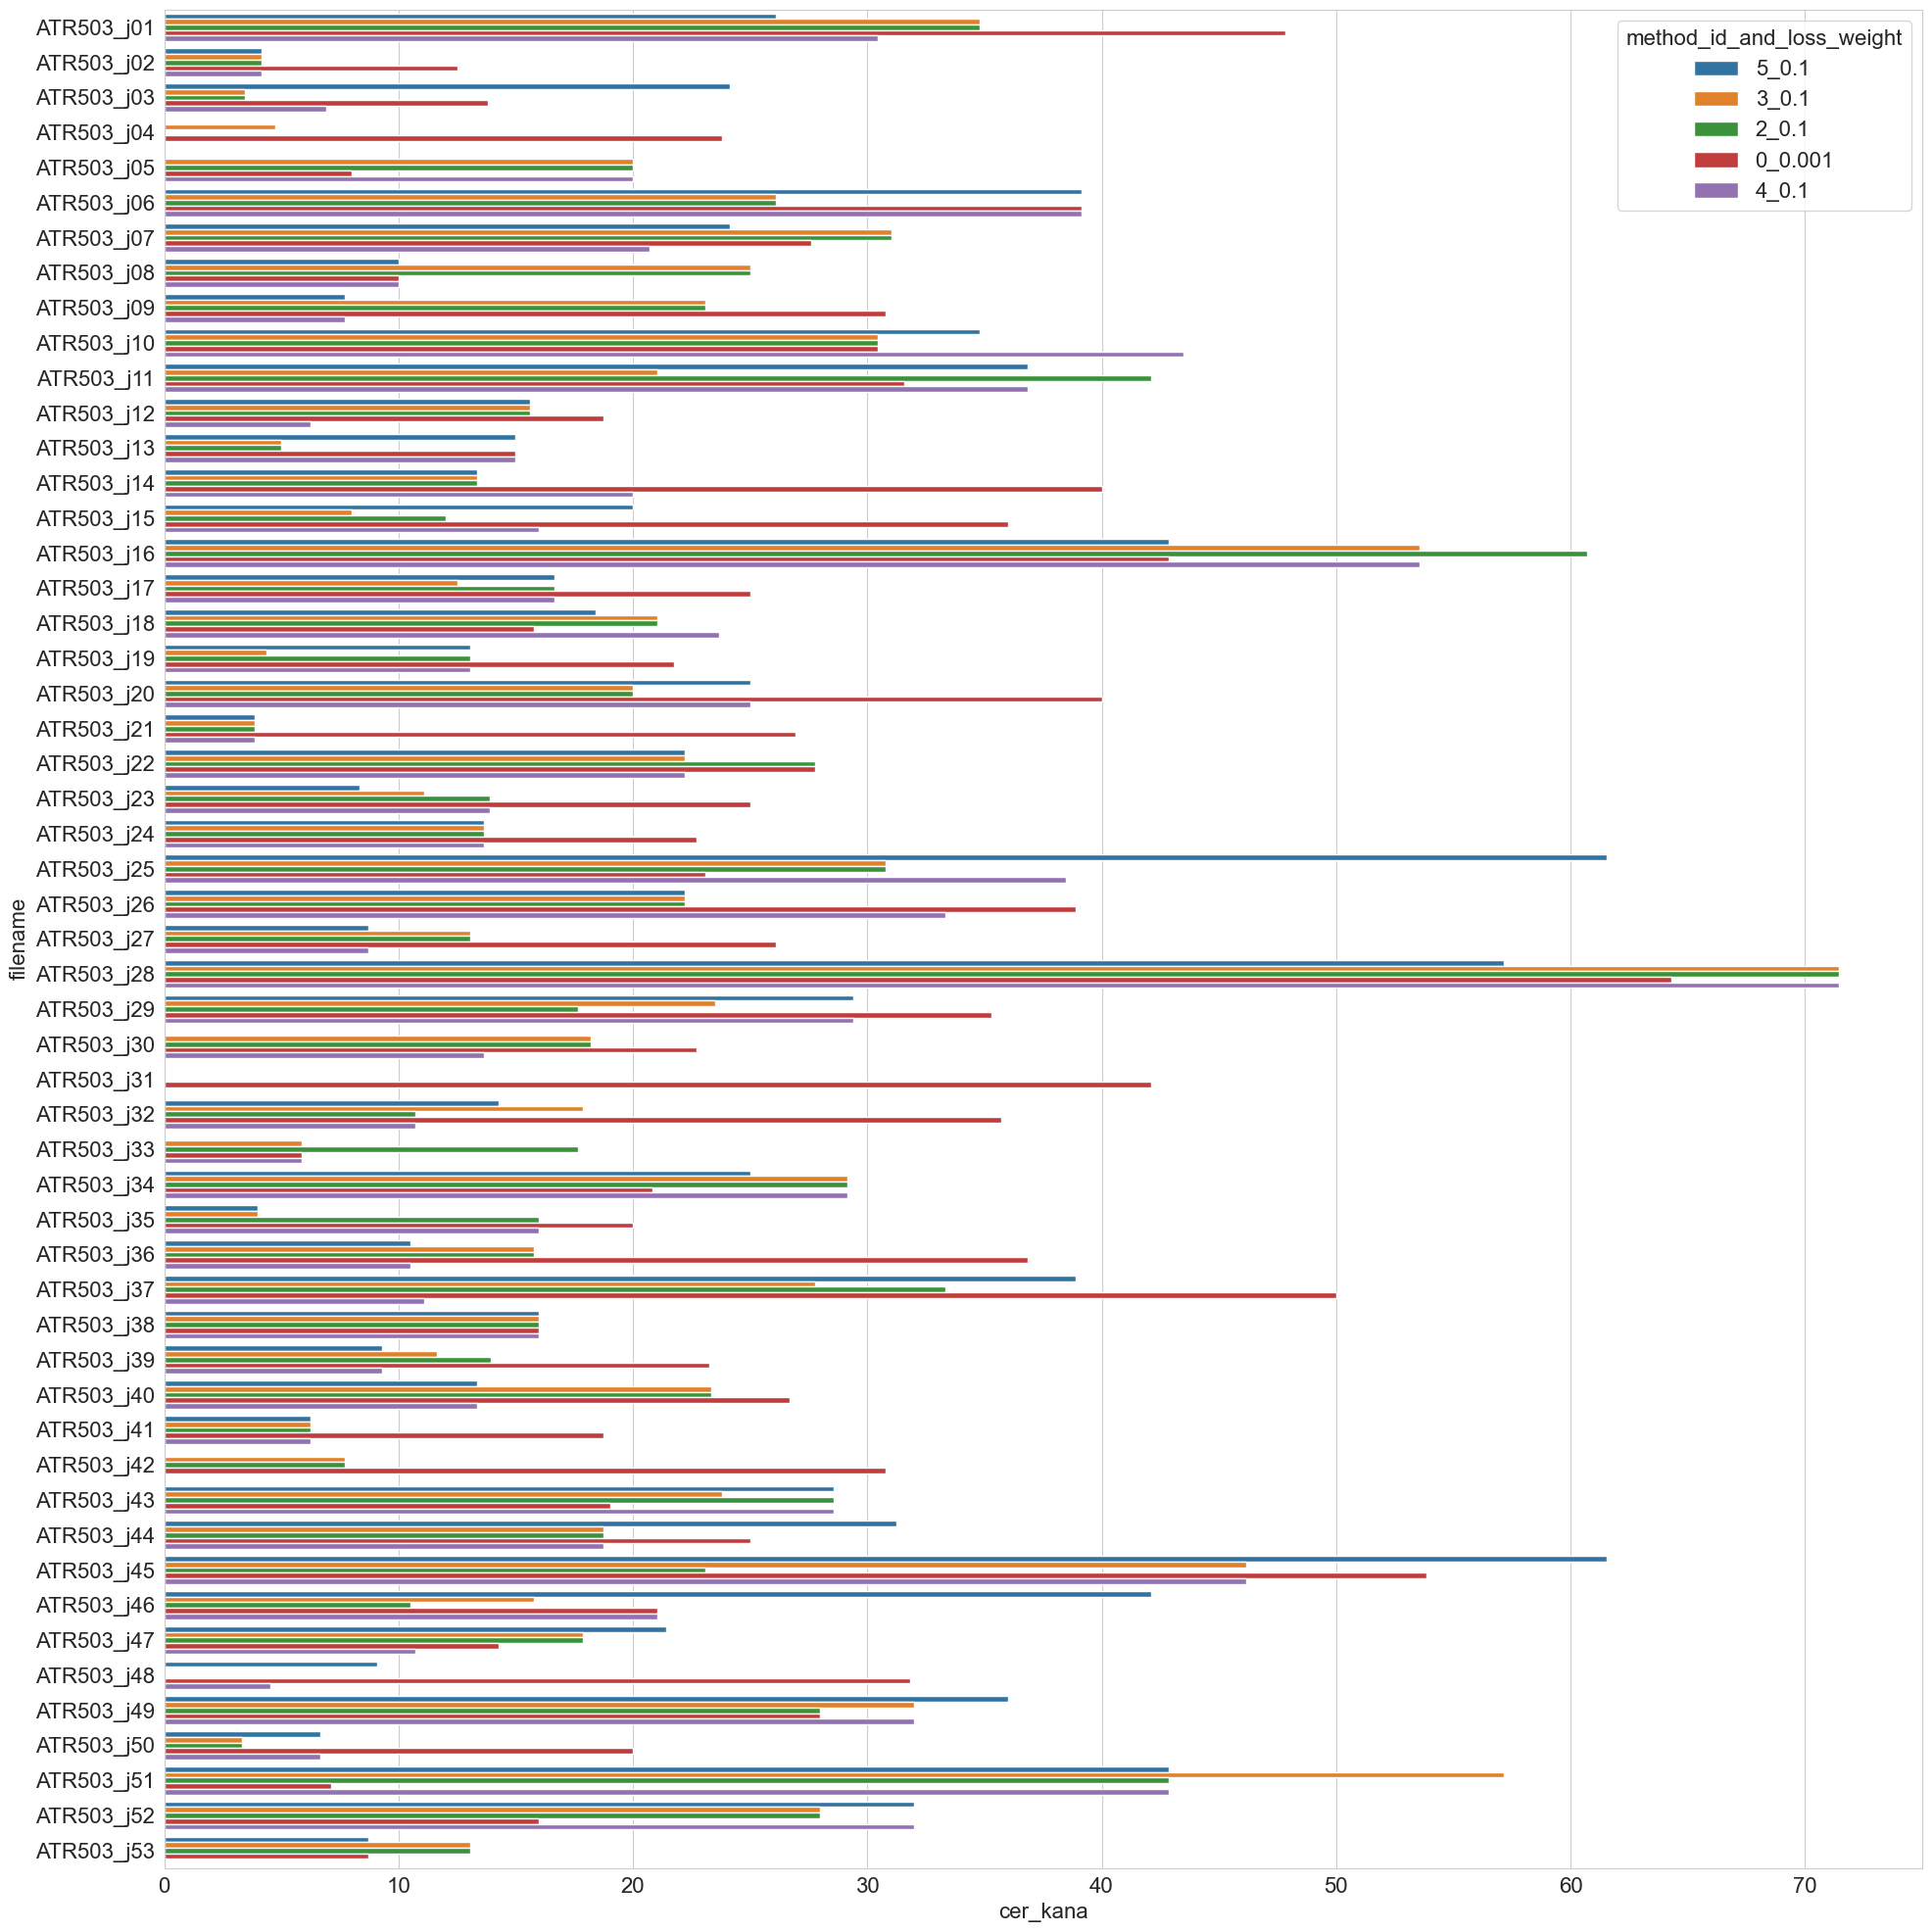

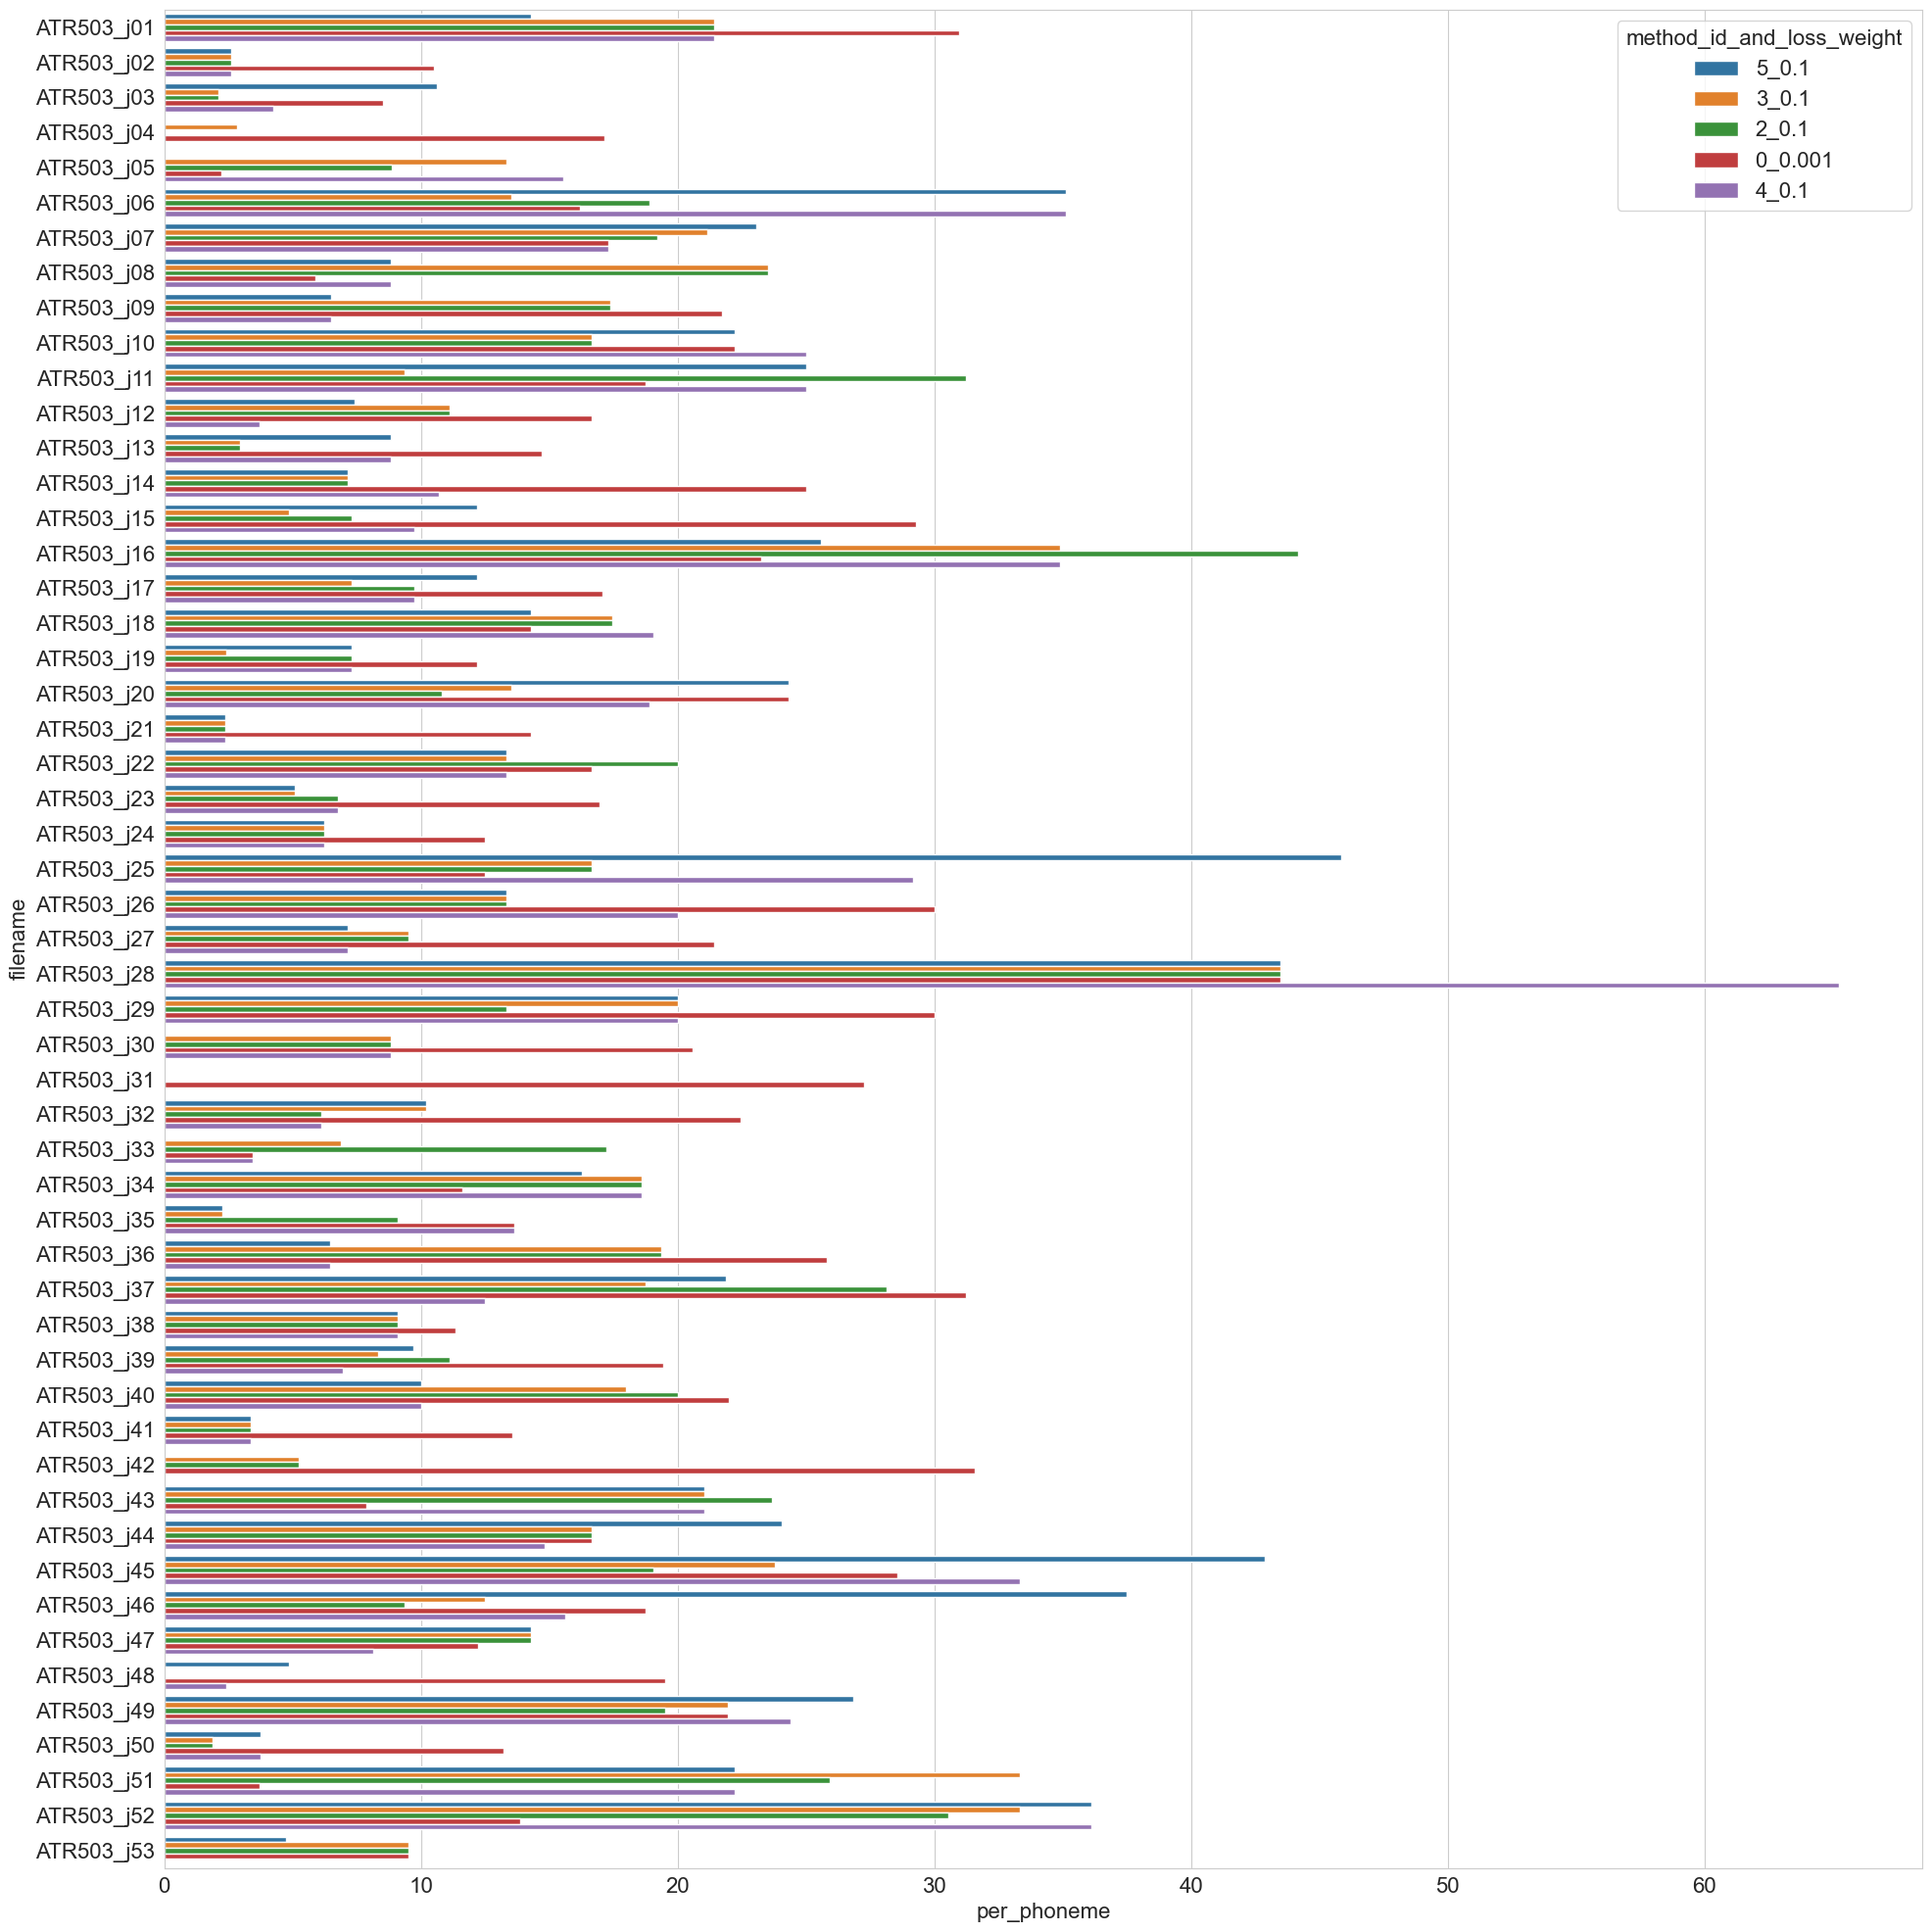

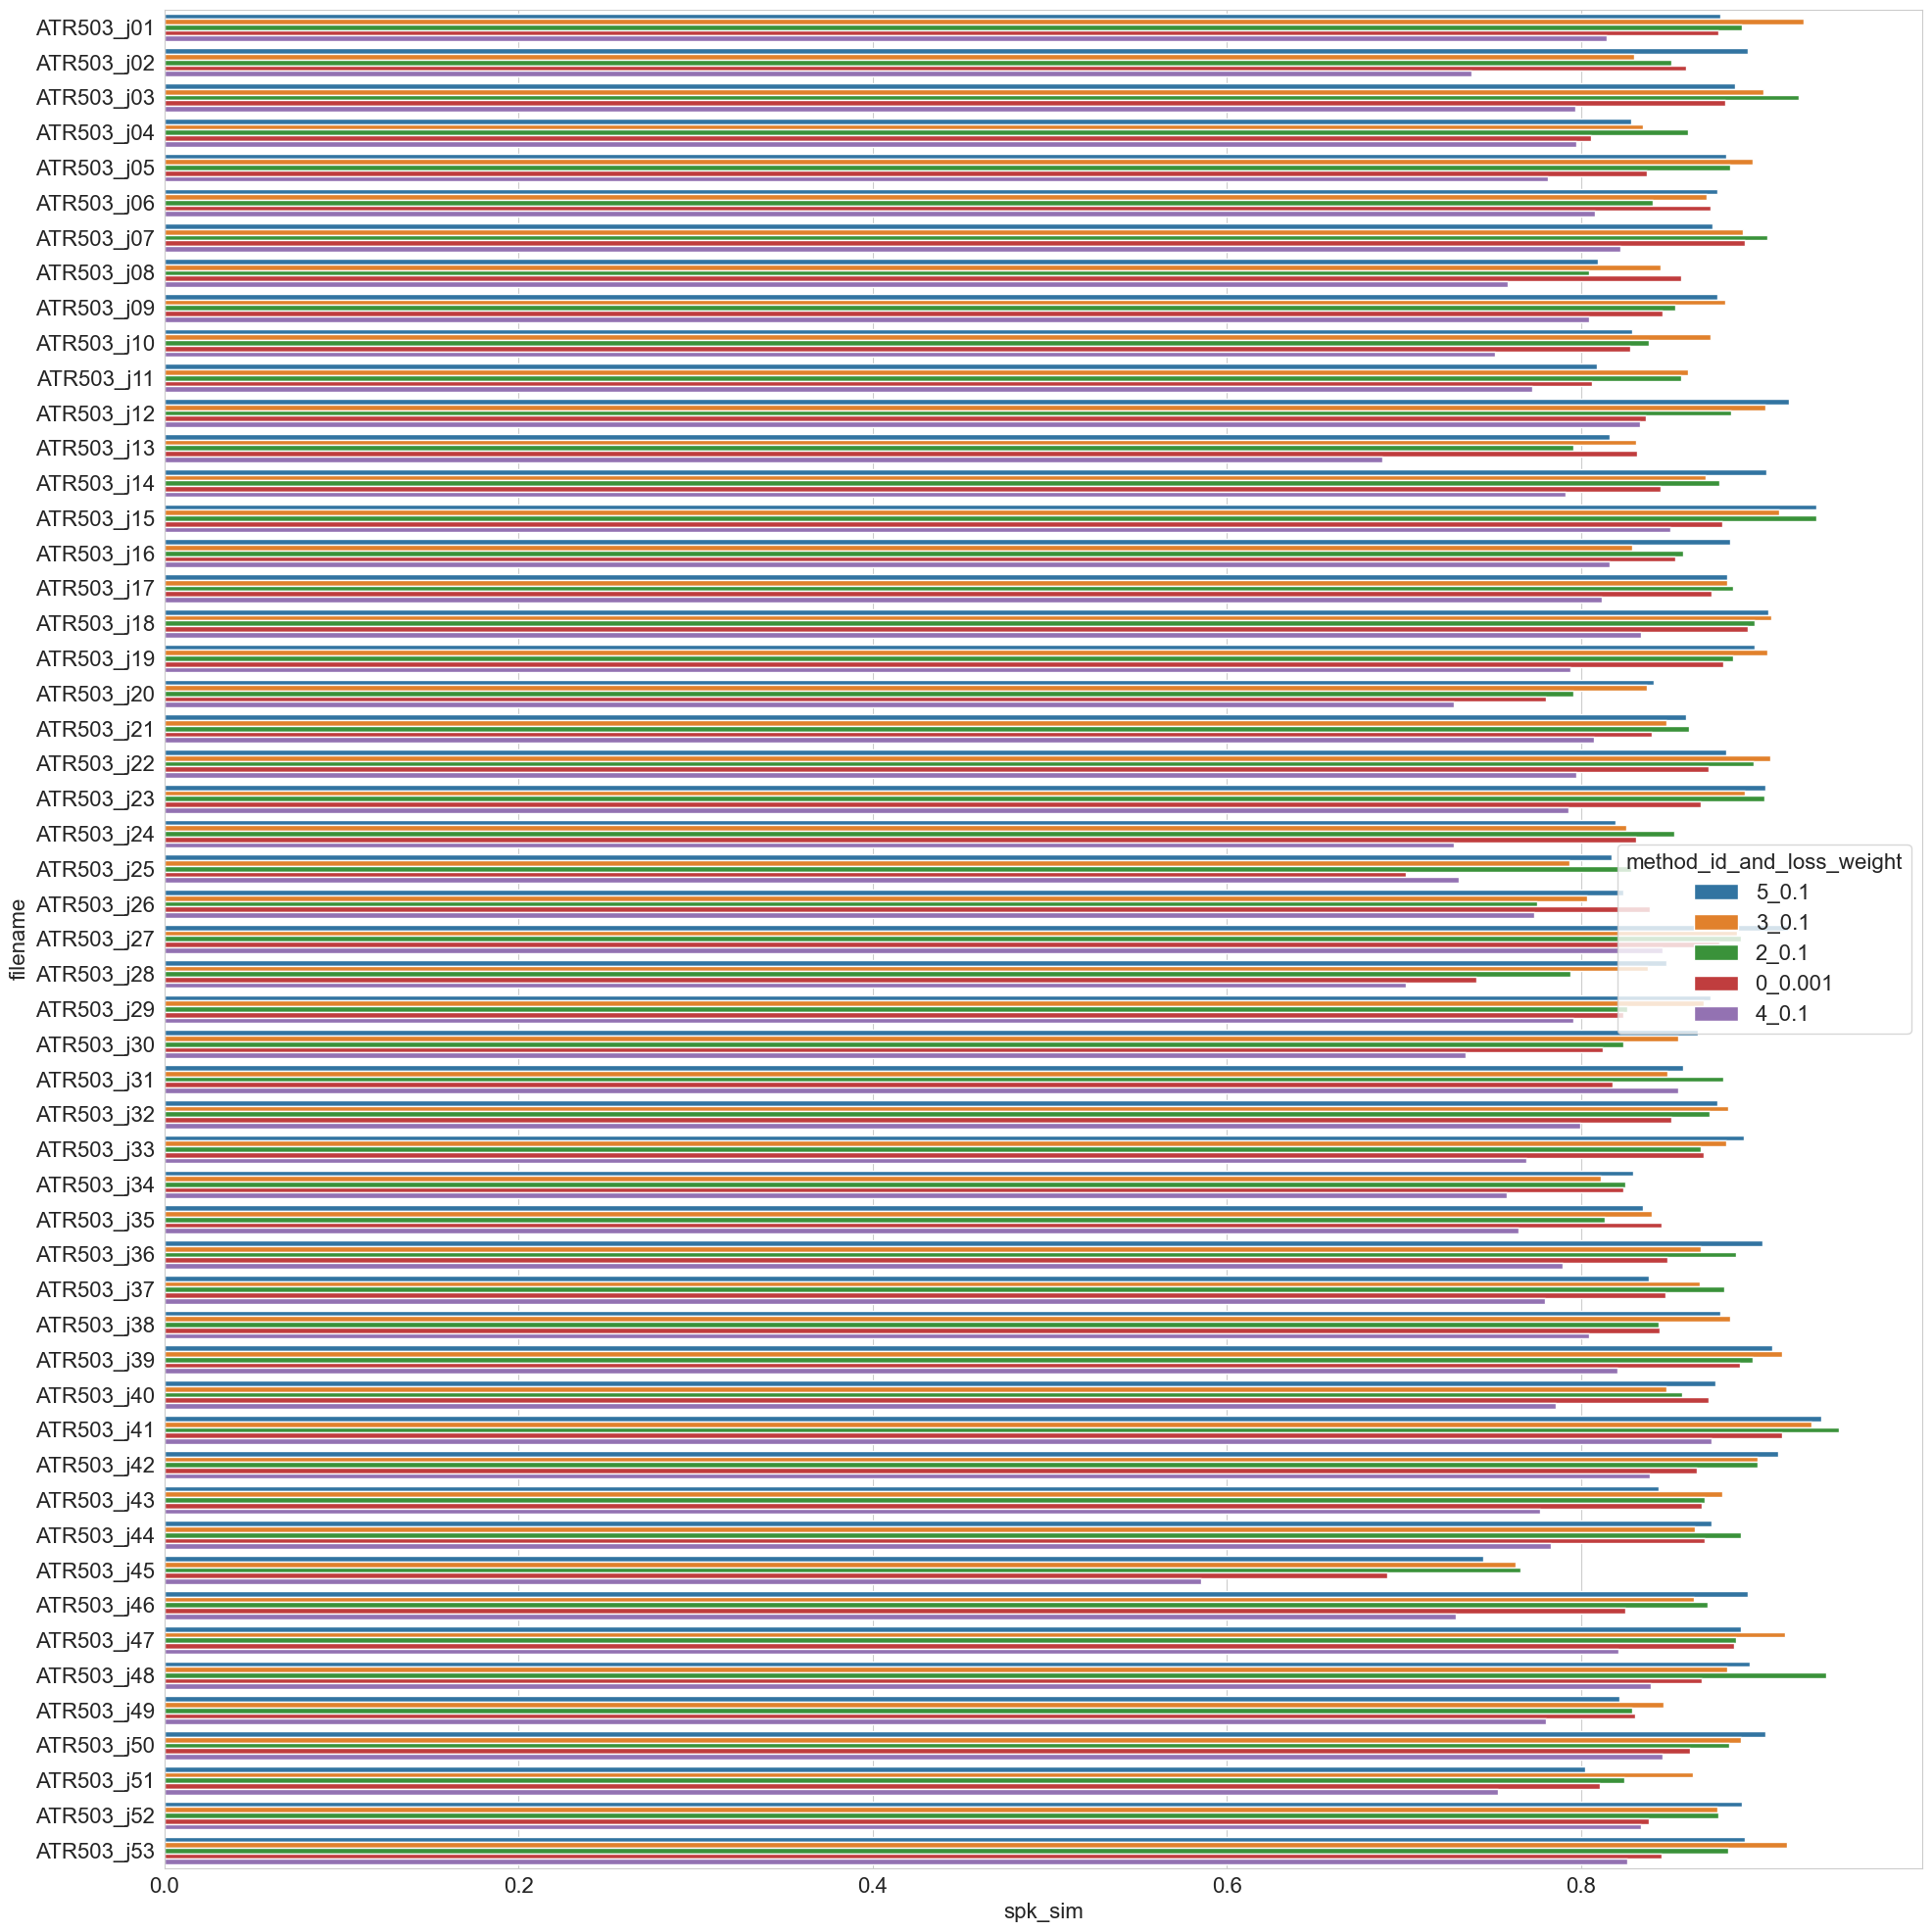

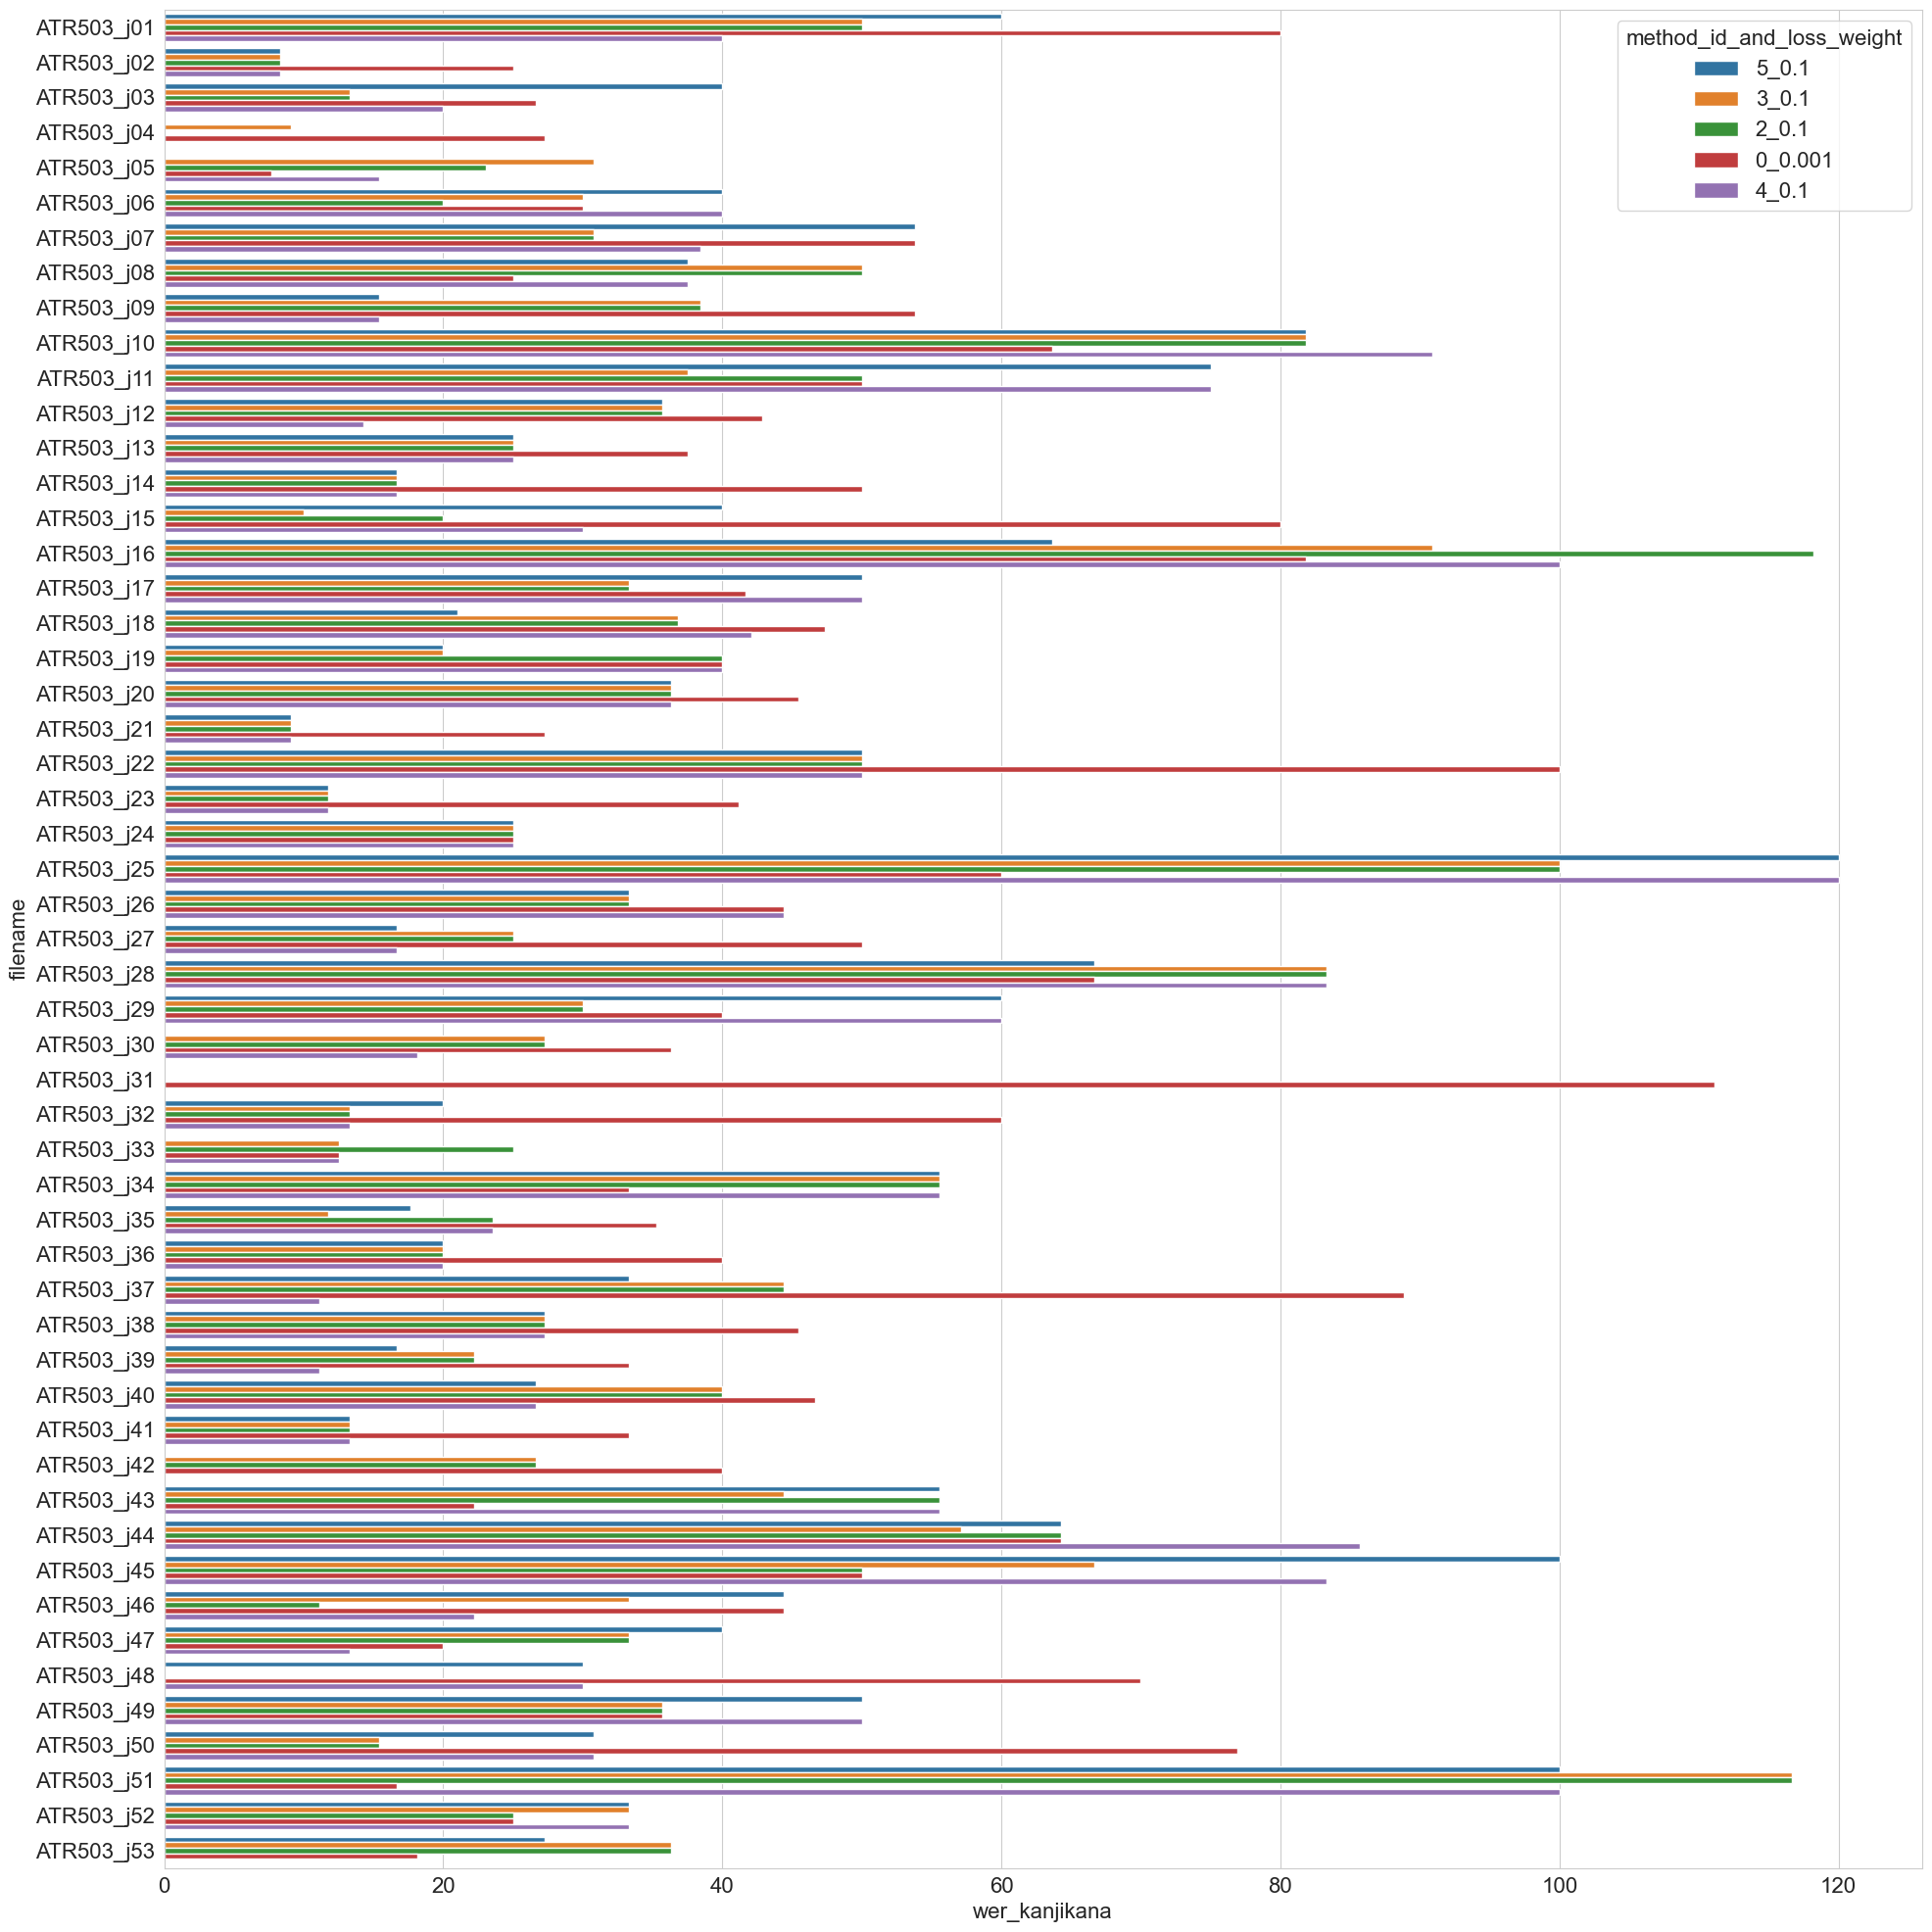

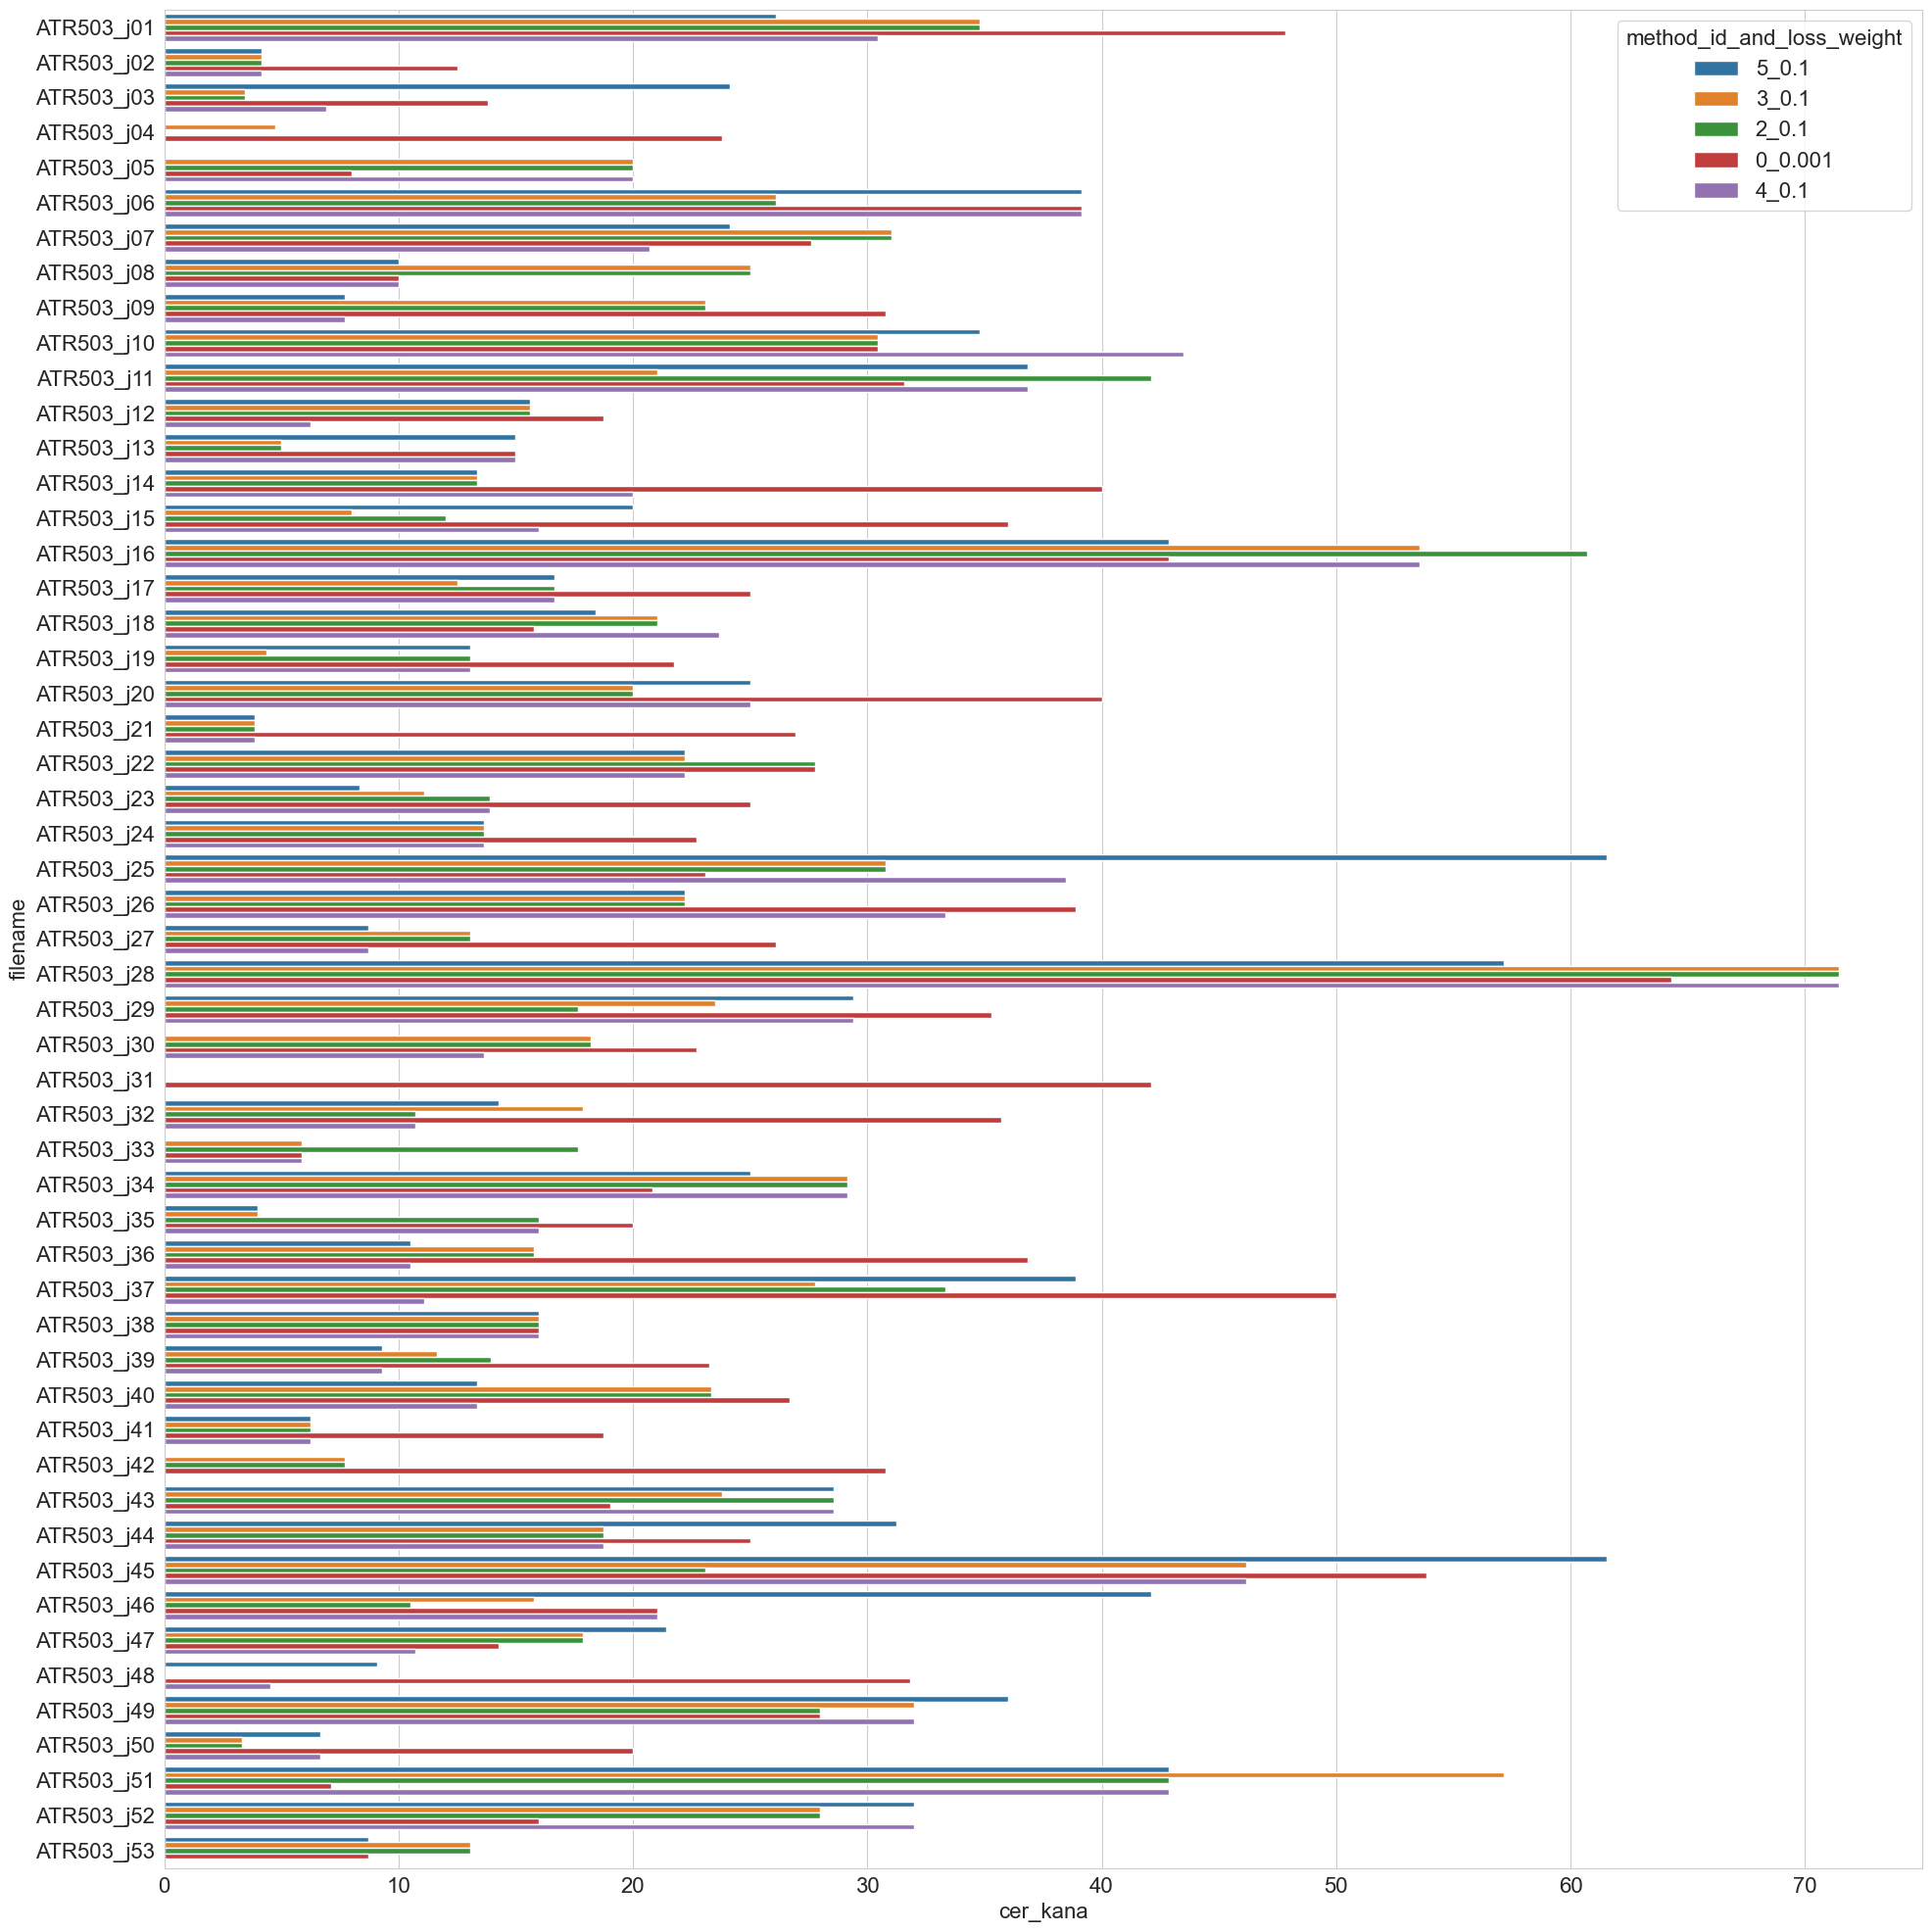

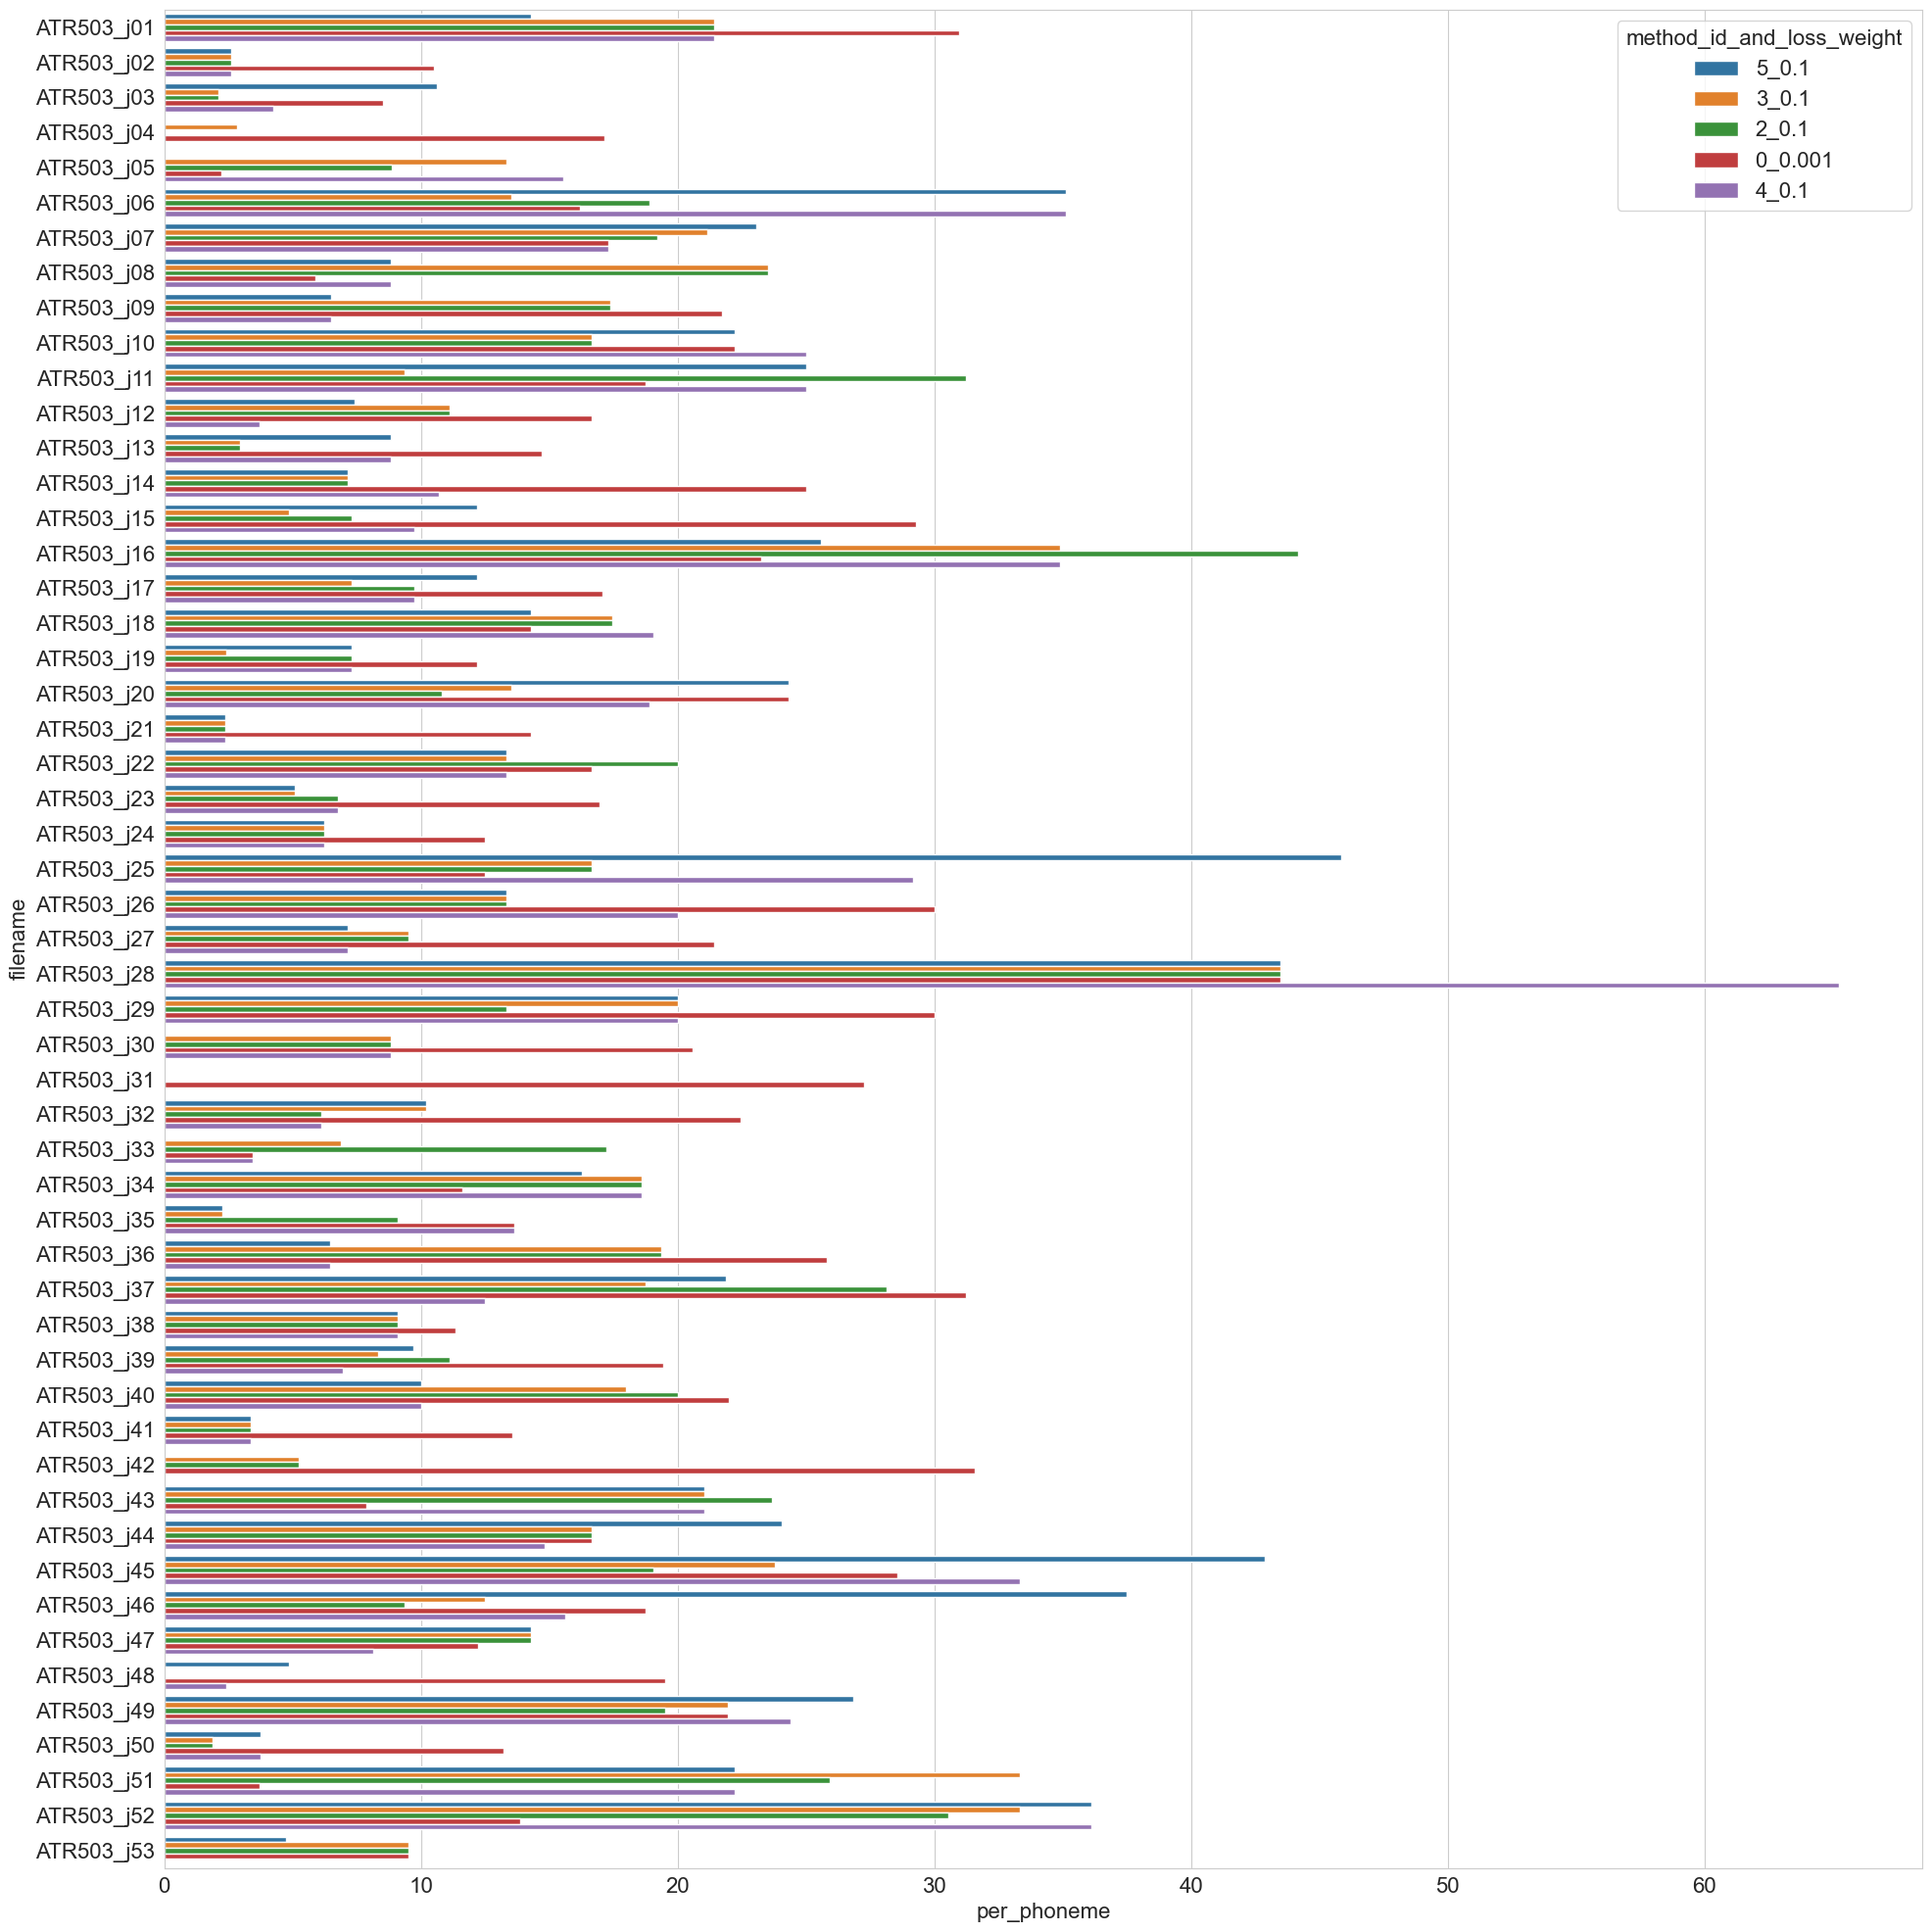

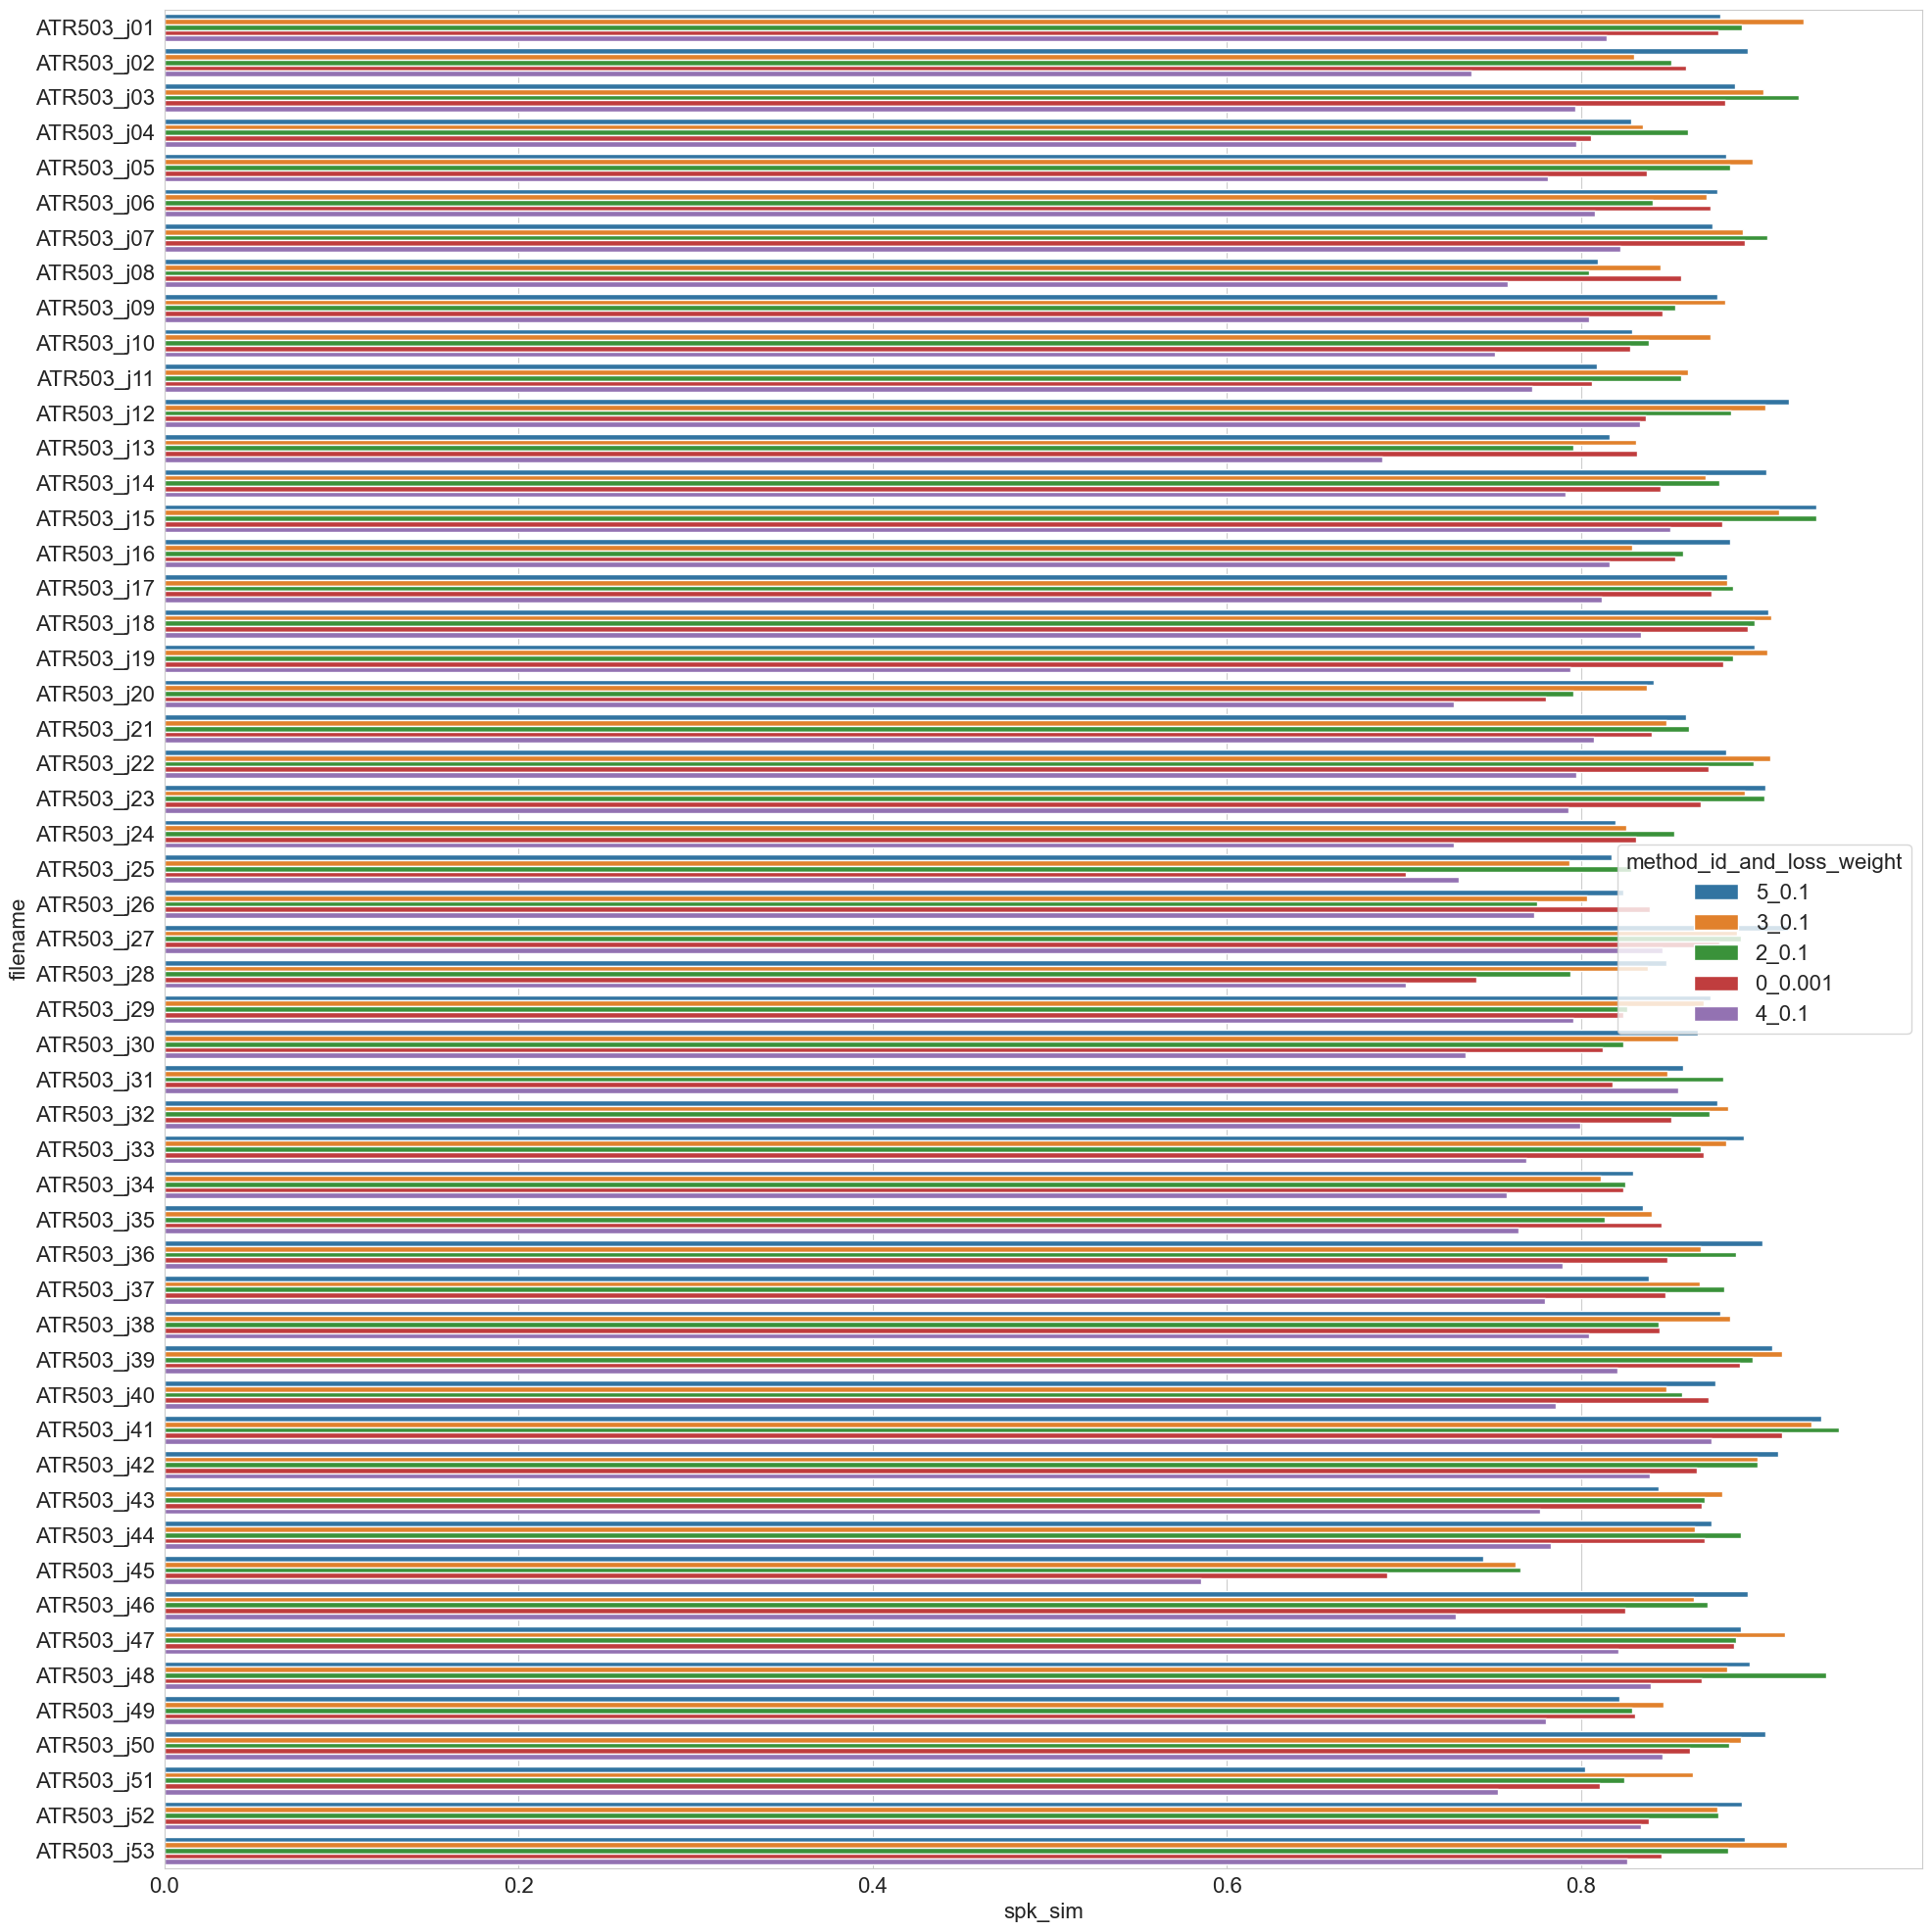

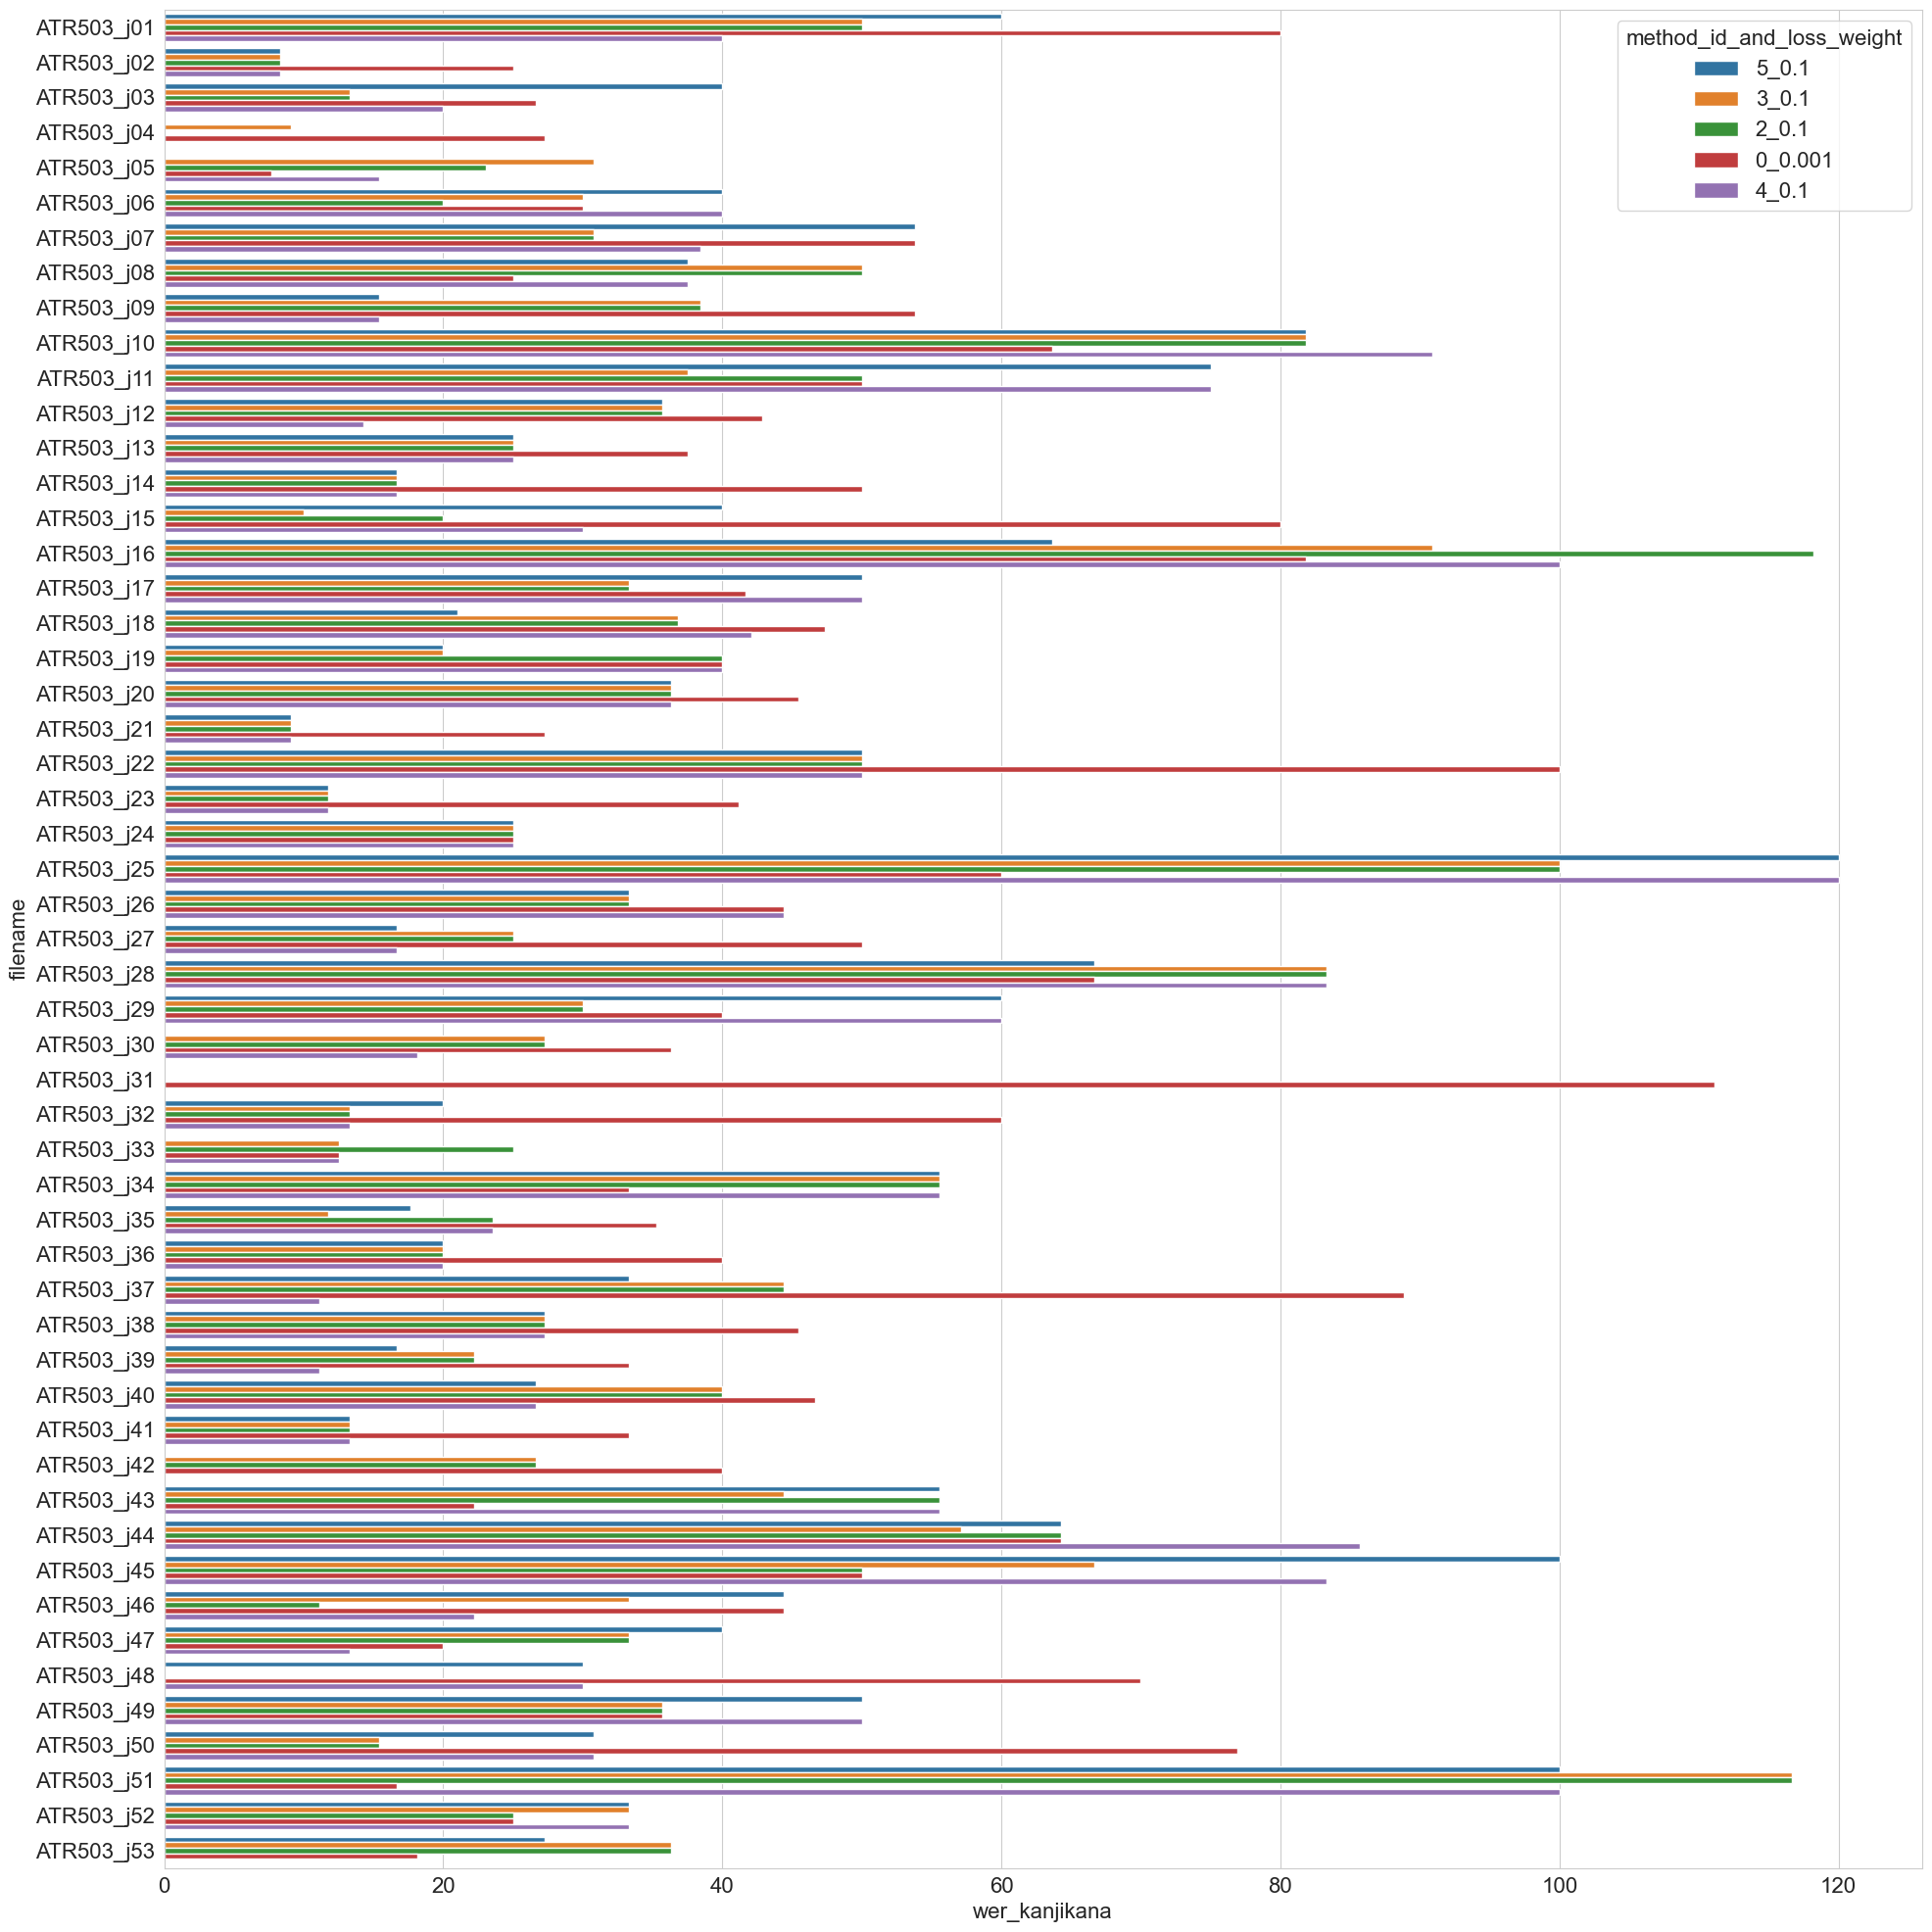

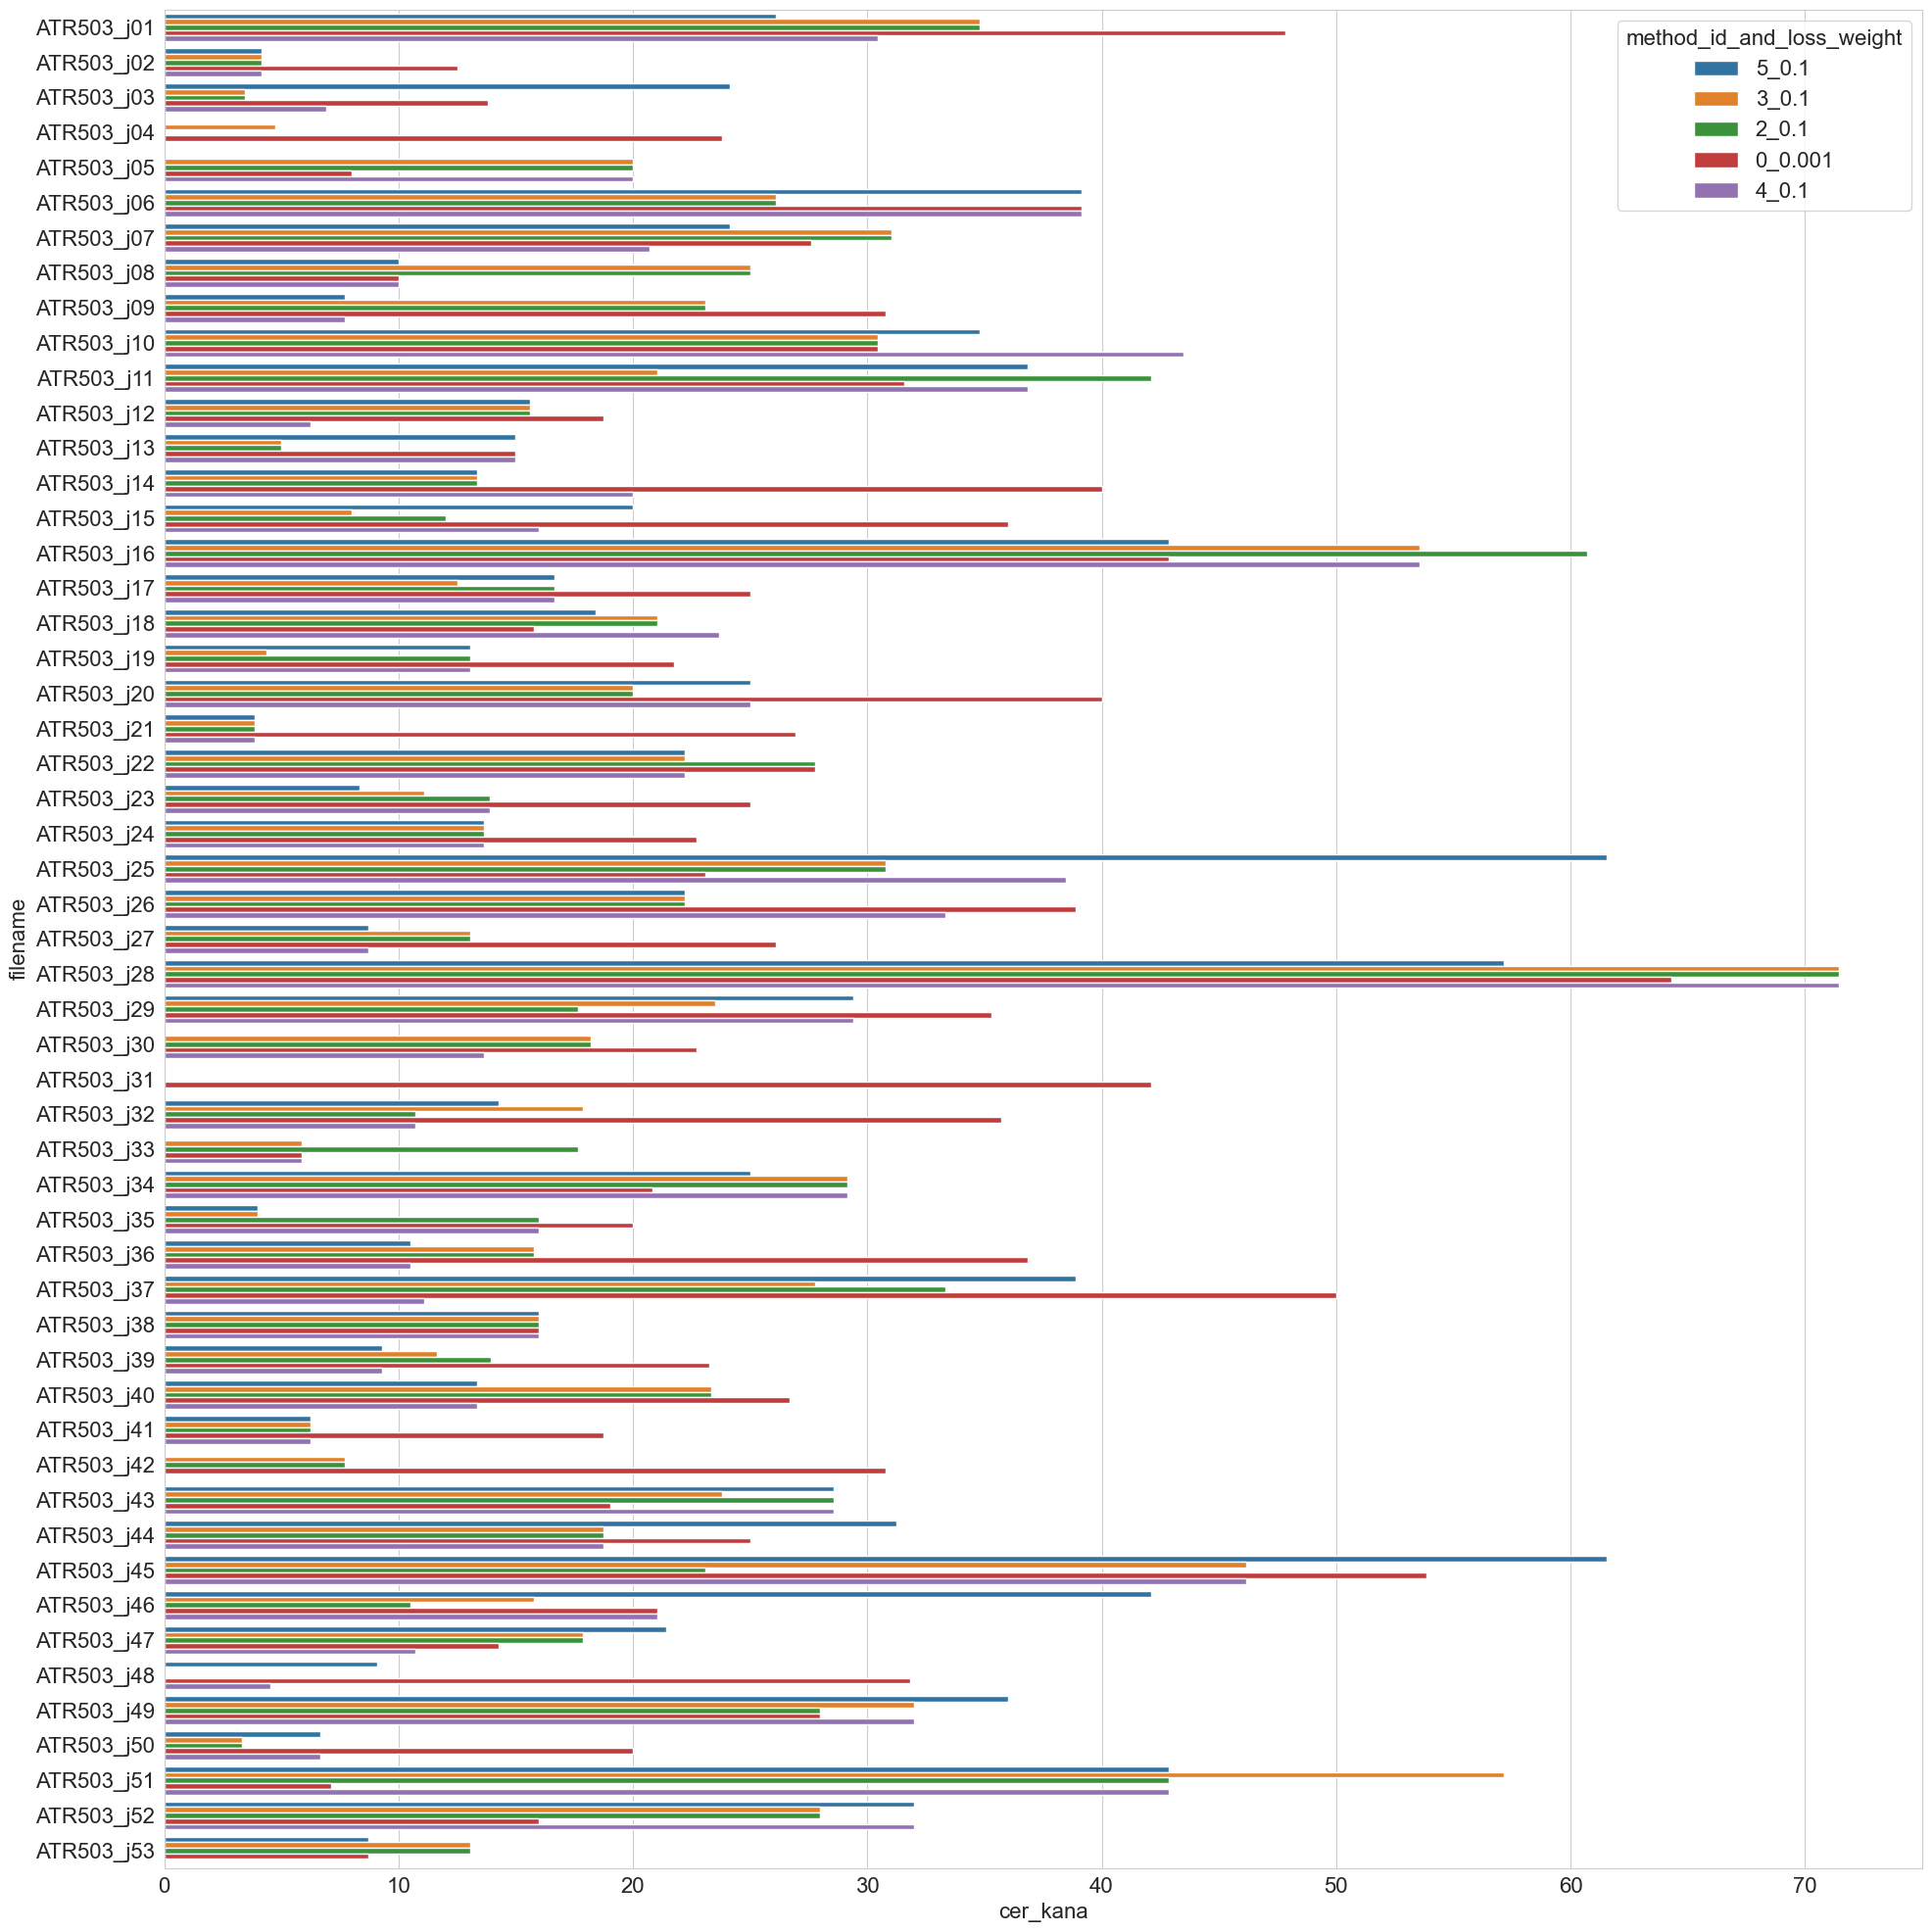

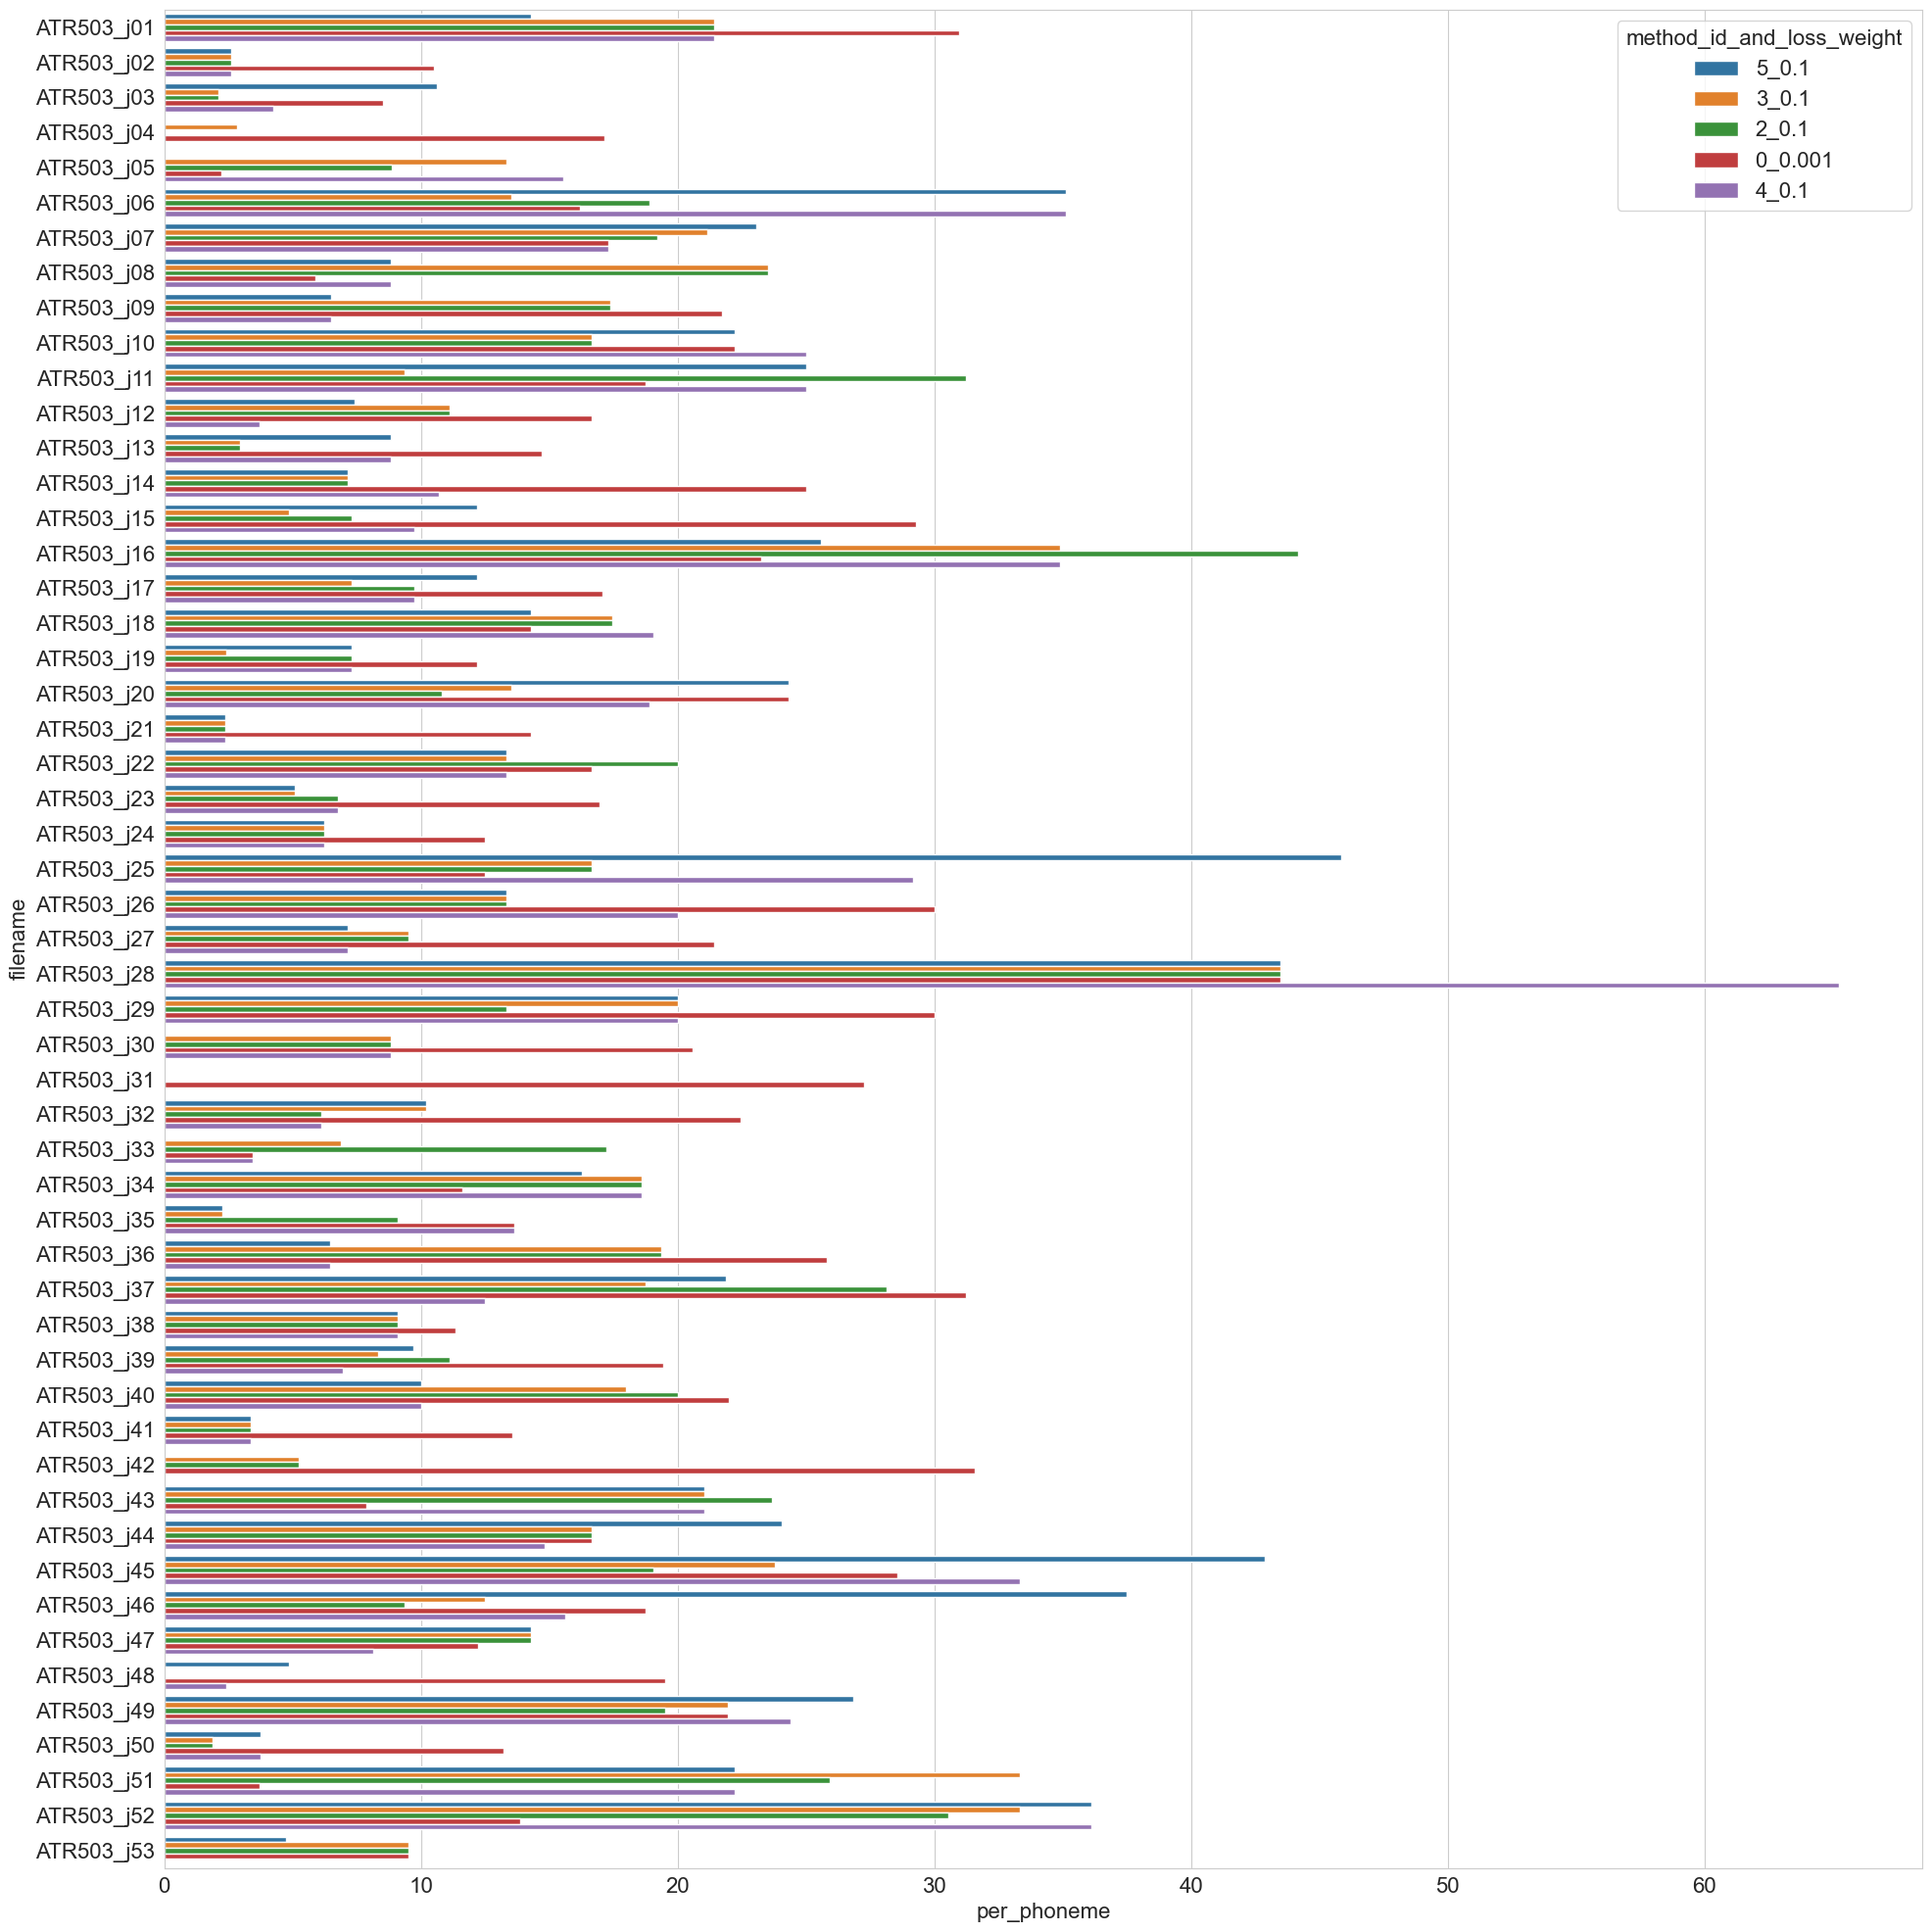

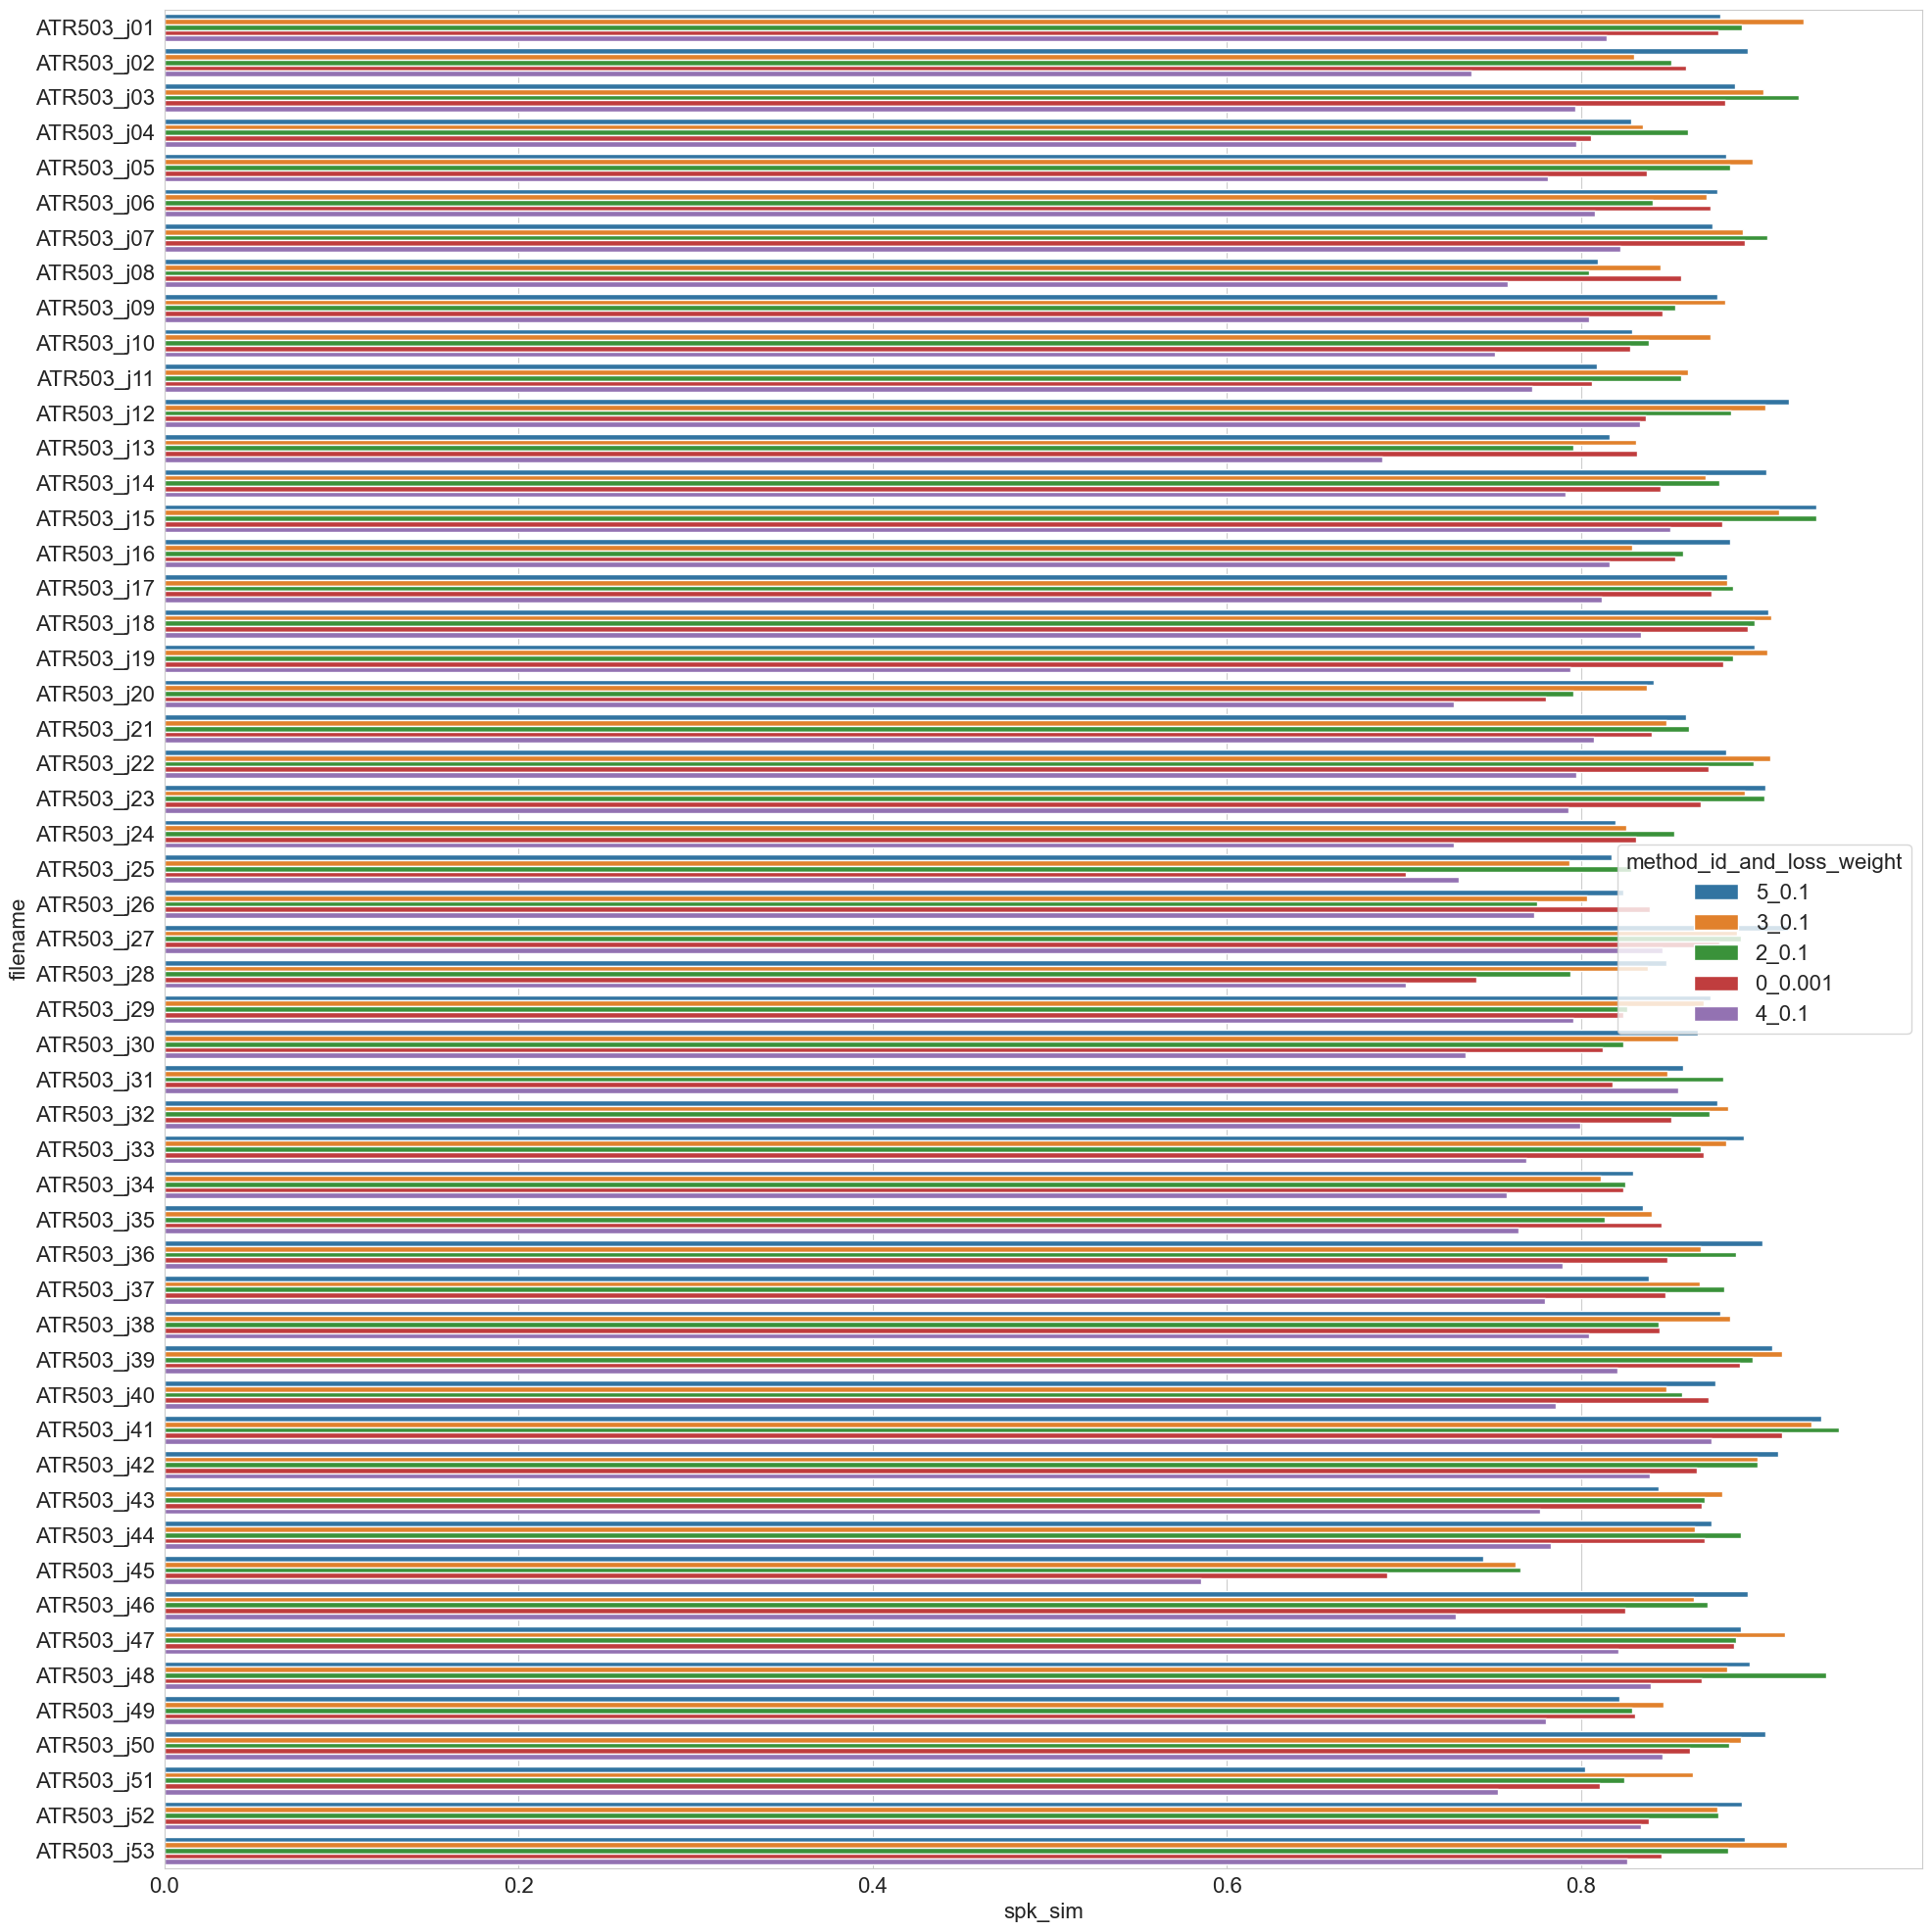

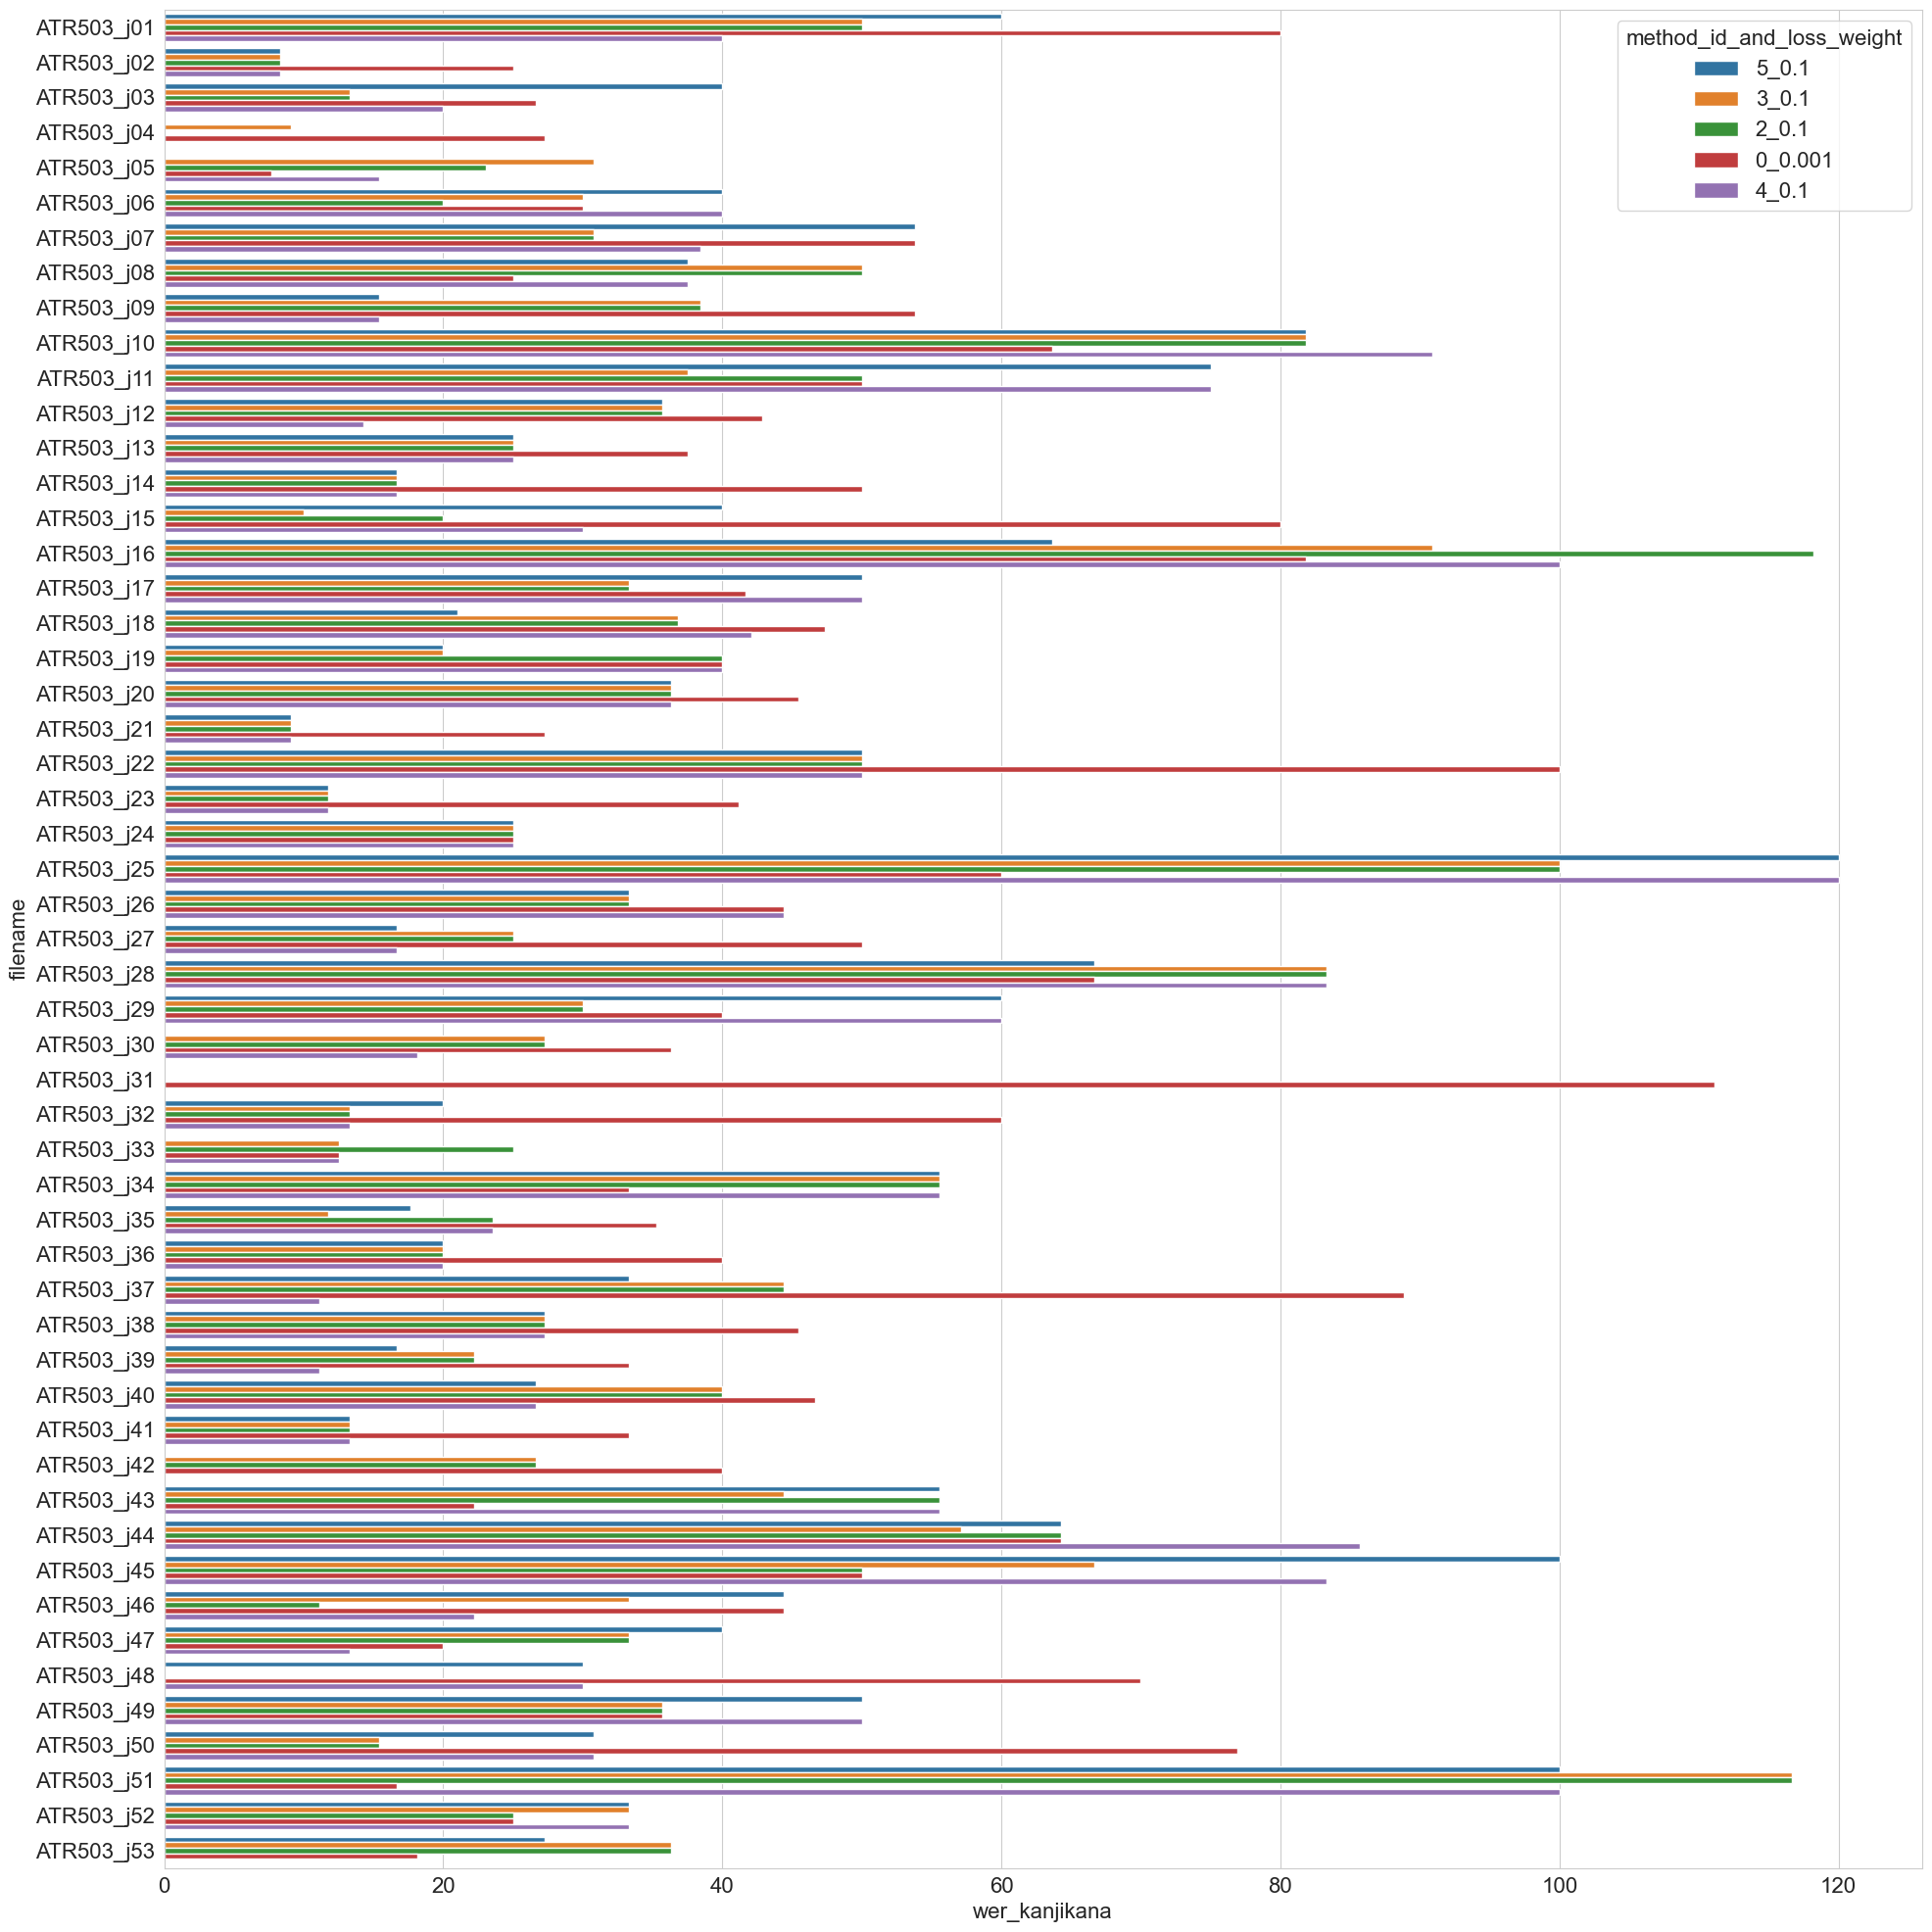

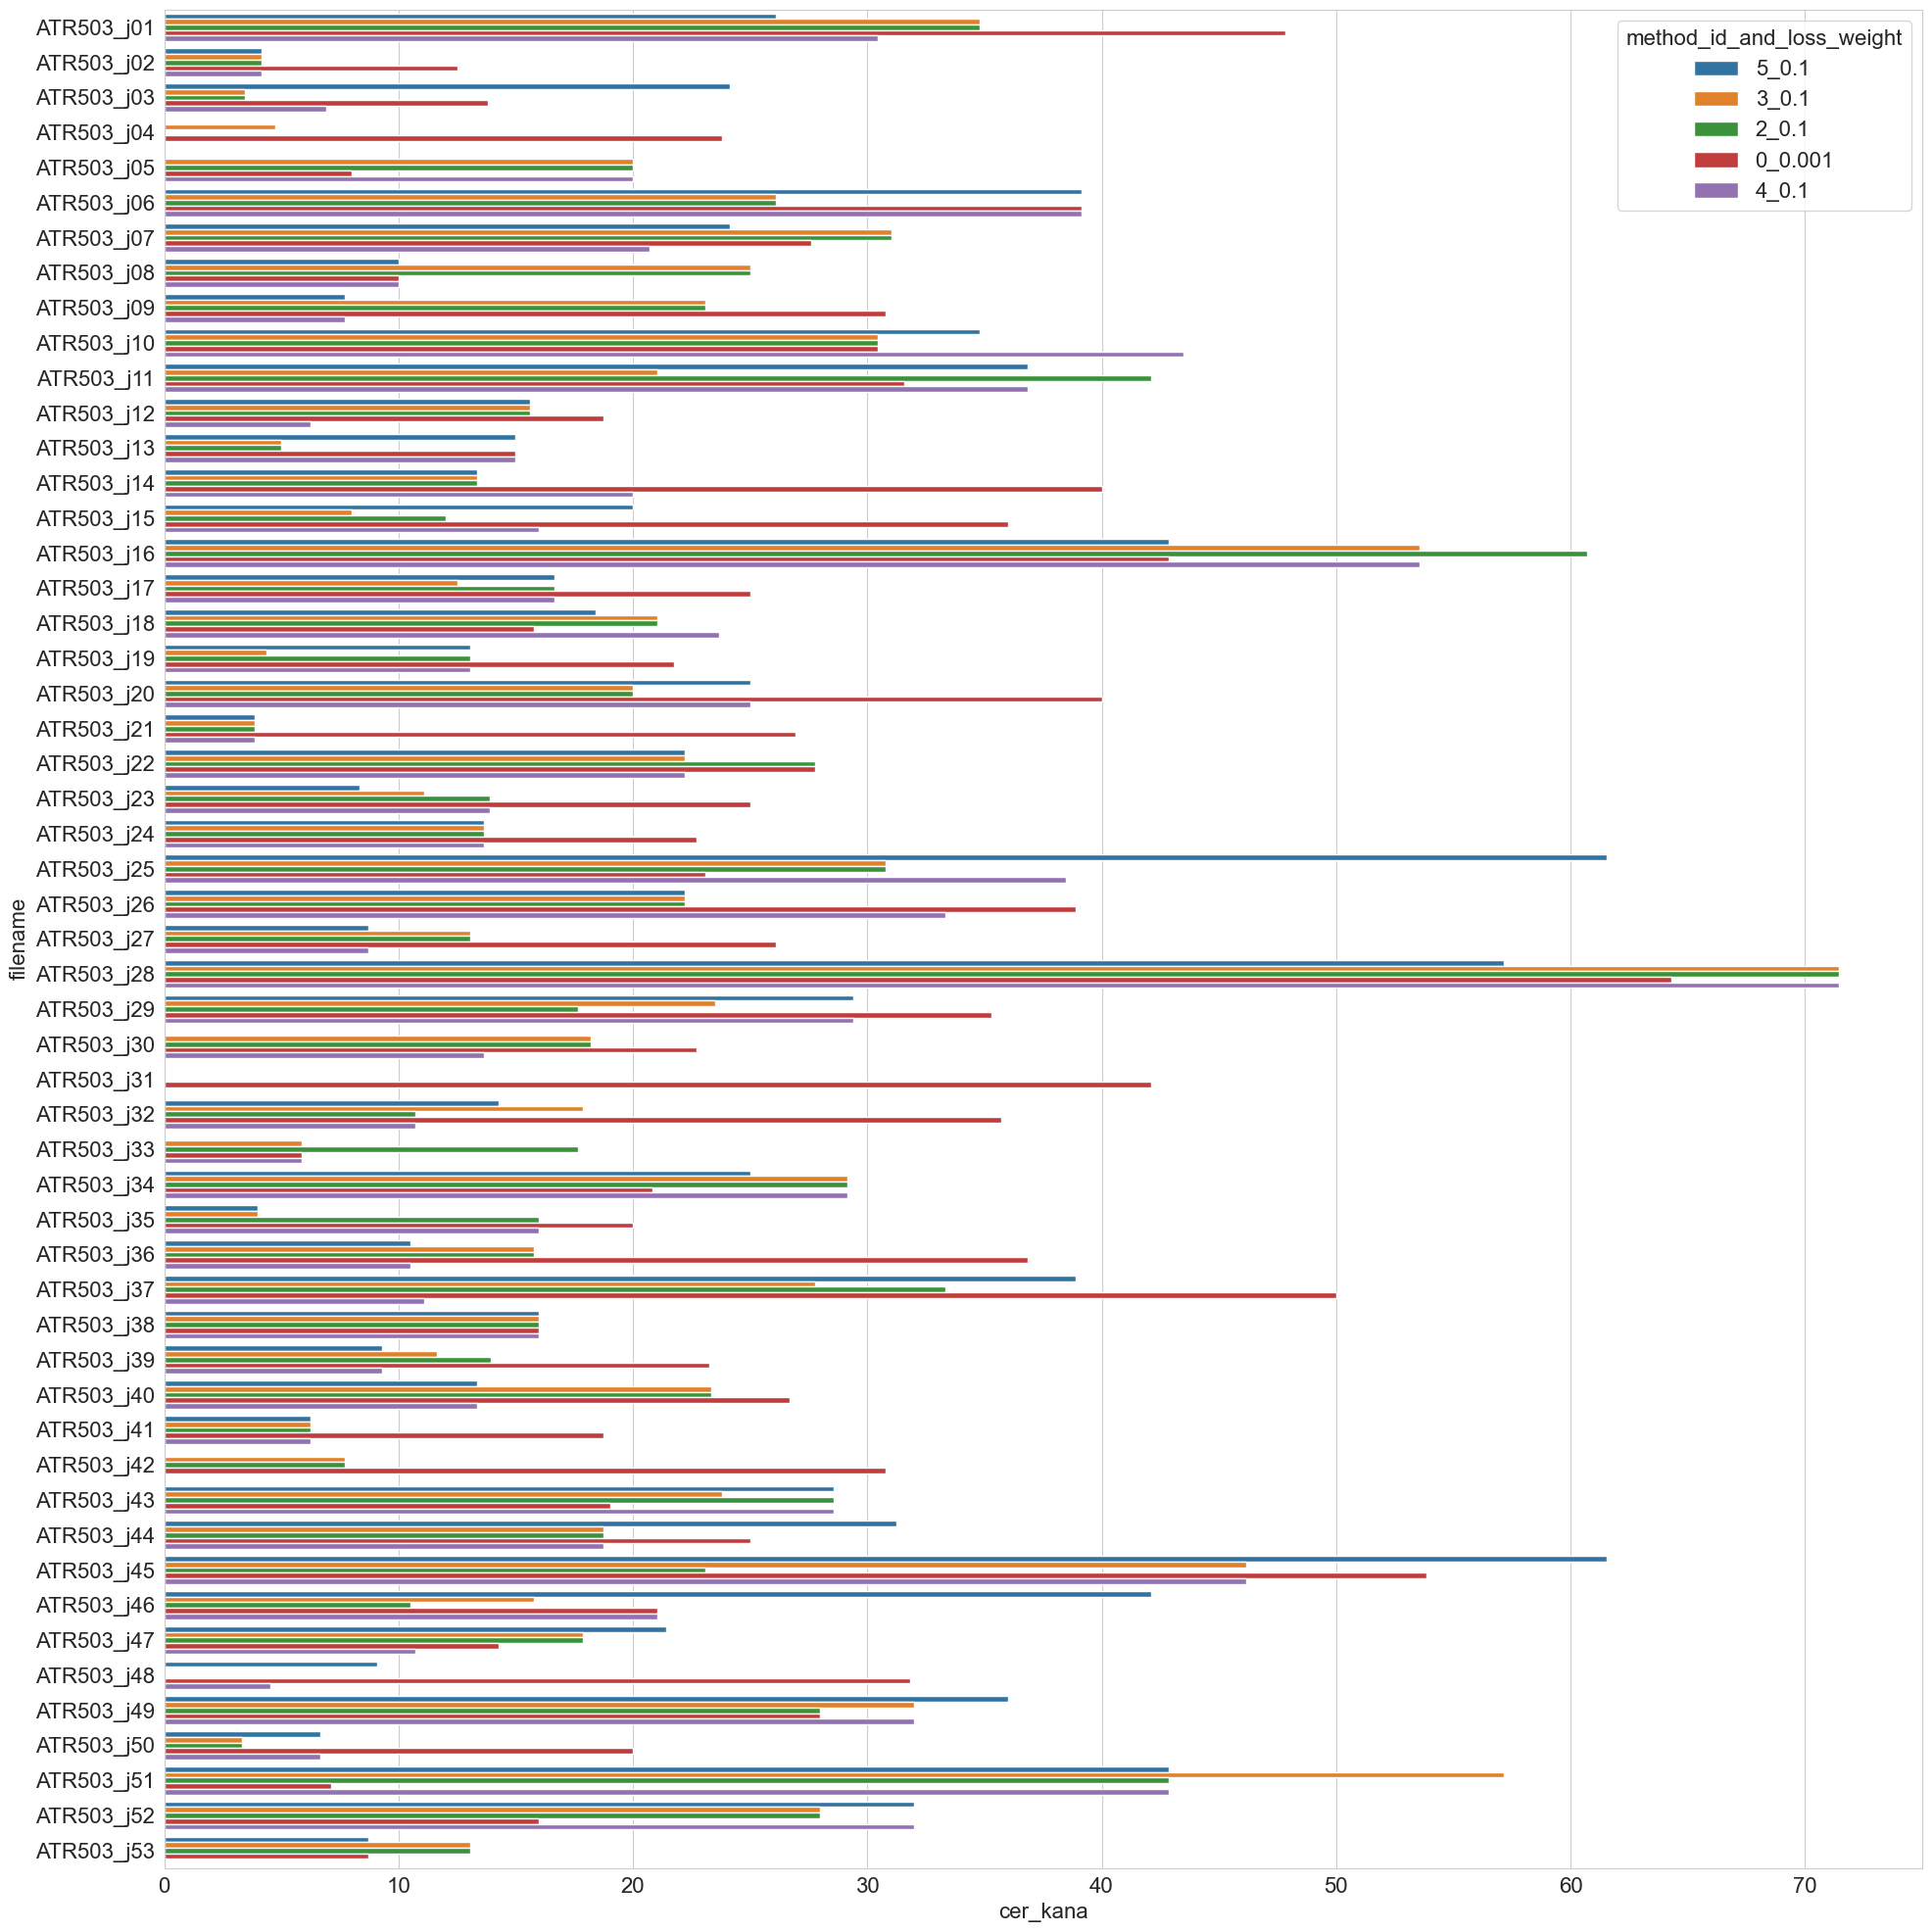

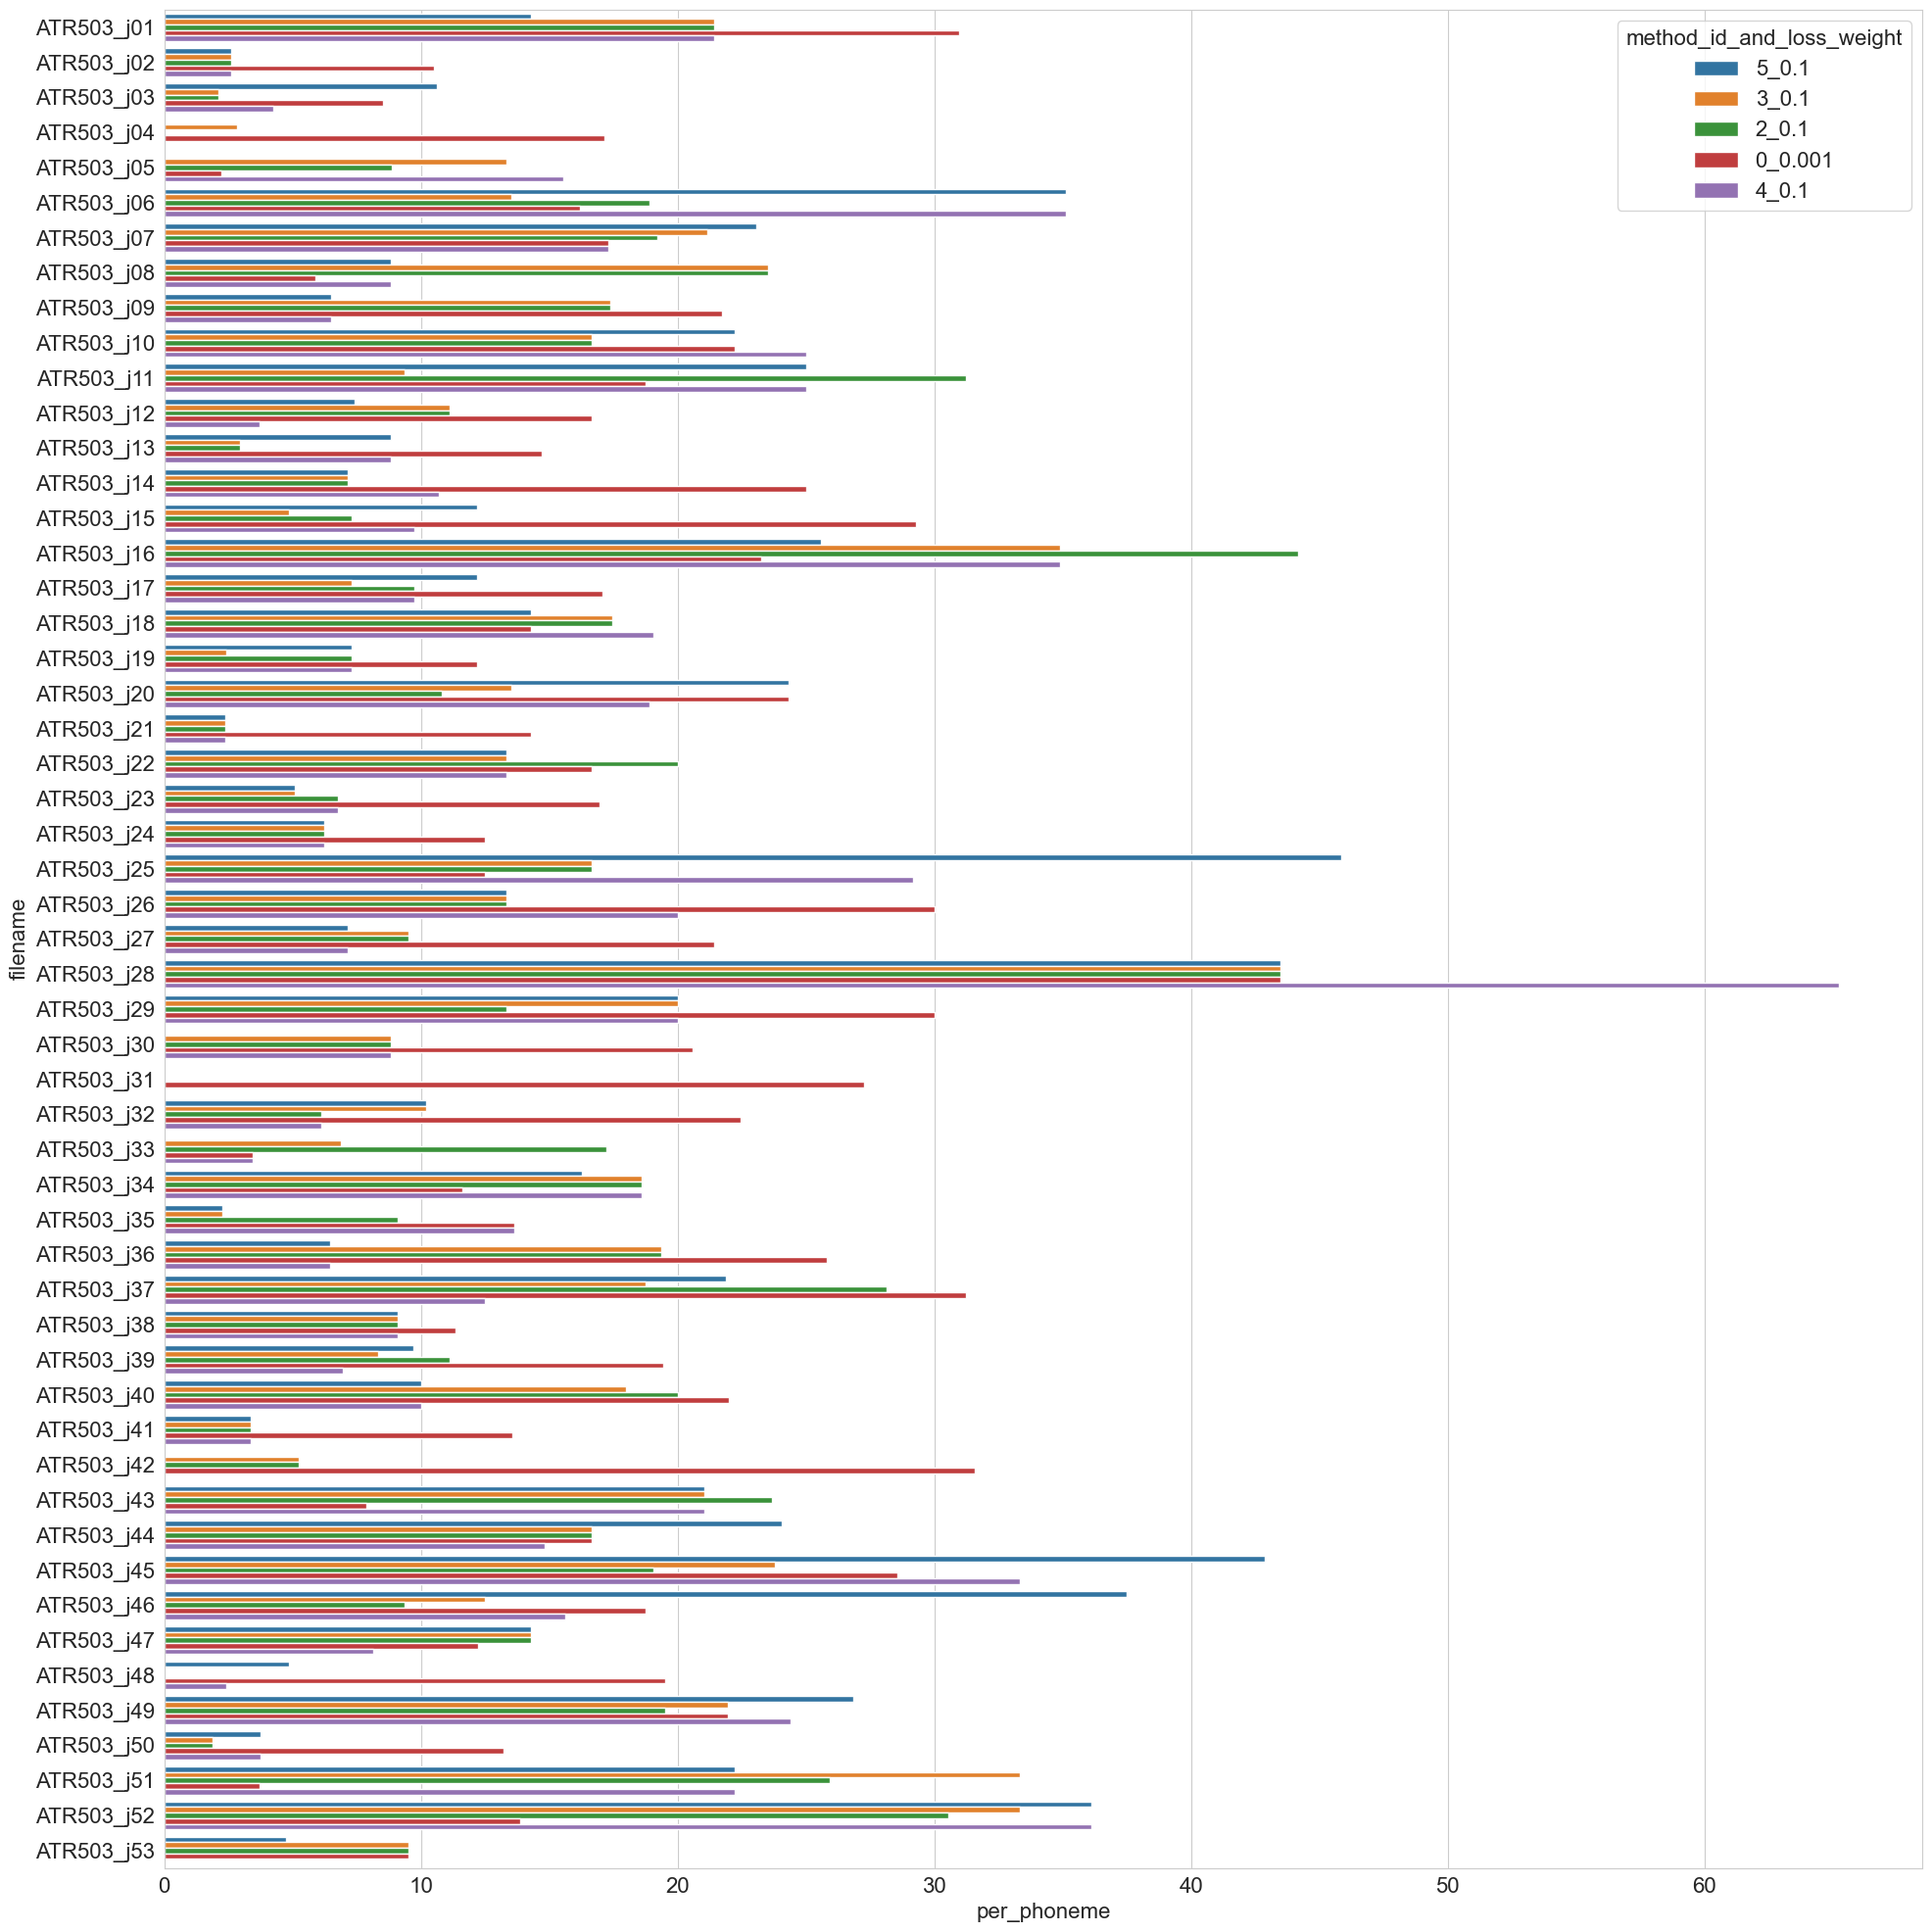

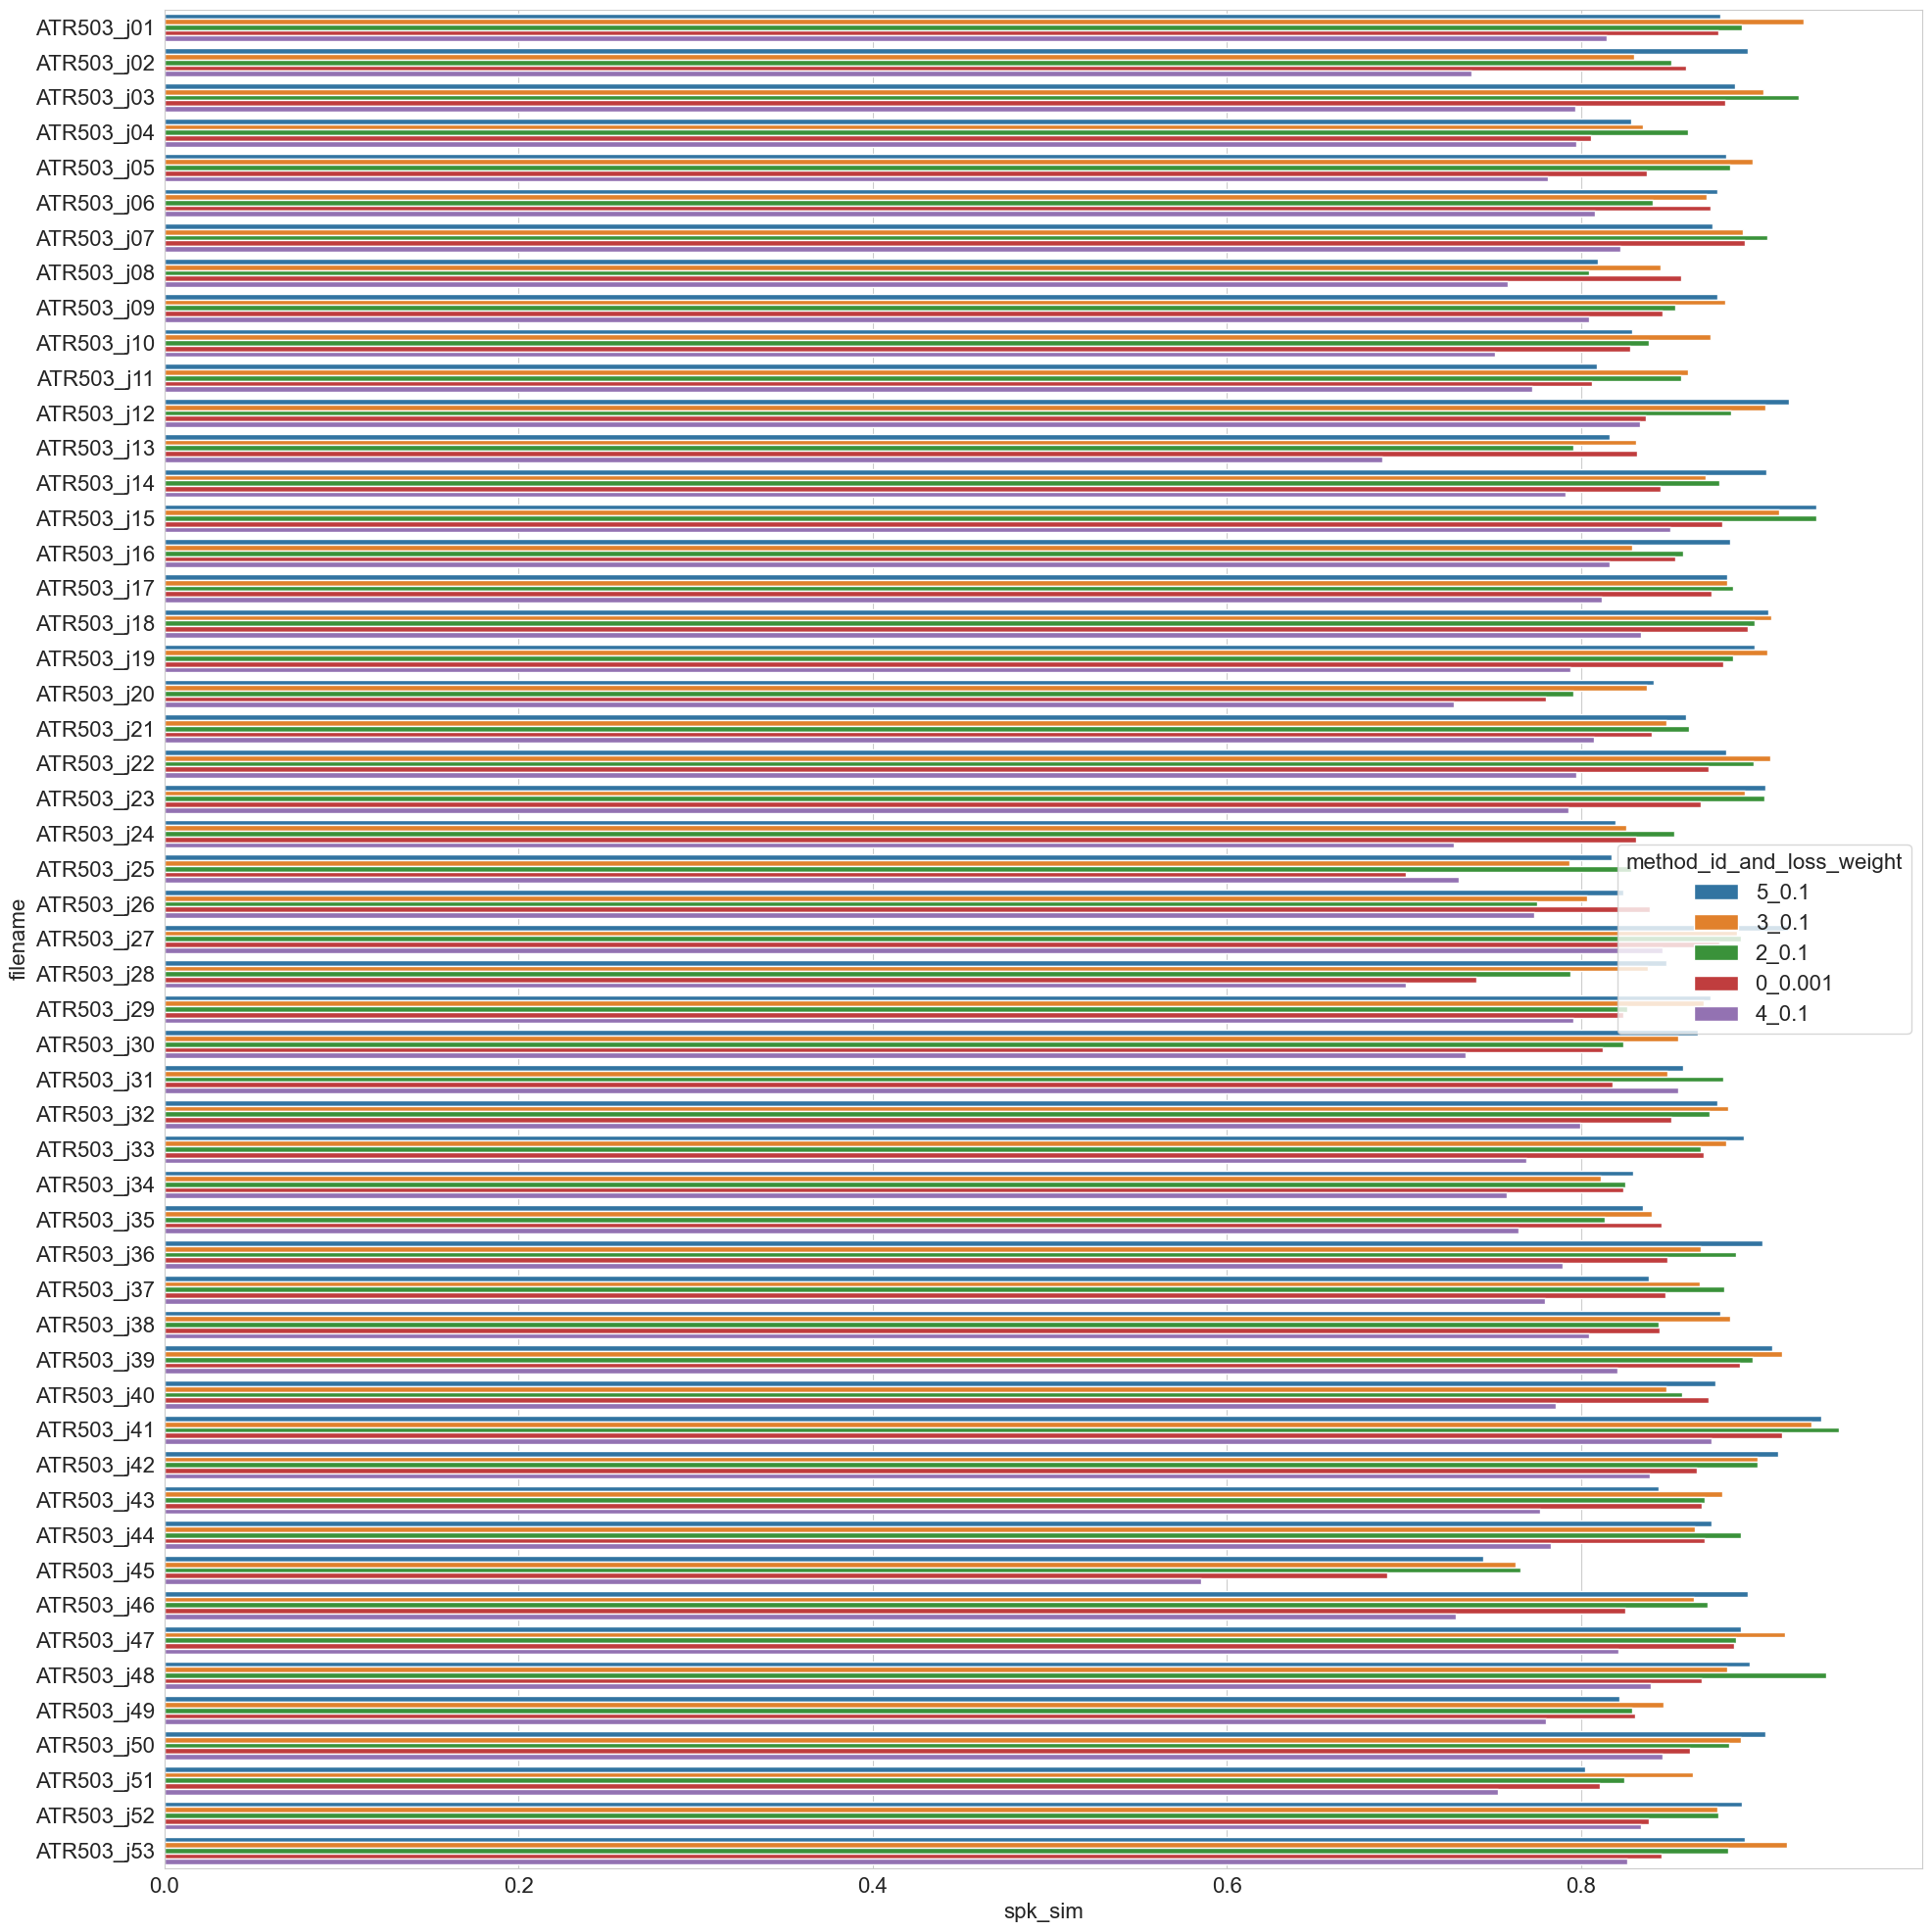

In [98]:
for speaker in list(df_all.select(pl.col("speaker")).unique().to_numpy().reshape(-1)):
    for metric in ["wer_kanjikana", "cer_kana", "per_phoneme", "spk_sim"]:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
        sns.barplot(
            df_all.filter(
                (pl.col("run_id").is_in(best_run_id_lst))
                & (pl.col("kind") == "pred_mel_speech_ssl")
                & (pl.col("speaker") == "F01_kablab")
            ).sort(["filename"]),
            x=metric,
            y="filename",
            hue="method_id_and_loss_weight",
            ax=ax,
        )
        fig.tight_layout()
        save_path = Path(f"./figs/obj_metrics_2/{speaker}/{metric}.png")
        save_path.parent.mkdir(parents=True, exist_ok=True)
        fig.savefig(str(save_path))